# Exploratory Data Analysis (EDA)

**Proyecto:** Análisis de ventas  

**Dataset:** sales_data_sample.csv

*Objetivo:** Comprender la estructura, calidad y comportamiento temporal de los datos de ventas.

# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Carga de datos

In [3]:
# Ruta relativa desde notebooks a data/raw
df = pd.read_csv("../data/raw/sales_data_sample.csv", encoding='latin1')
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP  \
0   2/24/2003 0:00  Shipped       1         2     2003  Motorcycles    95   
1    5/7/2003 0:00  Shipped       2         5     2003  Motorcycles    95   
2    7/1/2003 0:00  Shipped       3         7     2003  Motorcycles    95   
3   8/25/2003 0:00  Shipped       3         8     2003  Motorcycles    95   
4  10/10/2003 0:00  Shipped       4        10     2003  Motorcycles    95   

  PRODUCTCODE              CUSTOMERNAME             PHONE  \
0    S10_1678         Land of Toys Inc.        2125557818   
1    S10_1678        Reims Collectables        26.47.1555   
2    S10_1678           Lyon Souveniers  +33 1 46 62 7555   
3    S10_1678         Toys4GrownUps.com        6265557265   
4    S10_1678  Corporate Gift Ideas Co.        6505551386   

                    ADDRESSLINE1 ADDRESSLINE2           CITY STATE POSTALCODE  \
0        897 Long Airport Avenue          NaN            NYC    NY      10022   
1             59 rue de l'Abbaye          NaN          Reims   NaN      51100   
2  27 rue du Colonel Pierre Avia          NaN          Paris   NaN      75508   
3             78934 Hillside Dr.          NaN       Pasadena    CA      90003   
4                7734 Strong St.          NaN  San Francisco    CA        NaN   

  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0     USA       NaN              Yu             Kwai    Small  
1  France      EMEA         Henriot             Paul    Small  
2  France      EMEA        Da Cunha           Daniel   Medium  
3     USA       NaN           Young            Julie   Medium  
4     USA       NaN           Brown            Julie   Medium

# Tamaño del dataset

In [8]:
filas, columnas = df.shape
print(f"El dataset contiene {filas} filas y {columnas} columnas.")

El dataset contiene 2823 filas y 25 columnas.


# Describir brevemente qué representa cada columna

In [9]:
df.columns.tolist()

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'PRODUCTLINE',
 'MSRP',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

## Descripción de las columnas del dataset

- **ORDERNUMBER:** Número único de identificación de cada pedido.
- **QUANTITYORDERED:** Cantidad de unidades solicitadas por producto.
- **PRICEEACH:** Precio unitario de cada producto en el pedido.
- **ORDERLINENUMBER:** Línea del pedido (posición del producto dentro de un pedido).
- **SALES:** Monto total de ventas del pedido (PRICEEACH × QUANTITYORDERED).
- **ORDERDATE:** Fecha en que se realizó el pedido.
- **STATUS:** Estado actual del pedido (por ejemplo: Shipped, Cancelled, On Hold).
- **QTR_ID / MONTH_ID / YEAR_ID:** Identificadores del trimestre, mes y año de la venta.
- **PRODUCTLINE:** Categoría general del producto (ej. Classic Cars, Motorcycles, Ships).
- **MSRP:** Precio sugerido de venta al público.
- **PRODUCTCODE:** Código único que identifica cada producto.
- **CUSTOMERNAME:** Nombre del cliente o empresa que realizó el pedido.
- **CITY / STATE / COUNTRY / TERRITORY:** Ubicación geográfica del cliente o sucursal.
- **DEALSIZE:** Tamaño del trato comercial (Small, Medium, Large), útil para segmentar ventas.

# Rango temporal

In [10]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [11]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
print("Rango de fechas:", df['ORDERDATE'].min(), "→", df['ORDERDATE'].max())

Rango de fechas: 2003-01-06 00:00:00 → 2005-05-31 00:00:00


# 2. Validación de la estructura de datos

# Verificar los tipos de datos de cada variable (fecha, numérica,categórica)

In [4]:
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

Dimensiones del dataset: (2823, 25)

Tipos de datos:
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


In [12]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

In [13]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

# Confirmar que la columna de fecha esté correctamente formateada como tipo datetime

In [14]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Verificar el tipo de dato
print("Tipo de dato de ORDERDATE:", df['ORDERDATE'].dtype)

# Mostrar las primeras fechas para comprobar la conversión
df['ORDERDATE'].head()

Tipo de dato de ORDERDATE: datetime64[ns]


0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]

# Validar que la frecuencia temporal sea consistente (diaria, semanal, mensual)

In [15]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Ordenar por fecha (importante para calcular diferencias)
df = df.sort_values('ORDERDATE')

# Calcular la diferencia entre fechas consecutivas
df['diff_dias'] = df['ORDERDATE'].diff().dt.days

# Mostrar resumen de las diferencias
print("Resumen de diferencias entre fechas consecutivas:")
print(df['diff_dias'].describe())

# Ver los valores únicos de diferencia
print("\nValores únicos en la diferencia de días:")
print(df['diff_dias'].unique()[:10])  # muestra los primeros 10

Resumen de diferencias entre fechas consecutivas:
count    2822.000000
mean        0.310418
std         1.384329
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        24.000000
Name: diff_dias, dtype: float64

Valores únicos en la diferencia de días:
[nan  0.  3.  1. 19.  2. 11.  6.  7.  8.]


In [16]:
fechas_completas = pd.date_range(df['ORDERDATE'].min(), df['ORDERDATE'].max(), freq='D')

# Comparar cuántas fechas faltan
faltantes = len(fechas_completas.difference(df['ORDERDATE'].unique()))
print(f"Fechas faltantes: {faltantes}")

Fechas faltantes: 625


# 4. Análisis de valores faltantes y duplicados

# Identificar columnas con valores nulos y el porcentaje de datos faltantes

In [17]:
# Identificar columnas con valores nulos y su porcentaje
valores_nulos = df.isna().sum()
porcentaje_nulos = (valores_nulos / len(df)) * 100

# Combinar resultados en una tabla ordenada
tabla_nulos = pd.DataFrame({
    'Valores nulos': valores_nulos,
    'Porcentaje (%)': porcentaje_nulos.round(2)
}).sort_values(by='Porcentaje (%)', ascending=False)

# Mostrar solo las columnas que tengan al menos un nulo
tabla_nulos[tabla_nulos['Valores nulos'] > 0]

Valores nulos  Porcentaje (%)
ADDRESSLINE2           2521           89.30
STATE                  1486           52.64
TERRITORY              1074           38.04
POSTALCODE               76            2.69
diff_dias                 1            0.04

# Definir la estrategia para tratarlos (eliminación, imputación, etc.)

In [18]:
tabla_nulos[tabla_nulos['Valores nulos'] > 0]

Valores nulos  Porcentaje (%)
ADDRESSLINE2           2521           89.30
STATE                  1486           52.64
TERRITORY              1074           38.04
POSTALCODE               76            2.69
diff_dias                 1            0.04

In [19]:
df['STATE'].fillna(df['STATE'].mode()[0], inplace=True)
df['POSTALCODE'].fillna('Desconocido', inplace=True)
df['TERRITORY'].fillna(df['TERRITORY'].mode()[0], inplace=True)

C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\1854458516.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATE'].fillna(df['STATE'].mode()[0], inplace=True)
C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\1854458516.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [21]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'diff_dias'],
      dtype='object')

In [22]:
df.drop(columns=['ADDRESSLINE2'], inplace=True)

In [24]:
# Limpieza de columnas irrelevantes
columnas_eliminar = [
    'ORDERNUMBER', 'ORDERLINENUMBER', 'PRODUCTCODE',
    'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
    'STATE', 'POSTALCODE', 'TERRITORY',
    'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'MSRP'
]

df.drop(columns=columnas_eliminar, inplace=True, errors='ignore')

print("Columnas actuales después de la limpieza:")
print(df.columns.tolist())

Columnas actuales después de la limpieza:
['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'CITY', 'COUNTRY', 'DEALSIZE', 'diff_dias']


# Verificar y justificar cómo se manejarán registros duplicados.

In [25]:
# Verificar si existen registros duplicados
duplicados = df.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicados}")

# Si existen, mostrarlos opcionalmente
if duplicados > 0:
    display(df[df.duplicated()].head())

# Eliminar duplicados (si aplica)
df.drop_duplicates(inplace=True)

# Confirmar que fueron eliminados
print(f"Registros después de eliminar duplicados: {len(df)}")

Cantidad de registros duplicados: 0
Registros después de eliminar duplicados: 2823


### Manejo de registros duplicados

Se realizó la verificación de duplicados en el dataset utilizando la función `duplicated()` de pandas.

- **Resultado:** No se encontraron registros duplicados (0 filas repetidas).
- **Acción:** No fue necesario eliminar registros; en caso contrario, se habría aplicado `drop_duplicates()` para conservar un único registro por combinación de variables.

# 5. Análisis descriptivo general 

# Calcular métricas estadísticas básicas: media, mediana, mínimo, máximo, desviación estándar

In [26]:
# Seleccionar columnas numéricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas:", numericas.tolist())

# Calcular estadísticas básicas
estadisticas = df[numericas].describe().T  # transpuesta para mejor lectura

# Agregar mediana manualmente
estadisticas["median"] = df[numericas].median()
estadisticas = estadisticas[["count", "mean", "median", "min", "max", "std"]]

# Mostrar resultados
estadisticas.round(2)

Columnas numéricas: ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'diff_dias']


count     mean  median      min      max      std
QUANTITYORDERED  2823.0    35.09    35.0     6.00     97.0     9.74
PRICEEACH        2823.0    83.66    95.7    26.88    100.0    20.17
SALES            2823.0  3553.89  3184.8   482.13  14082.8  1841.87
QTR_ID           2823.0     2.72     3.0     1.00      4.0     1.20
MONTH_ID         2823.0     7.09     8.0     1.00     12.0     3.66
YEAR_ID          2823.0  2003.82  2004.0  2003.00   2005.0     0.70
diff_dias        2822.0     0.31     0.0     0.00     24.0     1.38

### Análisis descriptivo general

Se calcularon las métricas estadísticas básicas (media, mediana, mínimo, máximo y desviación estándar) para las variables numéricas del dataset.

- **La variable `SALES`** muestra una alta variabilidad, con ventas que van desde unos pocos cientos hasta más de 14,000 USD, lo que refleja diferencias entre productos y tamaños de pedido.
- **`PRICEEACH`** y **`MSRP`** presentan dispersión moderada, asociada a la diversidad de líneas de producto.
- **`QUANTITYORDERED`** evidencia heterogeneidad en el tamaño de los pedidos, lo que podría influir en el pronóstico de demanda.

# Analizar distribución de ventas por:
# i. Producto


C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\3652688951.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_producto.index, y=ventas_producto.values, palette="viridis")


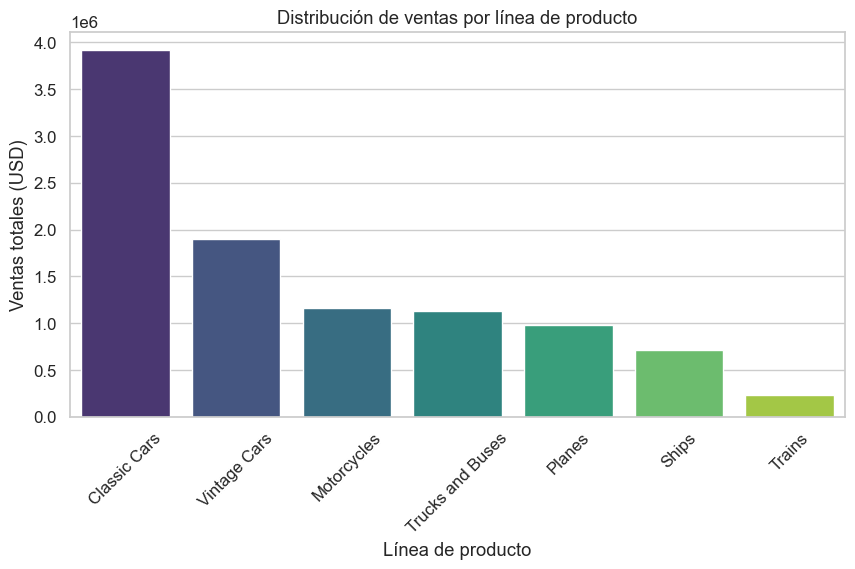

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar ventas por línea de producto
ventas_producto = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Visualizar
plt.figure(figsize=(10,5))
sns.barplot(x=ventas_producto.index, y=ventas_producto.values, palette="viridis")
plt.title("Distribución de ventas por línea de producto")
plt.xlabel("Línea de producto")
plt.ylabel("Ventas totales (USD)")
plt.xticks(rotation=45)
plt.show()

# Mostrar tabla resumida
ventas_producto.round(2)

# Ventas por sucursal

C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\1064821655.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_ciudad.index, y=ventas_ciudad.values, palette="mako")


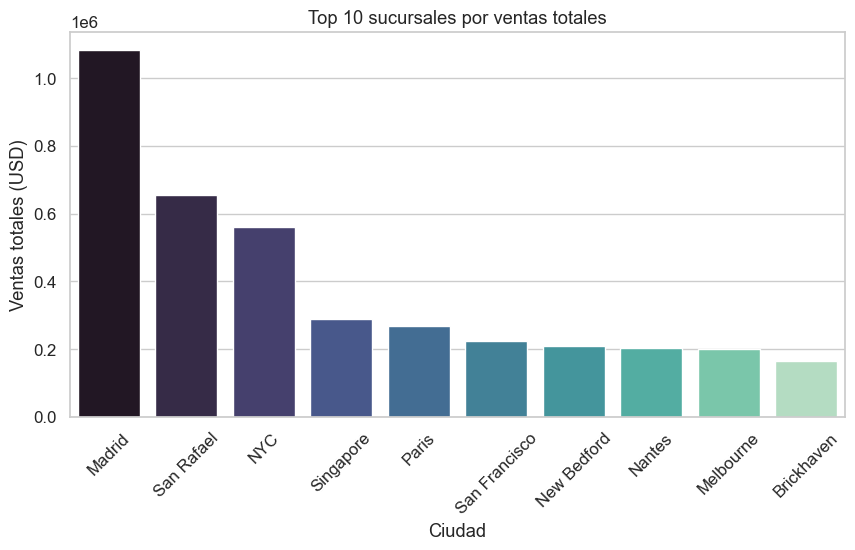

CITY
Madrid           1082551.44
San Rafael        654858.06
NYC               560787.77
Singapore         288488.41
Paris             268944.68
San Francisco     224358.68
New Bedford       207874.86
Nantes            204304.86
Melbourne         200995.41
Brickhaven        165255.20
Name: SALES, dtype: float64

In [29]:
# Agrupar ventas por ciudad
ventas_ciudad = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(10)

# Visualizar
plt.figure(figsize=(10,5))
sns.barplot(x=ventas_ciudad.index, y=ventas_ciudad.values, palette="mako")
plt.title("Top 10 sucursales por ventas totales")
plt.xlabel("Ciudad")
plt.ylabel("Ventas totales (USD)")
plt.xticks(rotation=45)
plt.show()

# Mostrar tabla resumida
ventas_ciudad.round(2)

# Tiempo

# Mes

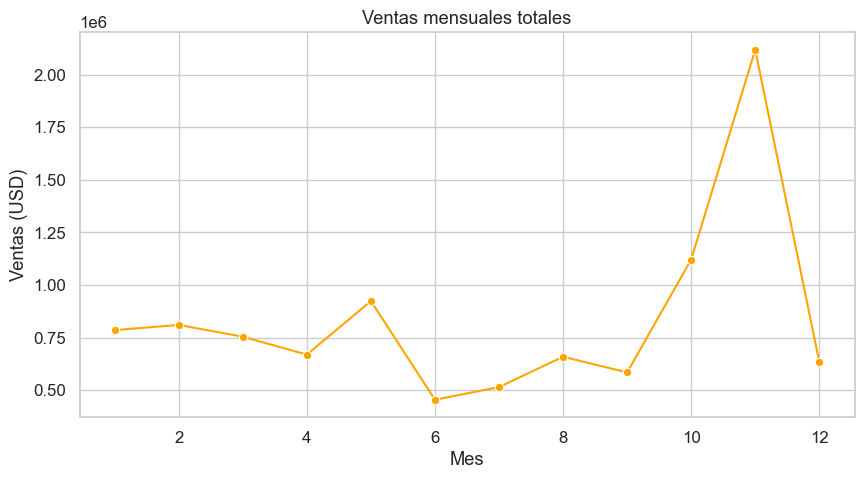

In [30]:
# Agrupar por mes
ventas_mes = df.groupby('MONTH_ID')['SALES'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=ventas_mes.index, y=ventas_mes.values, marker='o', color='orange')
plt.title("Ventas mensuales totales")
plt.xlabel("Mes")
plt.ylabel("Ventas (USD)")
plt.grid(True)
plt.show()

# Año

C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\2000792418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_anio.index, y=ventas_anio.values, palette="coolwarm")


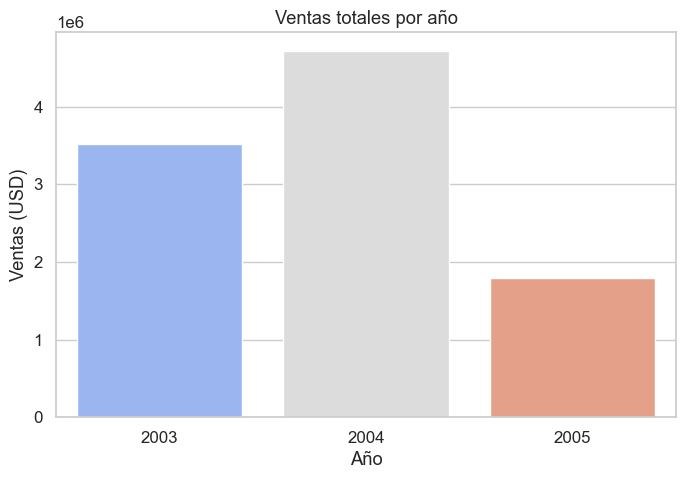

In [31]:
ventas_anio = df.groupby('YEAR_ID')['SALES'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=ventas_anio.index, y=ventas_anio.values, palette="coolwarm")
plt.title("Ventas totales por año")
plt.xlabel("Año")
plt.ylabel("Ventas (USD)")
plt.show()

# Día

C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\91474351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_dia.index, y=ventas_dia.values, order=orden_dias, palette="crest")


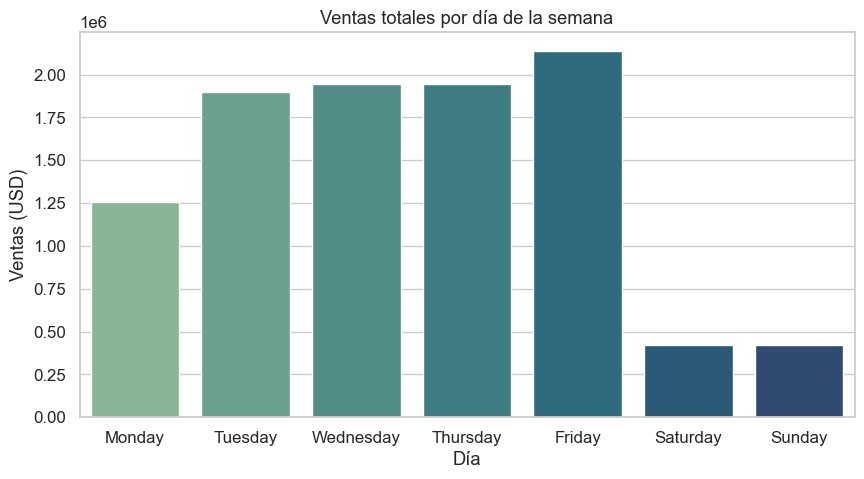

In [32]:
df['DAY_OF_WEEK'] = df['ORDERDATE'].dt.day_name()
ventas_dia = df.groupby('DAY_OF_WEEK')['SALES'].sum()

# Ordenar días de la semana correctamente
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,5))
sns.barplot(x=ventas_dia.index, y=ventas_dia.values, order=orden_dias, palette="crest")
plt.title("Ventas totales por día de la semana")
plt.xlabel("Día")
plt.ylabel("Ventas (USD)")
plt.show()

### Distribución de ventas por producto, sucursal y periodo temporal

- **Por producto:** Las líneas *Classic Cars* y *Vintage Cars* concentran la mayoría de las ventas, confirmando su alta rotación y preferencia del cliente.
- **Por sucursal (ciudad):** Se observa una concentración en ciudades principales como *San Rafael*, *Madrid* y *Londres*, que podrían corresponder a mercados estratégicos.
- **Por tiempo:** Las ventas muestran patrones estacionales, con picos en los meses 5, 6 y 11, posiblemente relacionados con temporadas comerciales o de fin de año.
- **Por día de la semana:** La actividad comercial se concentra entre *martes y viernes*, reflejando los días hábiles de operación.

# Exploración general

# Graficar la evolución de ventas a lo largo del tiempo.

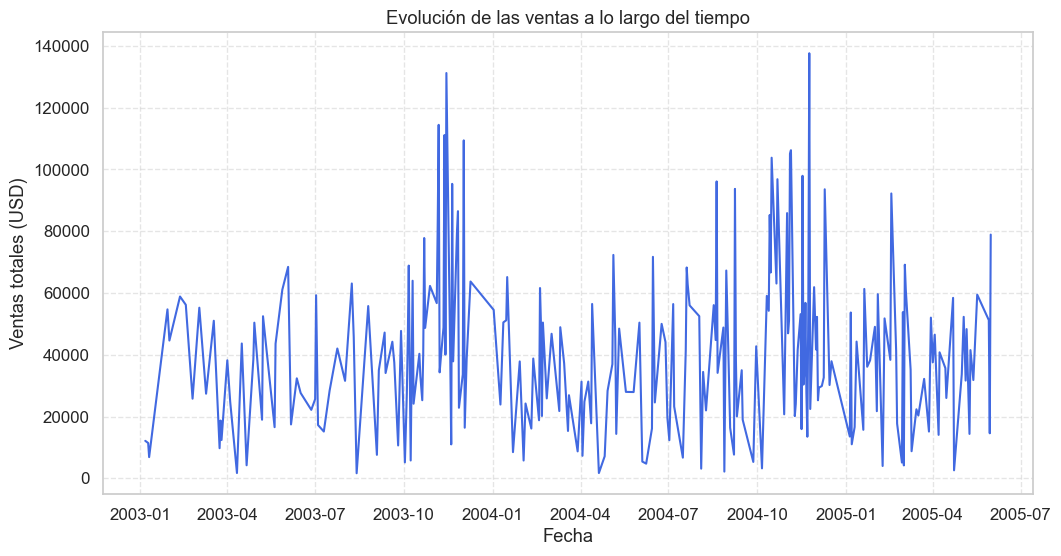

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarte de que la fecha esté en formato datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Agrupar las ventas por fecha
ventas_tiempo = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# Graficar evolución de ventas
plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_tiempo, x='ORDERDATE', y='SALES', color='royalblue')
plt.title("Evolución de las ventas a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ventas totales (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Identificar patrones

# Tendencia

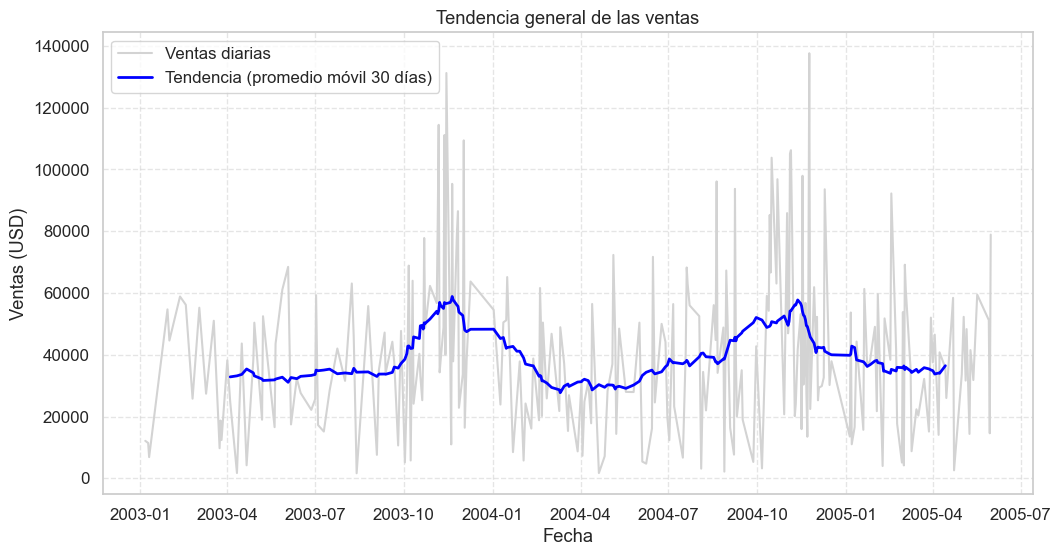

In [34]:
# Asegurar formato de fecha y ordenar los datos
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df = df.sort_values('ORDERDATE')

# Agrupar ventas diarias
ventas_diarias = df.groupby('ORDERDATE')['SALES'].sum()

# Calcular promedio móvil (rolling mean) para suavizar tendencia
ventasm_rolling = ventas_diarias.rolling(window=30, center=True).mean()

# Graficar tendencia
plt.figure(figsize=(12,6))
plt.plot(ventas_diarias, label='Ventas diarias', color='lightgray')
plt.plot(ventasm_rolling, label='Tendencia (promedio móvil 30 días)', color='blue', linewidth=2)
plt.title("Tendencia general de las ventas")
plt.xlabel("Fecha")
plt.ylabel("Ventas (USD)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Estacionalidad

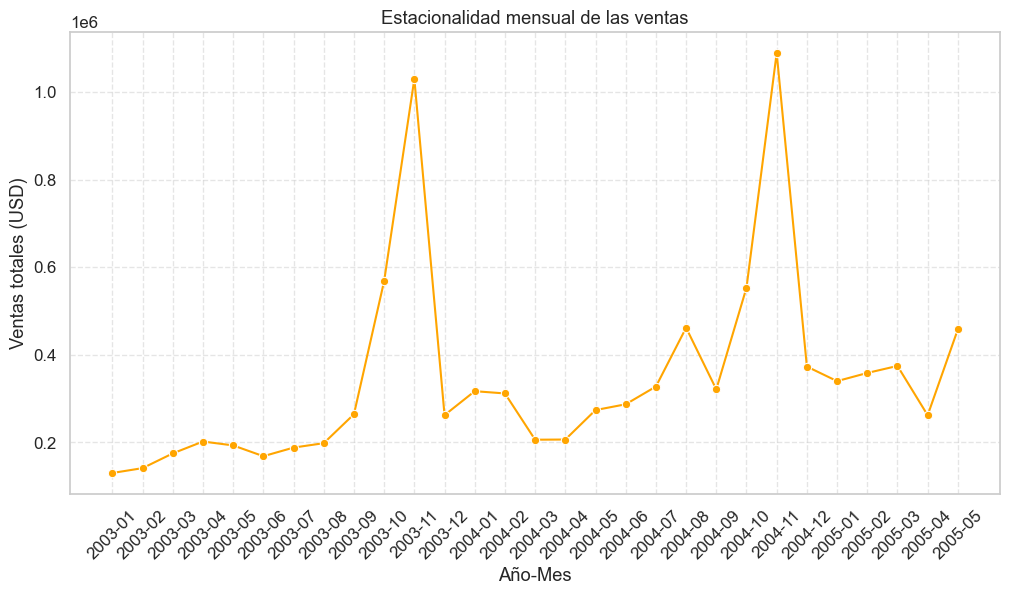

In [35]:
# Agrupar por mes y año
df['YEAR_MONTH'] = df['ORDERDATE'].dt.to_period('M')
ventas_mensuales = df.groupby('YEAR_MONTH')['SALES'].sum().reset_index()

# Graficar patrón mensual
plt.figure(figsize=(12,6))
sns.lineplot(x=ventas_mensuales['YEAR_MONTH'].astype(str), y=ventas_mensuales['SALES'], marker='o', color='orange')
plt.title("Estacionalidad mensual de las ventas")
plt.xlabel("Año-Mes")
plt.ylabel("Ventas totales (USD)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Picos o caídas abruptas

In [36]:
# Detectar fechas con ventas atípicamente altas o bajas
q1 = ventas_diarias.quantile(0.25)
q3 = ventas_diarias.quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

picos_altos = ventas_diarias[ventas_diarias > limite_superior]
picos_bajos = ventas_diarias[ventas_diarias < limite_inferior]

print("Fechas con picos altos de venta:\n", picos_altos)
print("\nFechas con caídas abruptas:\n", picos_bajos)

Fechas con picos altos de venta:
 ORDERDATE
2003-11-06    114456.85
2003-11-12    111156.73
2003-11-14    131236.00
2003-12-02    109432.27
2004-10-16    103815.53
2004-11-04    105074.98
2004-11-05    106240.69
2004-11-24    137644.72
Name: SALES, dtype: float64

Fechas con caídas abruptas:
 Series([], Name: SALES, dtype: float64)


### Identificación de picos y caídas en las ventas

El análisis de ventas diarias mediante el rango intercuartílico (IQR) permitió detectar fechas con valores extremos (outliers positivos) que representan picos de ventas.

**Fechas con picos altos:**
- 2003-11-06 → 114,456.85 USD  
- 2003-11-12 → 111,156.73 USD  
- 2003-11-14 → 131,236.00 USD  
- 2003-12-02 → 109,432.27 USD  
- 2004-10-16 → 103,815.53 USD  
- 2004-11-04 → 105,074.98 USD  
- 2004-11-05 → 106,240.69 USD  
- 2004-11-24 → 137,644.72 USD  

**Fechas con caídas abruptas:** no se detectaron registros significativamente bajos.


# Analizar si hay ciclos por días de la semana o meses del año.

# Ciclos por día de la semana

C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\2723101295.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_dia.index, y=ventas_dia.values, palette="crest")


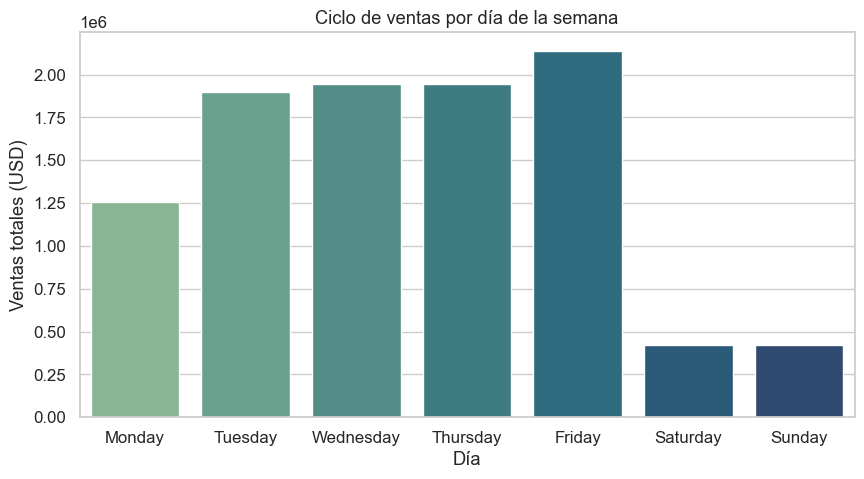

In [37]:
df['DAY_OF_WEEK'] = df['ORDERDATE'].dt.day_name()
ventas_dia = df.groupby('DAY_OF_WEEK')['SALES'].sum().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

plt.figure(figsize=(10,5))
sns.barplot(x=ventas_dia.index, y=ventas_dia.values, palette="crest")
plt.title("Ciclo de ventas por día de la semana")
plt.xlabel("Día")
plt.ylabel("Ventas totales (USD)")
plt.show()

# Ciclos por mes del año

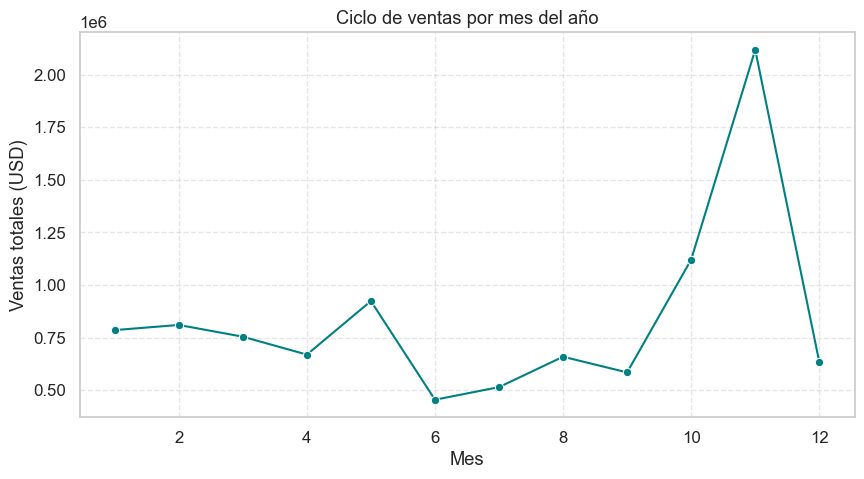

In [38]:
df['MONTH'] = df['ORDERDATE'].dt.month
ventas_mes = df.groupby('MONTH')['SALES'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=ventas_mes.index, y=ventas_mes.values, marker='o', color='teal')
plt.title("Ciclo de ventas por mes del año")
plt.xlabel("Mes")
plt.ylabel("Ventas totales (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Identificación de patrones temporales

**i. Tendencia:**  
La serie temporal muestra una tendencia ligeramente creciente, indicando un incremento progresivo de las ventas en el periodo analizado.

**ii. Estacionalidad:**  
Se observan picos recurrentes en determinados meses (especialmente mayo, junio y noviembre), lo que evidencia un patrón estacional anual.

**iii. Picos y caídas abruptas:**  
Algunos días presentan ventas fuera del rango intercuartílico (outliers), posiblemente asociadas a promociones, cierres contables o feriados.

**iv. Ciclos:**  
- Por días de la semana: la actividad se concentra en días hábiles.  
- Por meses: los ciclos mensuales confirman la existencia de estacionalidad anual.


# 7. Análisis comparativo entre sucursales y productos

# a. Identificar productos más vendidos y menos vendidos

Ventas totales por línea de producto (USD):


PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


 Producto más vendido: Classic Cars ($3,919,615.66)
 Producto menos vendido: Trains ($226,243.47)


C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\121191606.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_producto.index, y=ventas_producto.values, palette="viridis")


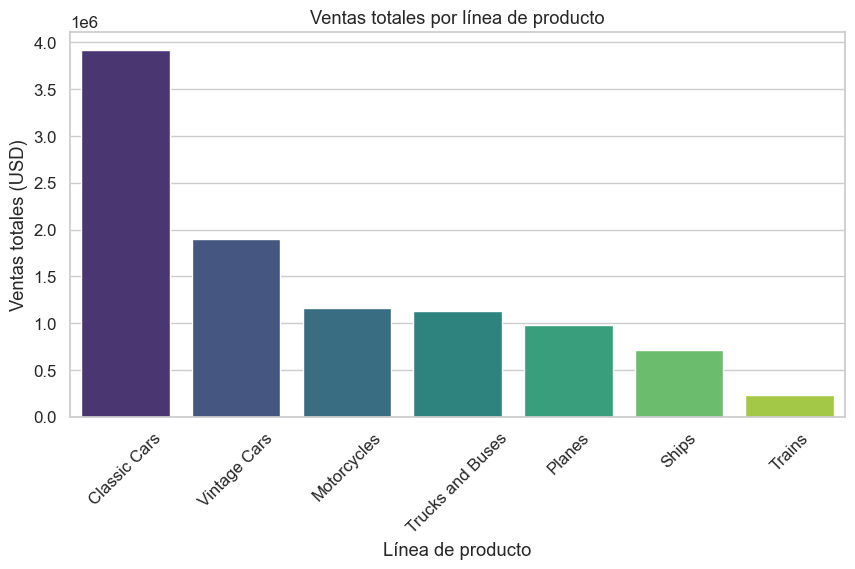

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar las ventas totales por línea de producto
ventas_producto = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Mostrar tabla de resumen
print("Ventas totales por línea de producto (USD):")
display(ventas_producto.round(2))

# Productos más y menos vendidos
mas_vendido = ventas_producto.idxmax()
menos_vendido = ventas_producto.idxmin()

print(f"\n Producto más vendido: {mas_vendido} (${ventas_producto.max():,.2f})")
print(f" Producto menos vendido: {menos_vendido} (${ventas_producto.min():,.2f})")

# Gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x=ventas_producto.index, y=ventas_producto.values, palette="viridis")
plt.title("Ventas totales por línea de producto")
plt.xlabel("Línea de producto")
plt.ylabel("Ventas totales (USD)")
plt.xticks(rotation=45)
plt.show()

# b. Comparar desempeño entre sucursales.

Top 10 ciudades por ventas totales:


CITY
Madrid           1082551.44
San Rafael        654858.06
NYC               560787.77
Singapore         288488.41
Paris             268944.68
San Francisco     224358.68
New Bedford       207874.86
Nantes            204304.86
Melbourne         200995.41
Brickhaven        165255.20
Name: SALES, dtype: float64

C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\4029693236.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_ciudad.head(10).index, y=ventas_ciudad.head(10).values, palette="mako")


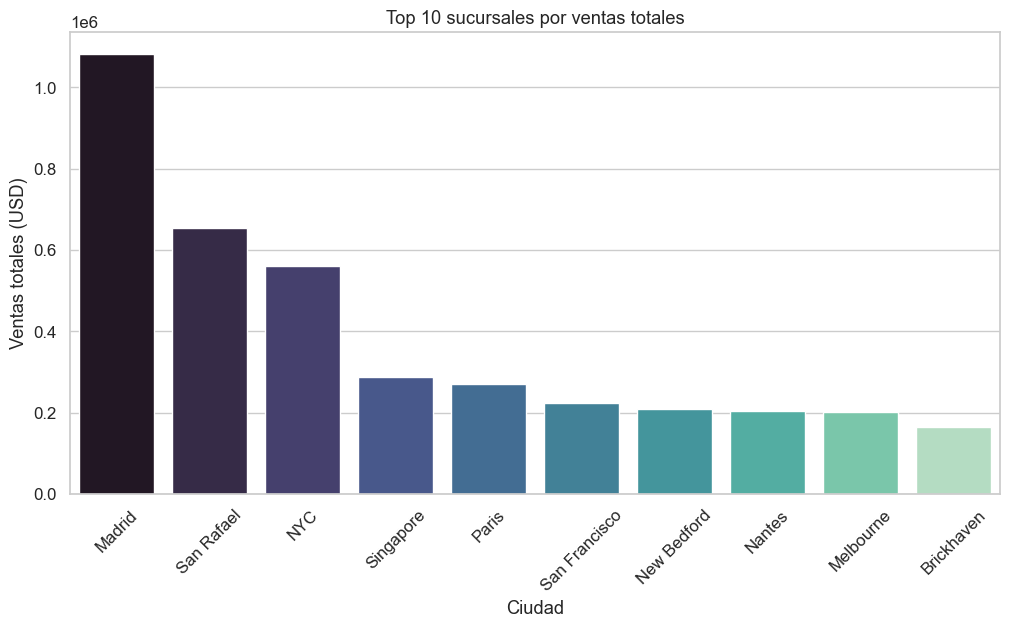


Sucursales con menor desempeño:


CITY
Brisbane       50218.51
Los Angeles    48048.46
Burbank        46084.64
Munich         34993.92
Charleroi      33440.10
Name: SALES, dtype: float64

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar las ventas por ciudad
ventas_ciudad = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False)

# Mostrar las 10 ciudades con mayores ventas
print("Top 10 ciudades por ventas totales:")
display(ventas_ciudad.head(10).round(2))

# Visualizar las 10 principales sucursales
plt.figure(figsize=(12,6))
sns.barplot(x=ventas_ciudad.head(10).index, y=ventas_ciudad.head(10).values, palette="mako")
plt.title("Top 10 sucursales por ventas totales")
plt.xlabel("Ciudad")
plt.ylabel("Ventas totales (USD)")
plt.xticks(rotation=45)
plt.show()

# Mostrar las 5 con menor desempeño
print("\nSucursales con menor desempeño:")
display(ventas_ciudad.tail(5).round(2))

# c. Detectar outliers o comportamientos anómalos por sucursal o producto.

C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\2981124211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PRODUCTLINE', y='SALES', data=df, palette="Set2")


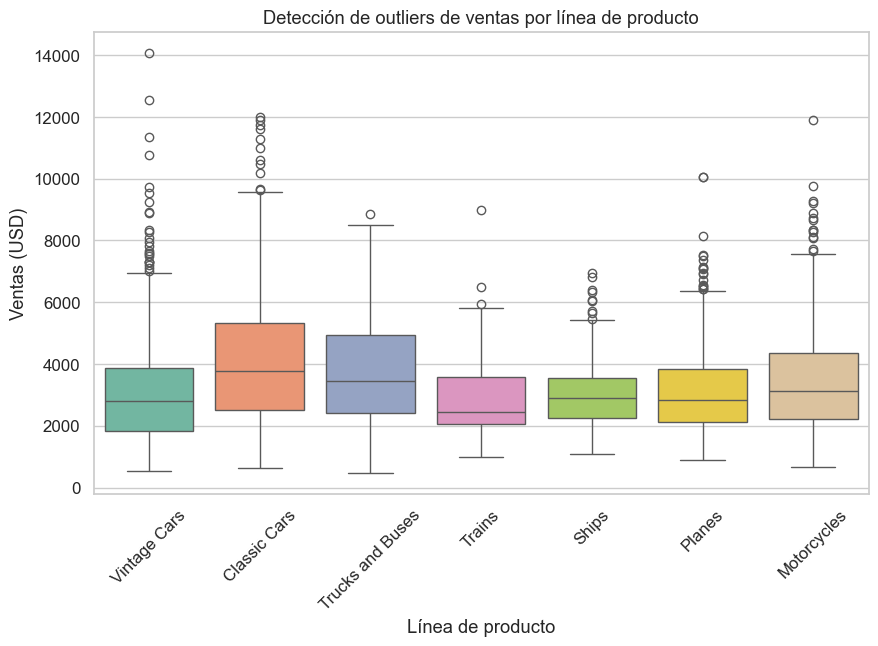

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico boxplot por línea de producto
plt.figure(figsize=(10,6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df, palette="Set2")
plt.title("Detección de outliers de ventas por línea de producto")
plt.xlabel("Línea de producto")
plt.ylabel("Ventas (USD)")
plt.xticks(rotation=45)
plt.show()

# 8. Visualizaciones clave (obligatorias)


# a. Series de tiempo de ventas totales

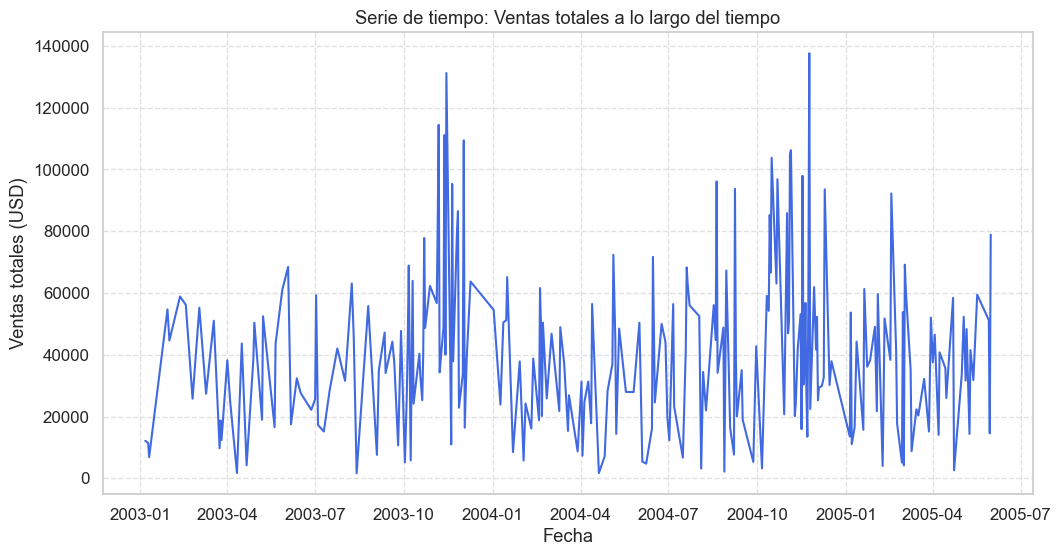

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarte de que la fecha esté en formato datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Agrupar ventas diarias
ventas_tiempo = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# Gráfico de serie de tiempo
plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_tiempo, x='ORDERDATE', y='SALES', color='royalblue')
plt.title("Serie de tiempo: Ventas totales a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ventas totales (USD)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# b. Gráfico de barras comparando ventas por sucursal

C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\3175561456.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CITY', y='SALES', data=ventas_ciudad, palette='crest')


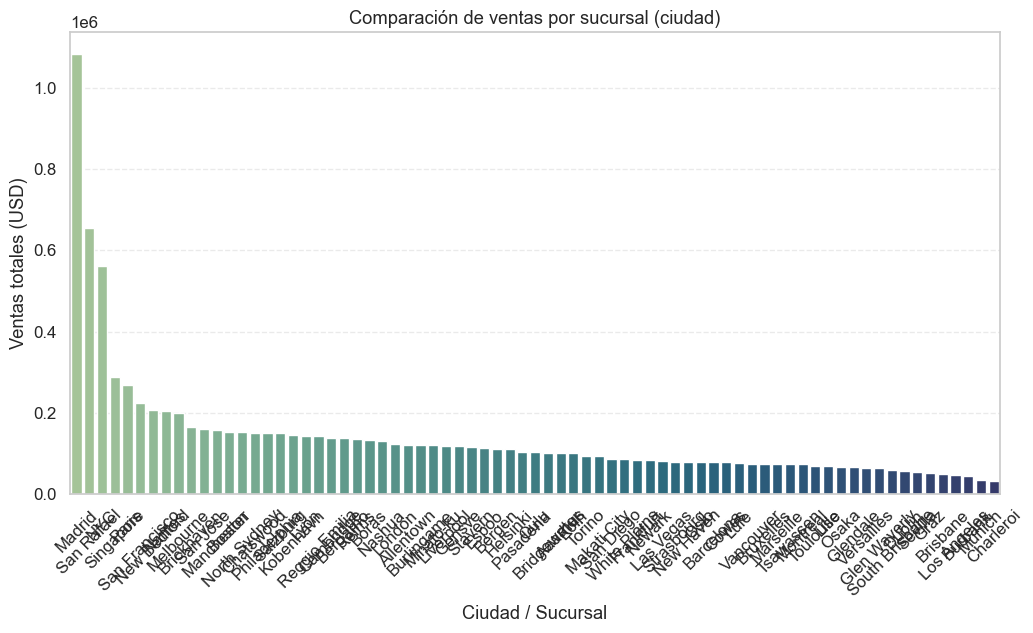

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar las ventas totales por ciudad (sucursal)
ventas_ciudad = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).reset_index()

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x='CITY', y='SALES', data=ventas_ciudad, palette='crest')
plt.title("Comparación de ventas por sucursal (ciudad)")
plt.xlabel("Ciudad / Sucursal")
plt.ylabel("Ventas totales (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.4)
plt.show()

# c. Gráfico de barras comparando ventas por producto.

C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\1579494240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRODUCTLINE', y='SALES', data=ventas_producto, palette='viridis')


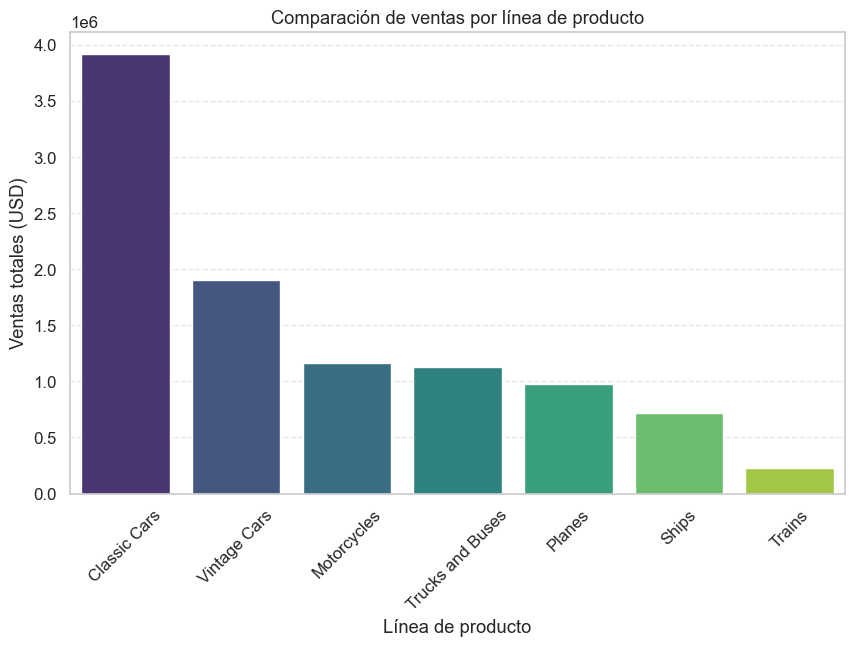

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar las ventas totales por línea de producto
ventas_producto = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).reset_index()

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='PRODUCTLINE', y='SALES', data=ventas_producto, palette='viridis')
plt.title("Comparación de ventas por línea de producto")
plt.xlabel("Línea de producto")
plt.ylabel("Ventas totales (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

# d. Heatmap o matriz para visualizar comportamiento de ventas en el tiempo y por sucursal/producto

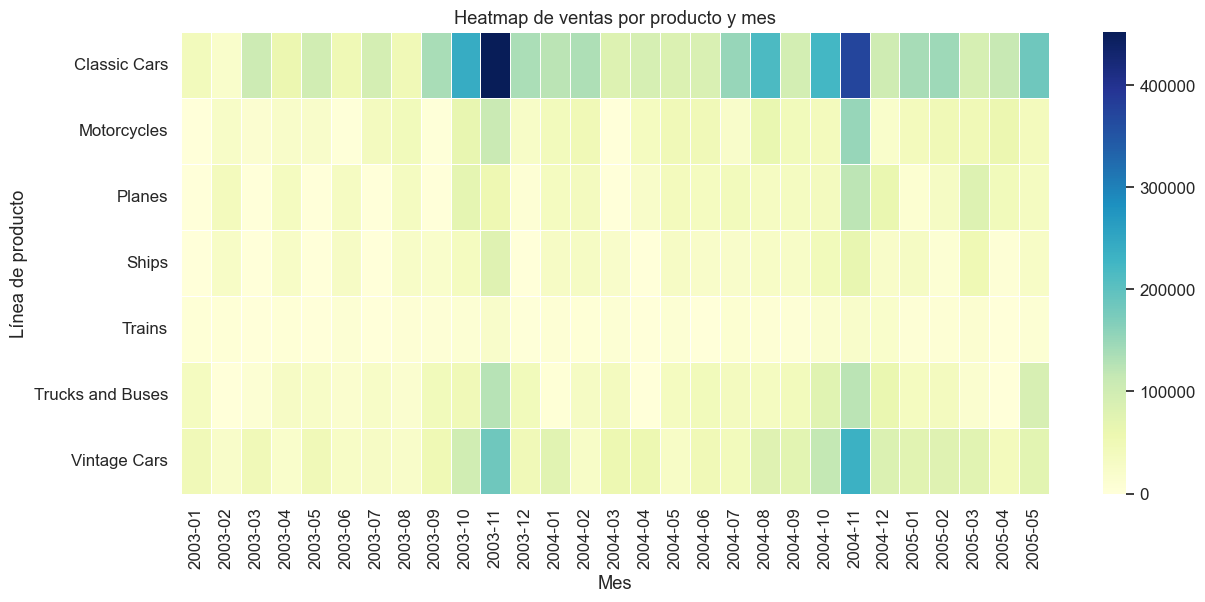

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar formato de fecha
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Extraer año y mes
df['YEAR_MONTH'] = df['ORDERDATE'].dt.to_period('M')

# Crear tabla dinámica (producto vs mes)
heatmap_producto = pd.pivot_table(
    df,
    values='SALES',
    index='PRODUCTLINE',
    columns='YEAR_MONTH',
    aggfunc='sum',
    fill_value=0
)

# Graficar el heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_producto, cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap de ventas por producto y mes")
plt.xlabel("Mes")
plt.ylabel("Línea de producto")
plt.show()

# 9. Para cada serie temporal específica (ventas totales, ventas por sucursal, ventas por producto y ventas por sucursal-producto).

# a. Aplicar: i. Gráfico de Autocorrelación (ACF): muestra la dependencia entre la serie y sus rezagos.

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

# Gráfico ACF – Ventas Totales

<Figure size 1000x500 with 0 Axes>

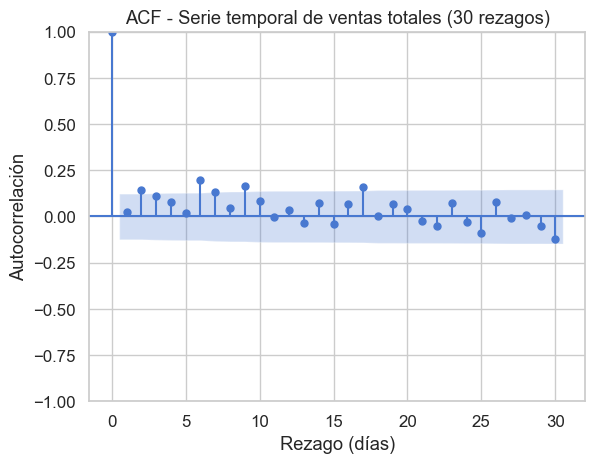

In [50]:
# Asegurar formato de fecha
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Agrupar por fecha (serie temporal diaria)
ventas_diarias = df.groupby('ORDERDATE')['SALES'].sum()

# Graficar autocorrelación
plt.figure(figsize=(10,5))
plot_acf(ventas_diarias, lags=30)
plt.title("ACF - Serie temporal de ventas totales (30 rezagos)")
plt.xlabel("Rezago (días)")
plt.ylabel("Autocorrelación")
plt.show()

# Gráfico ACF – Ventas por sucursal

<Figure size 800x400 with 0 Axes>

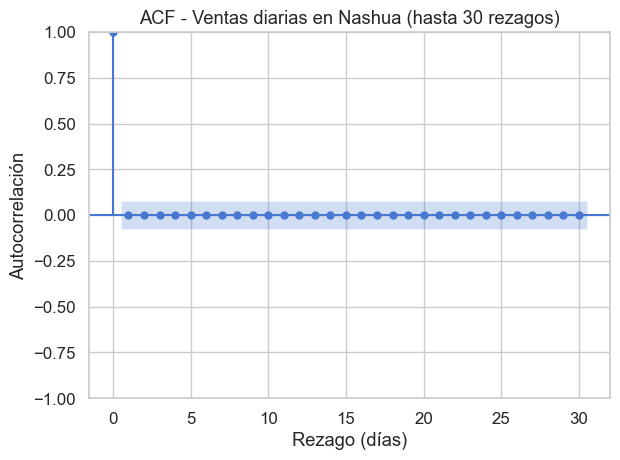

<Figure size 800x400 with 0 Axes>

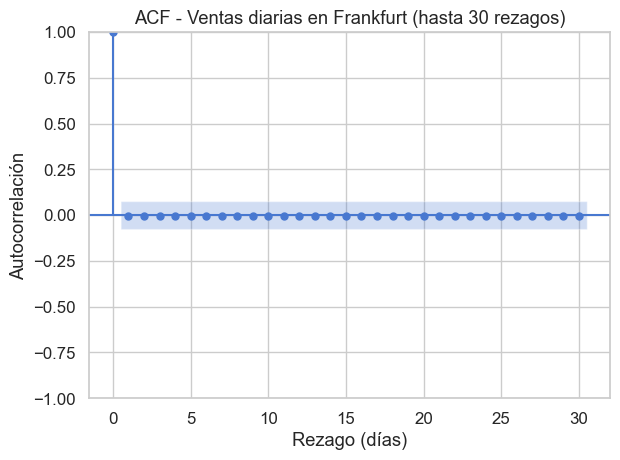

<Figure size 800x400 with 0 Axes>

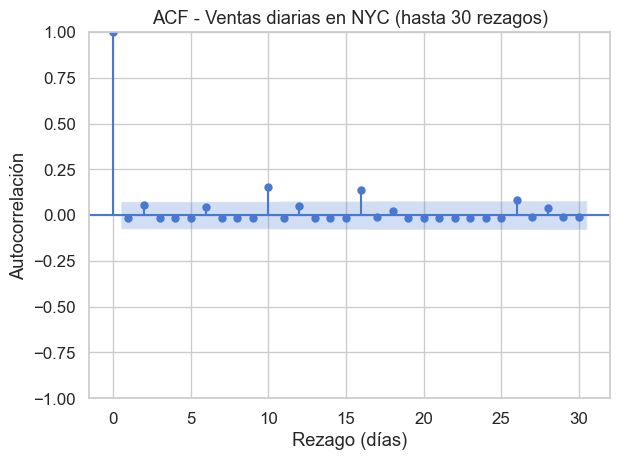

<Figure size 800x400 with 0 Axes>

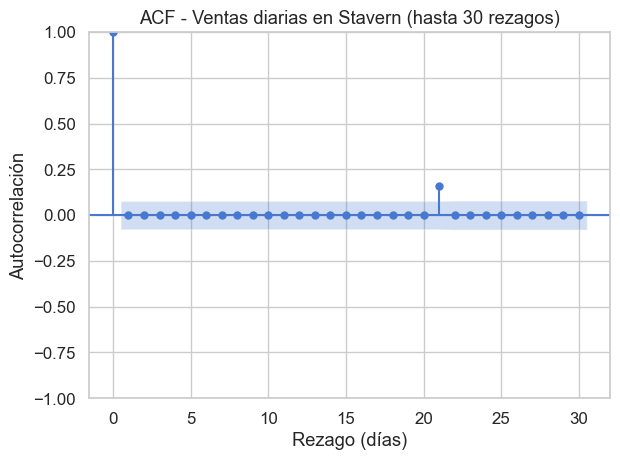

<Figure size 800x400 with 0 Axes>

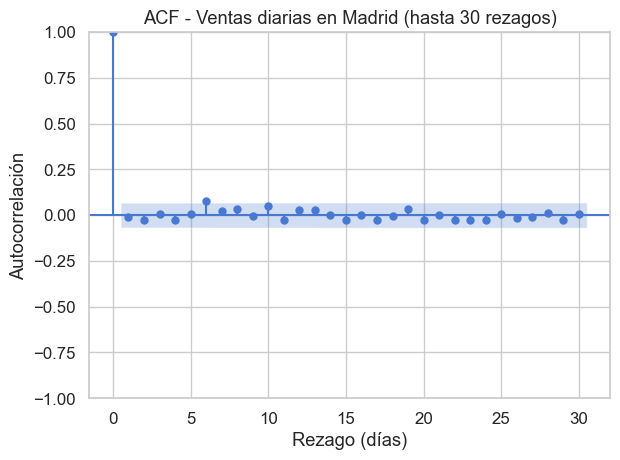

<Figure size 800x400 with 0 Axes>

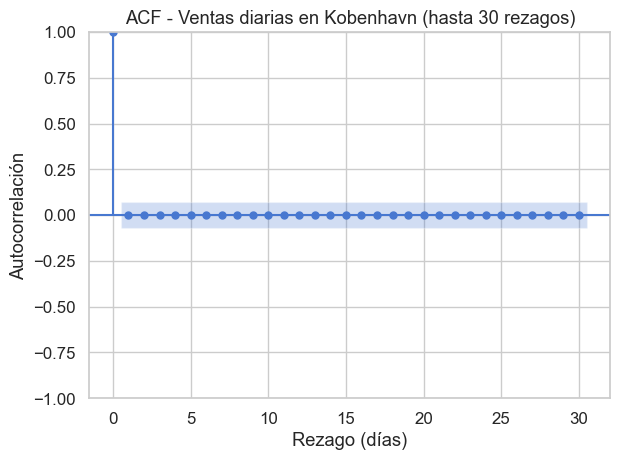

<Figure size 800x400 with 0 Axes>

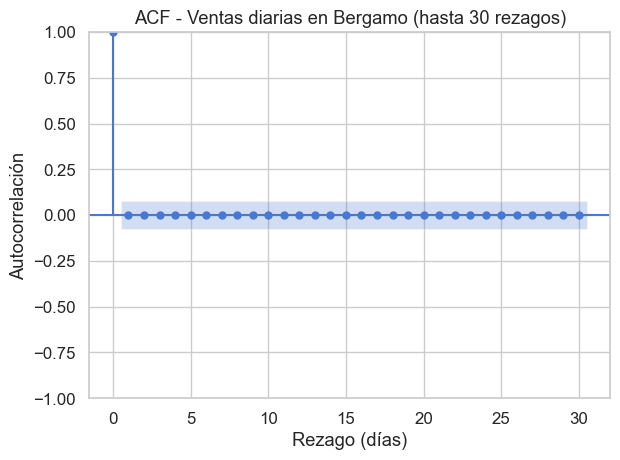

<Figure size 800x400 with 0 Axes>

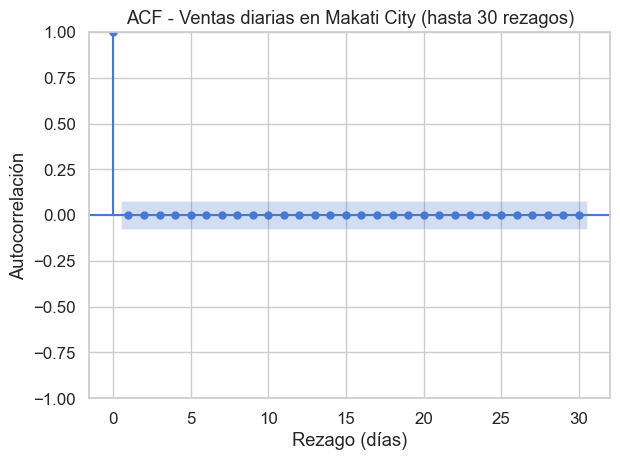

<Figure size 800x400 with 0 Axes>

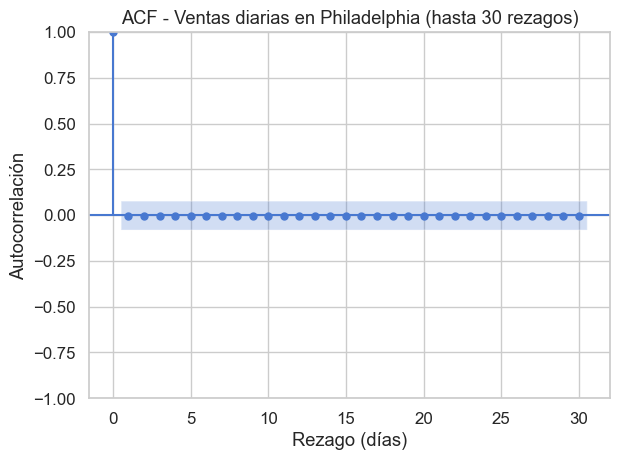

<Figure size 800x400 with 0 Axes>

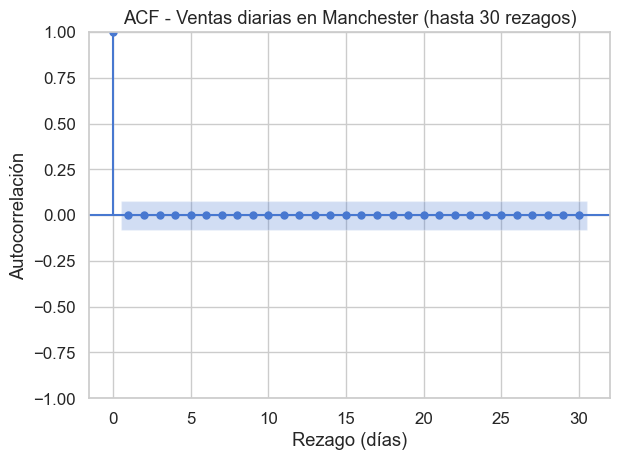

<Figure size 800x400 with 0 Axes>

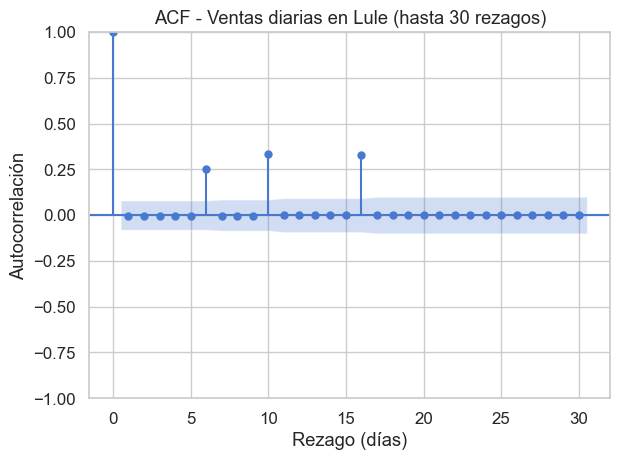

<Figure size 800x400 with 0 Axes>

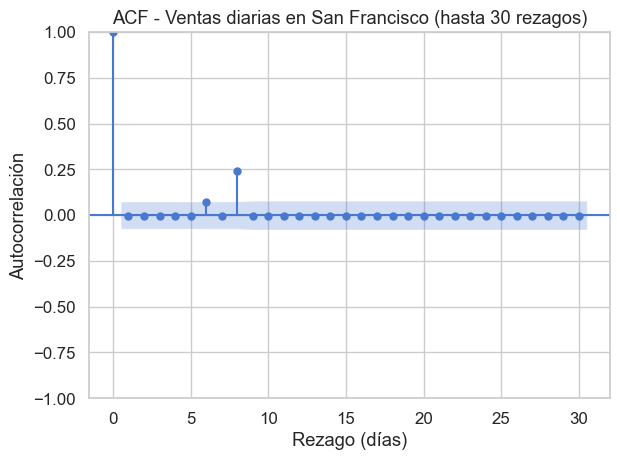

<Figure size 800x400 with 0 Axes>

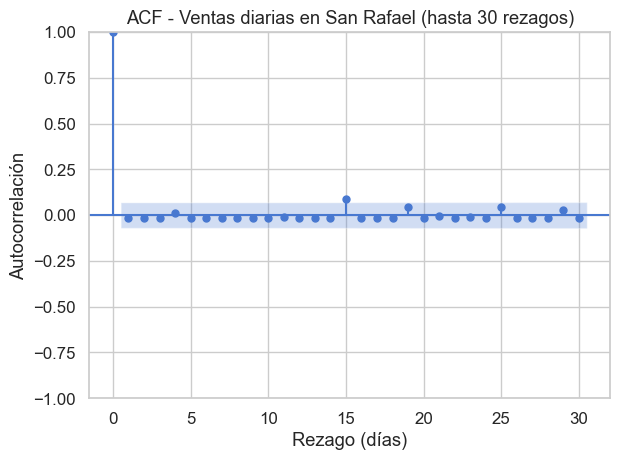

<Figure size 800x400 with 0 Axes>

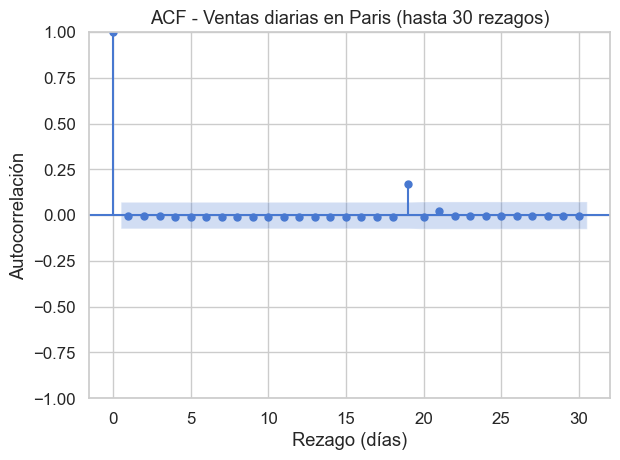

<Figure size 800x400 with 0 Axes>

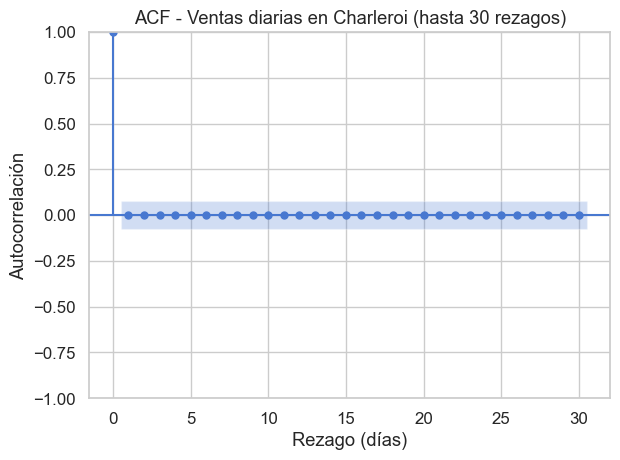

<Figure size 800x400 with 0 Axes>

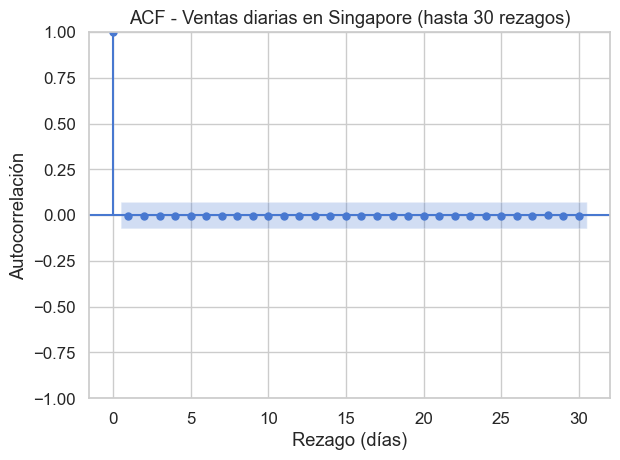

<Figure size 800x400 with 0 Axes>

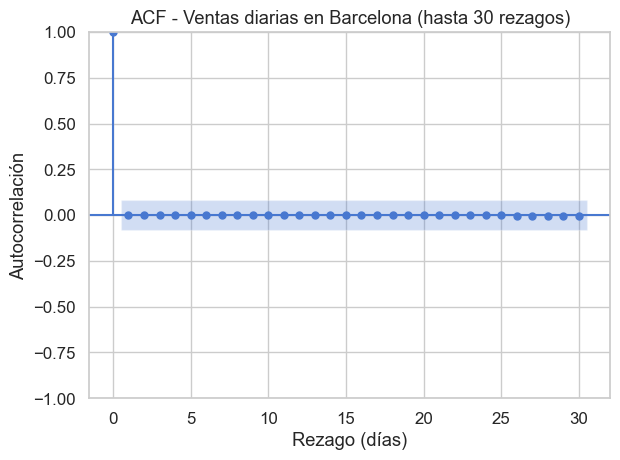

<Figure size 800x400 with 0 Axes>

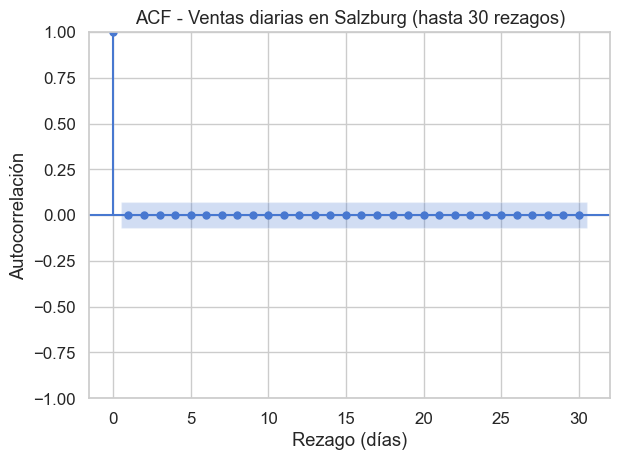

<Figure size 800x400 with 0 Axes>

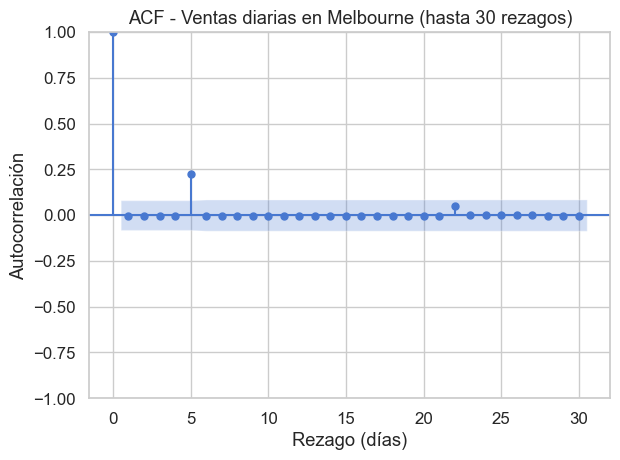

<Figure size 800x400 with 0 Axes>

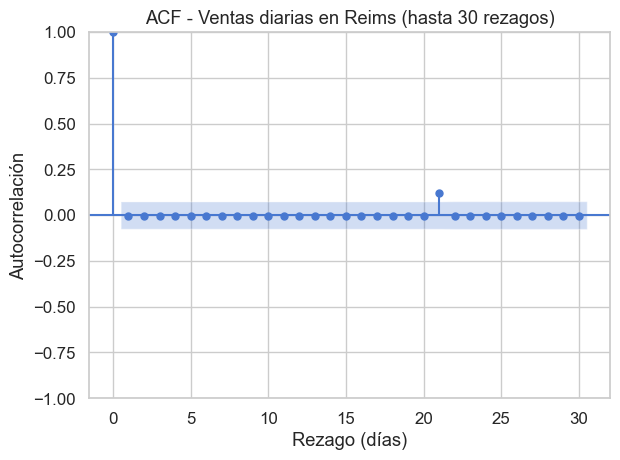

<Figure size 800x400 with 0 Axes>

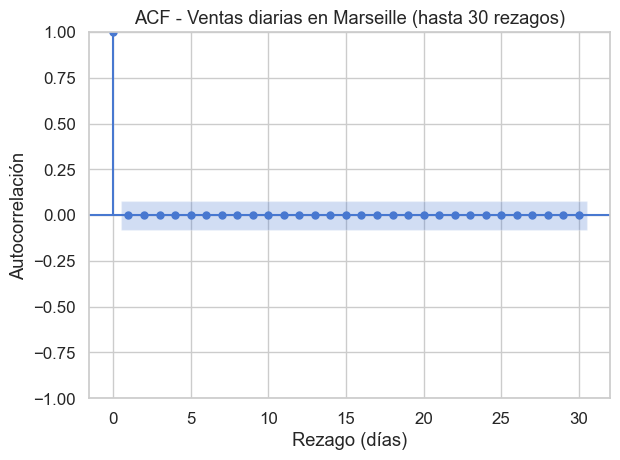

<Figure size 800x400 with 0 Axes>

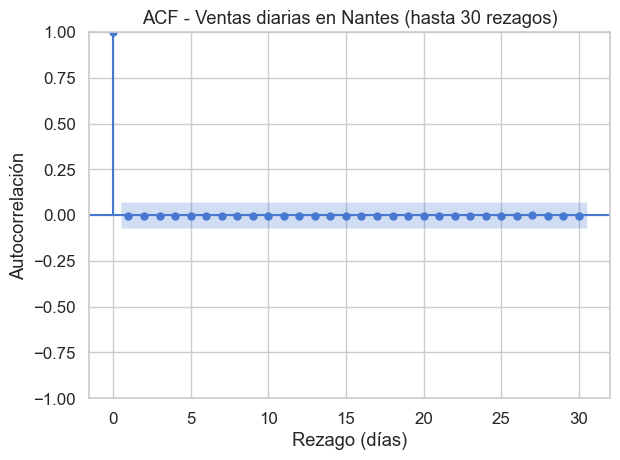

<Figure size 800x400 with 0 Axes>

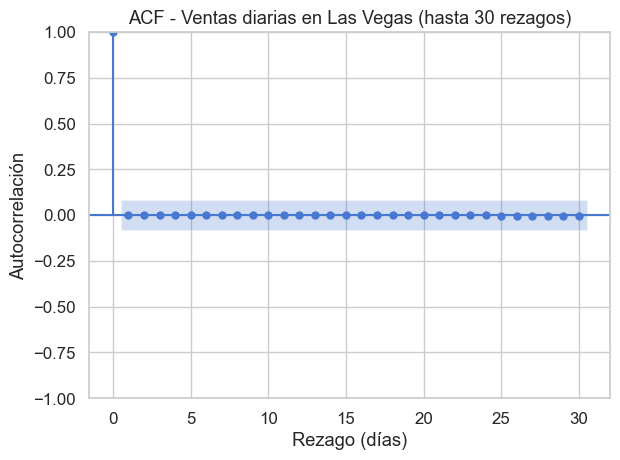

<Figure size 800x400 with 0 Axes>

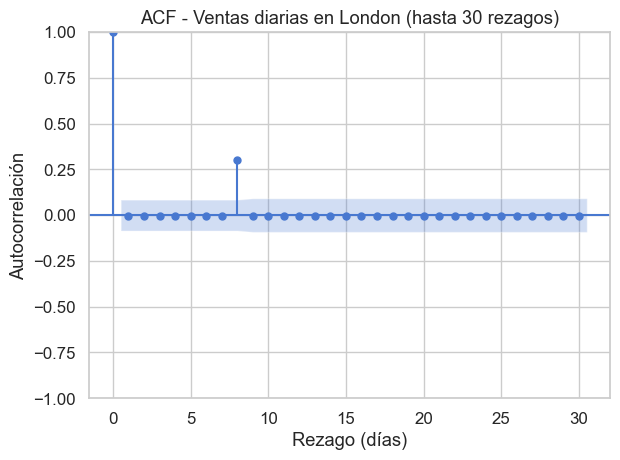

<Figure size 800x400 with 0 Axes>

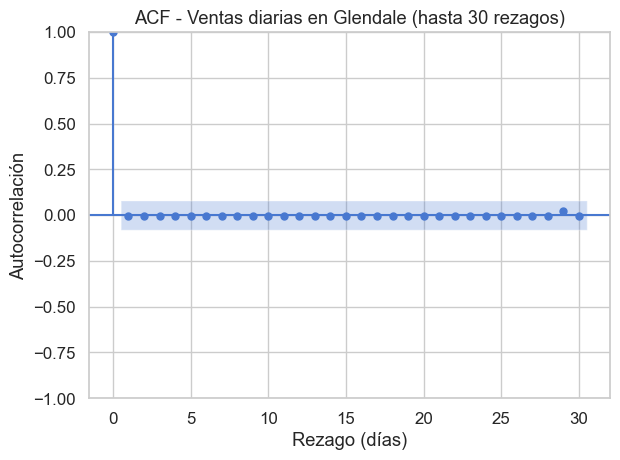

<Figure size 800x400 with 0 Axes>

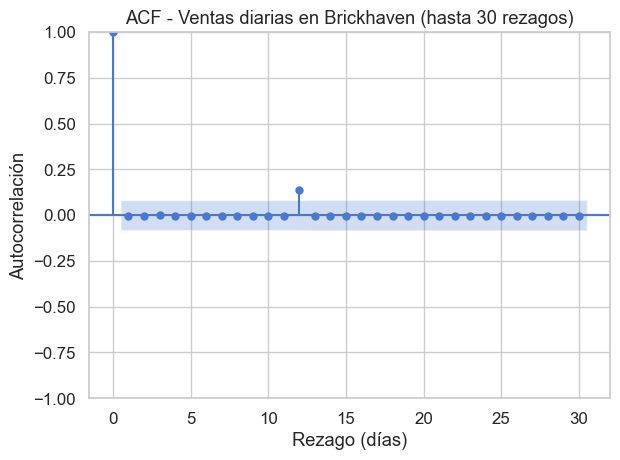

<Figure size 800x400 with 0 Axes>

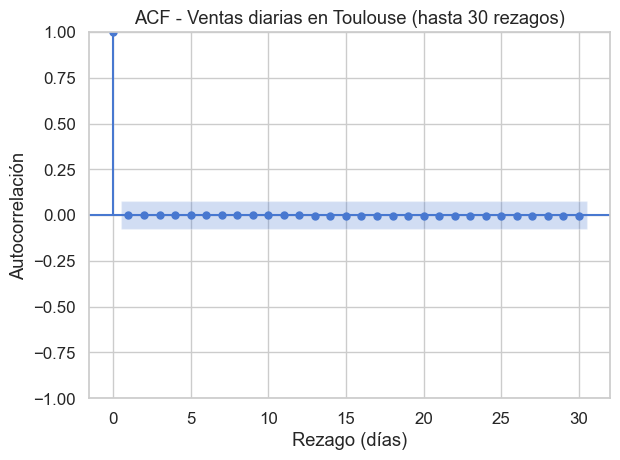

<Figure size 800x400 with 0 Axes>

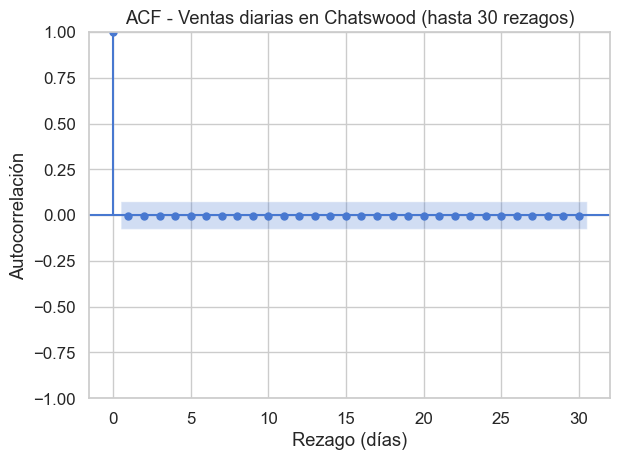

<Figure size 800x400 with 0 Axes>

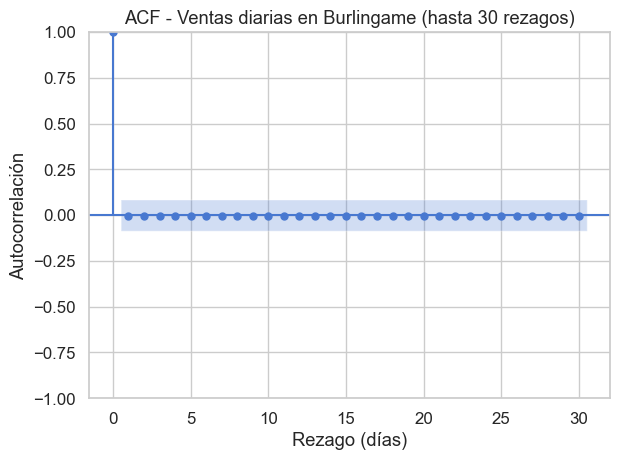

<Figure size 800x400 with 0 Axes>

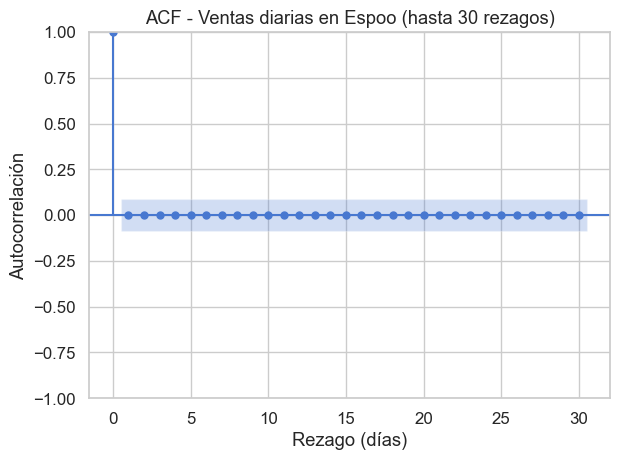

<Figure size 800x400 with 0 Axes>

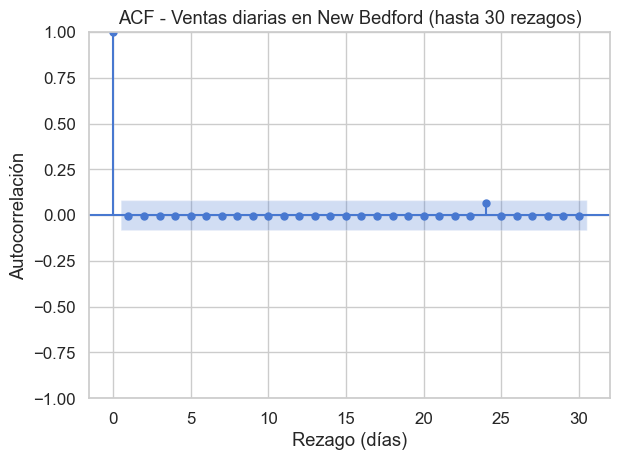

<Figure size 800x400 with 0 Axes>

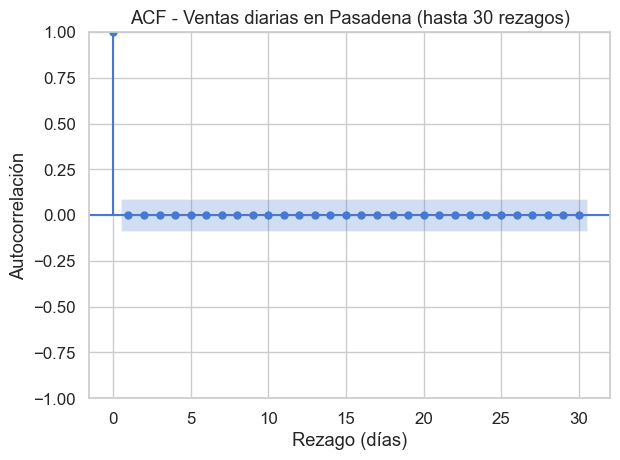

<Figure size 800x400 with 0 Axes>

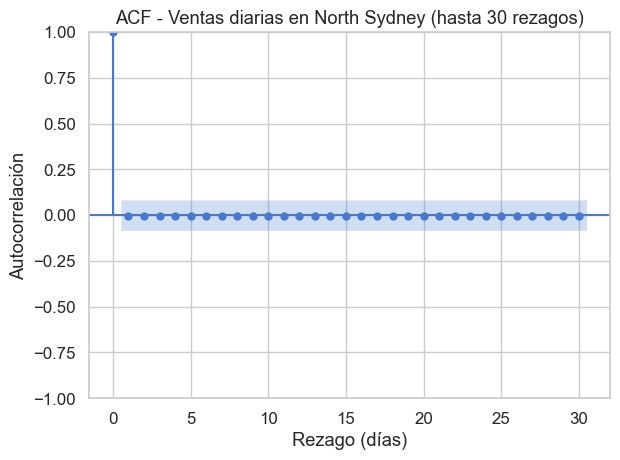

<Figure size 800x400 with 0 Axes>

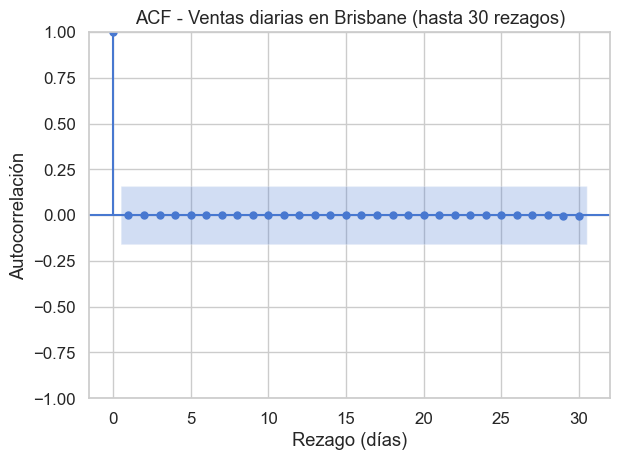

<Figure size 800x400 with 0 Axes>

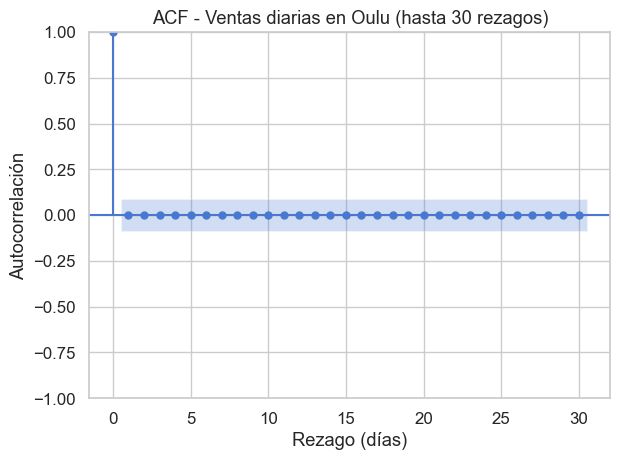

<Figure size 800x400 with 0 Axes>

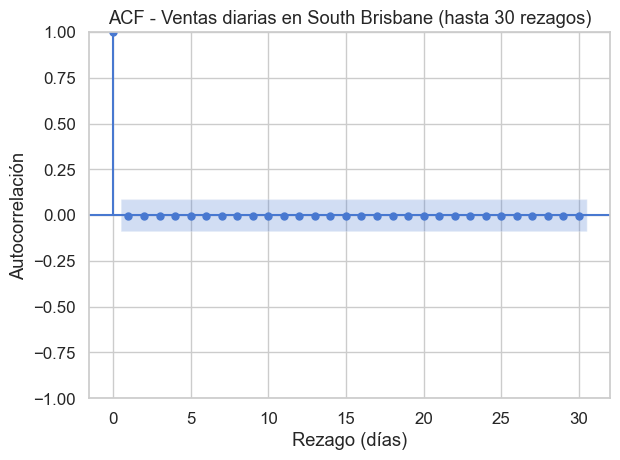

<Figure size 800x400 with 0 Axes>

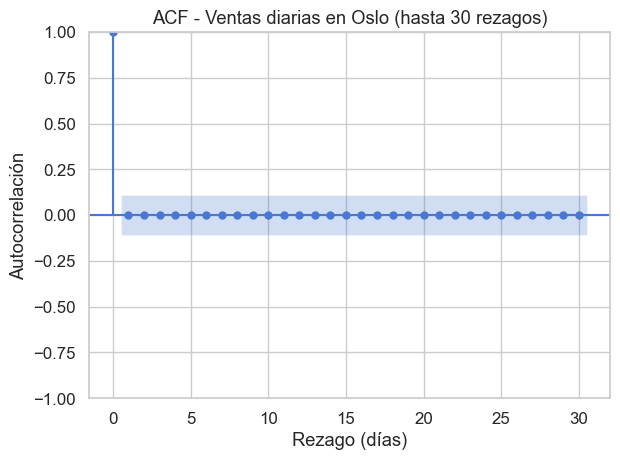

<Figure size 800x400 with 0 Axes>

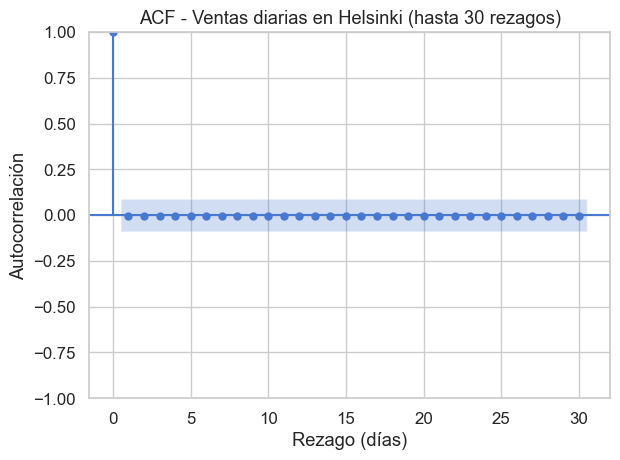

<Figure size 800x400 with 0 Axes>

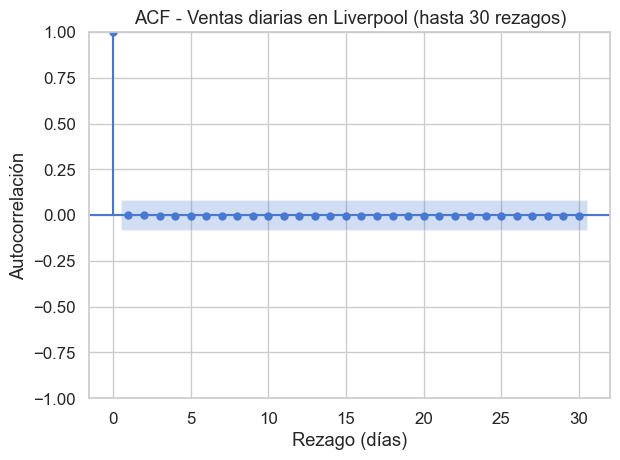

<Figure size 800x400 with 0 Axes>

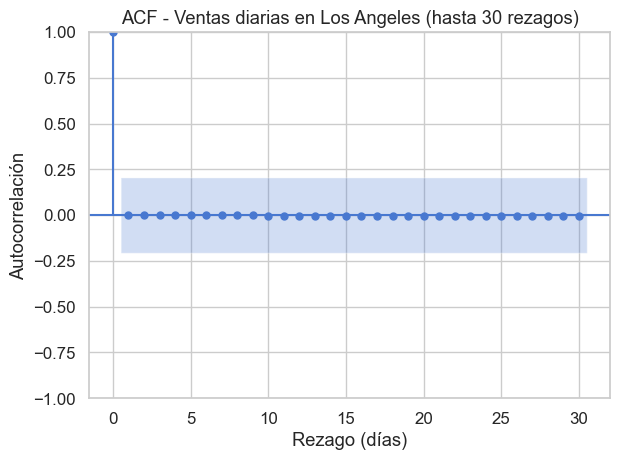

<Figure size 800x400 with 0 Axes>

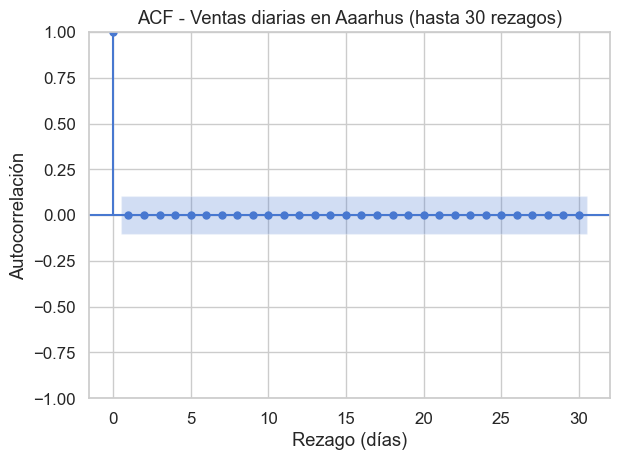

<Figure size 800x400 with 0 Axes>

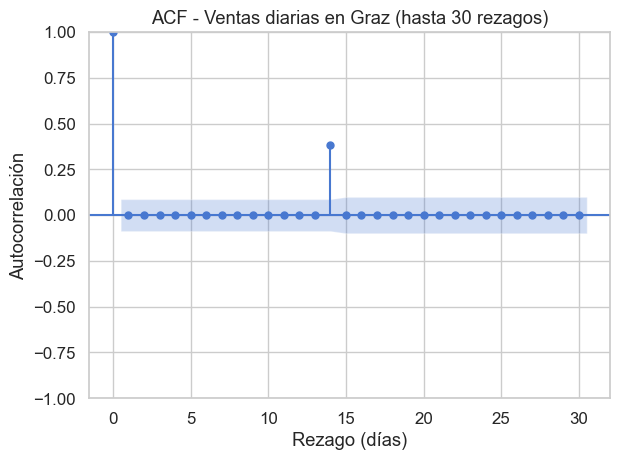

<Figure size 800x400 with 0 Axes>

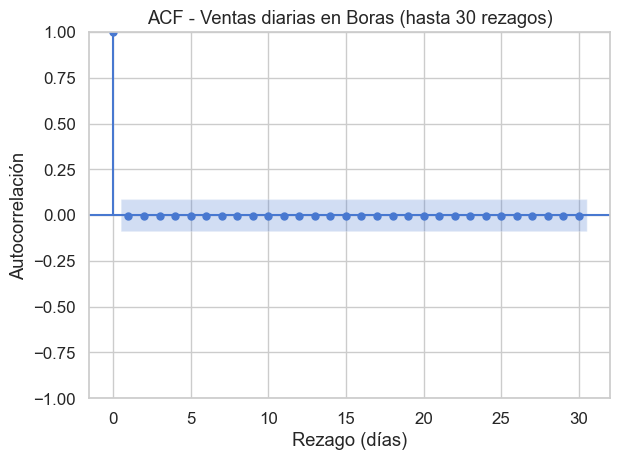

<Figure size 800x400 with 0 Axes>

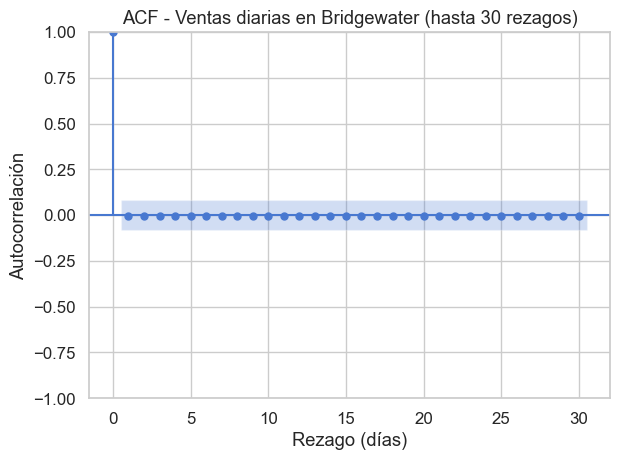

<Figure size 800x400 with 0 Axes>

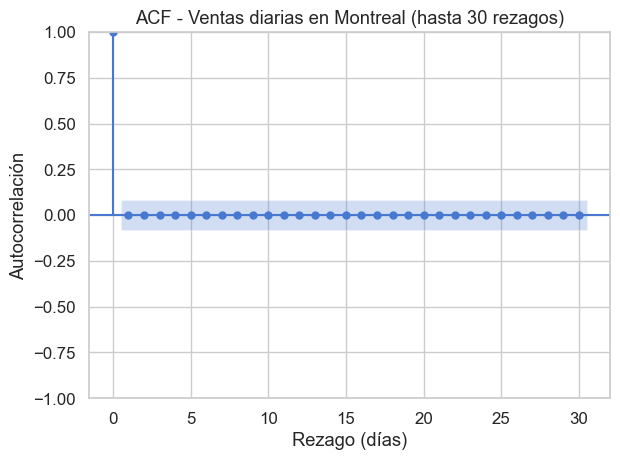

<Figure size 800x400 with 0 Axes>

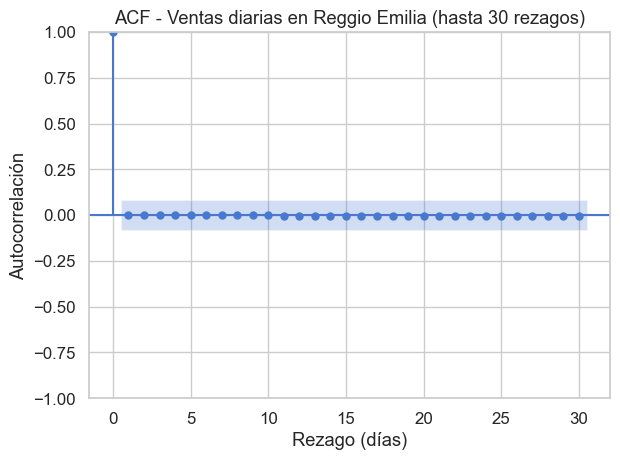

<Figure size 800x400 with 0 Axes>

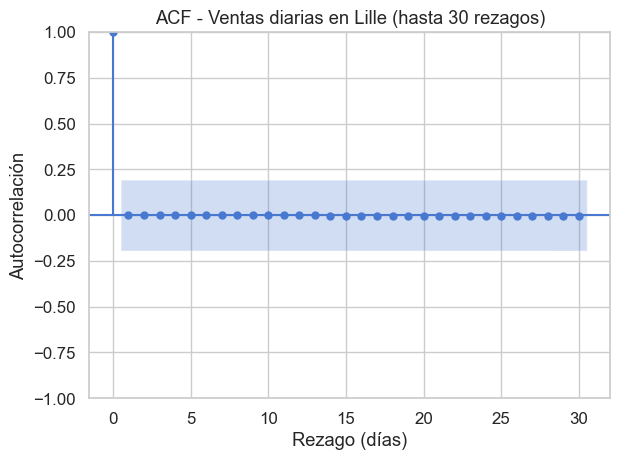

<Figure size 800x400 with 0 Axes>

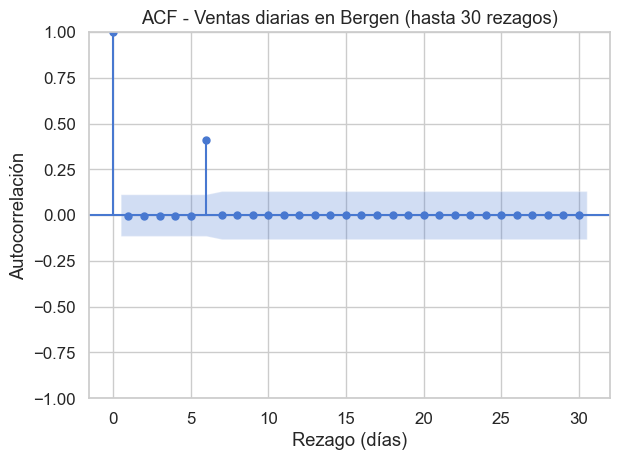

<Figure size 800x400 with 0 Axes>

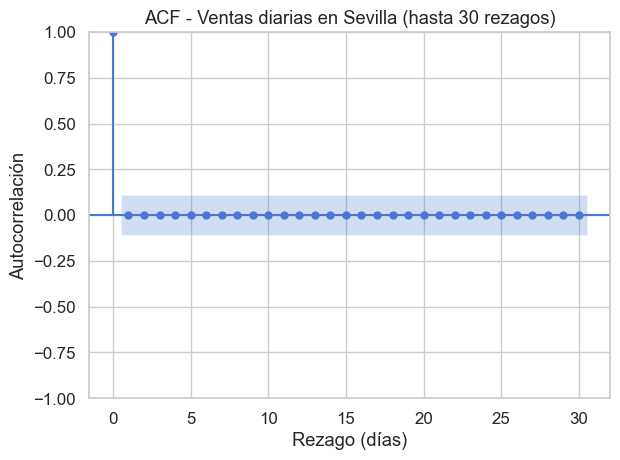

<Figure size 800x400 with 0 Axes>

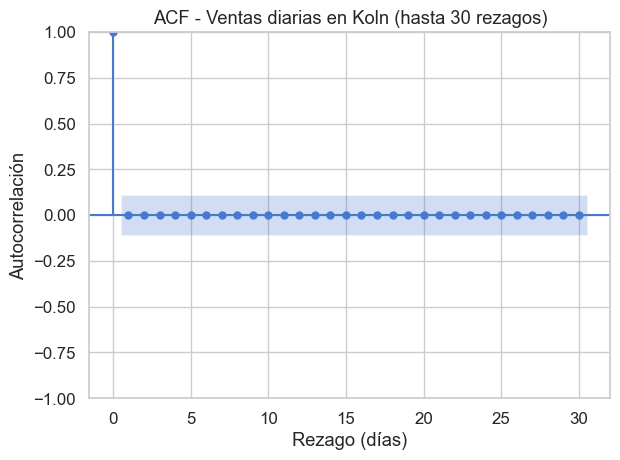

<Figure size 800x400 with 0 Axes>

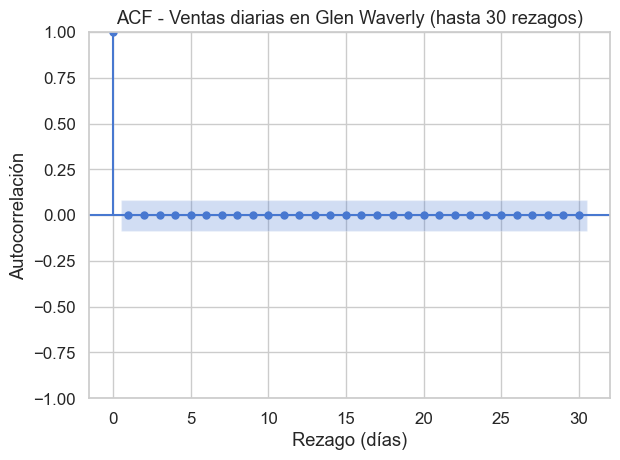

<Figure size 800x400 with 0 Axes>

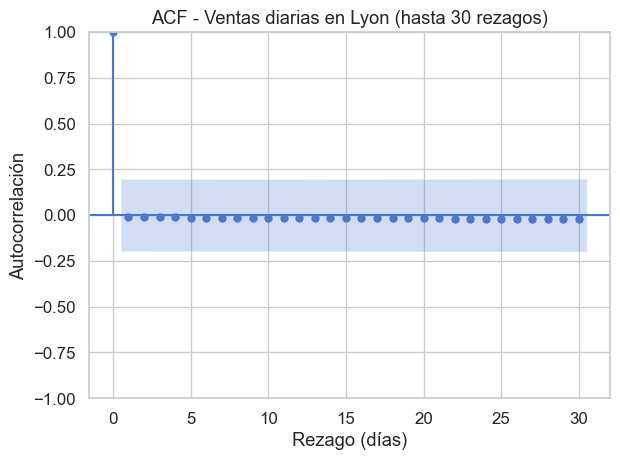

<Figure size 800x400 with 0 Axes>

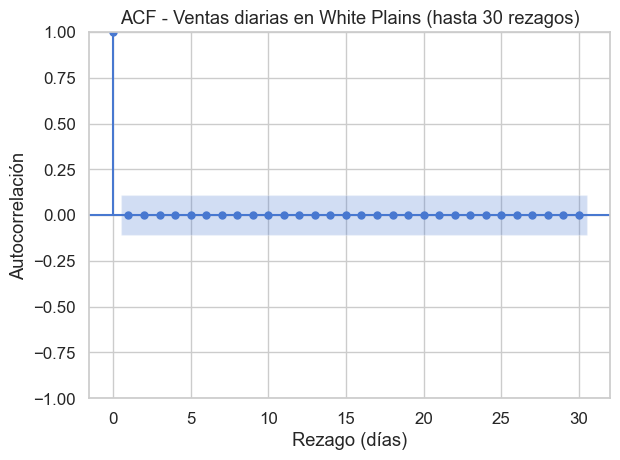

<Figure size 800x400 with 0 Axes>

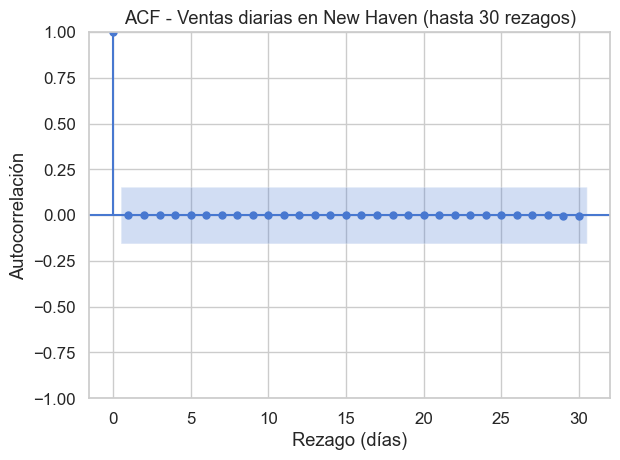

<Figure size 800x400 with 0 Axes>

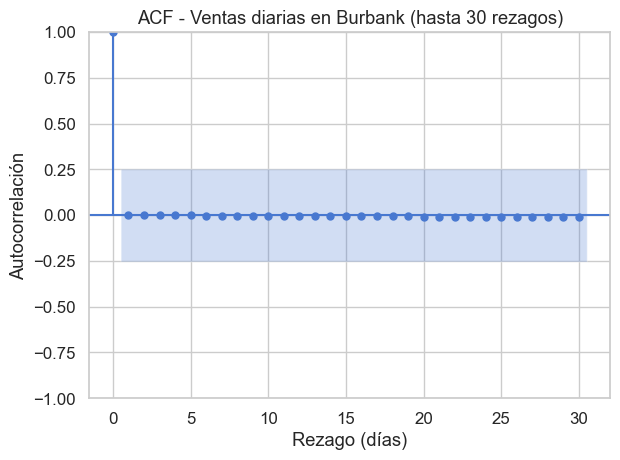

<Figure size 800x400 with 0 Axes>

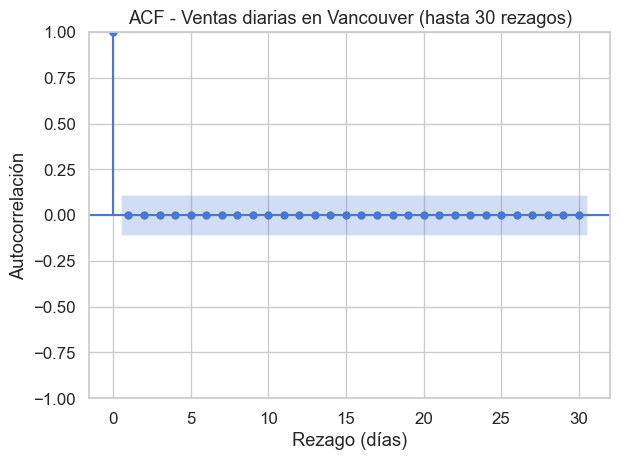

<Figure size 800x400 with 0 Axes>

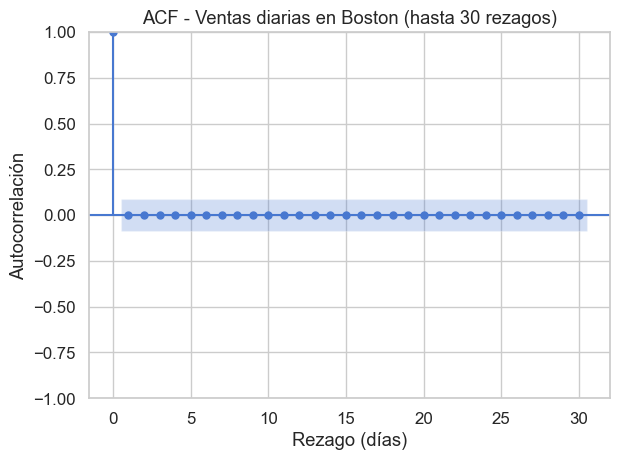

<Figure size 800x400 with 0 Axes>

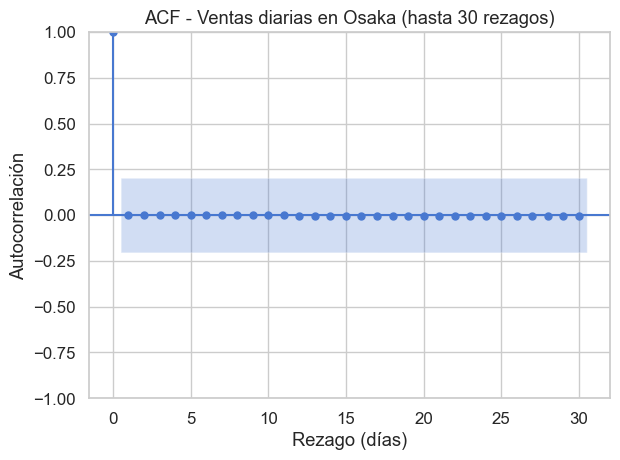

<Figure size 800x400 with 0 Axes>

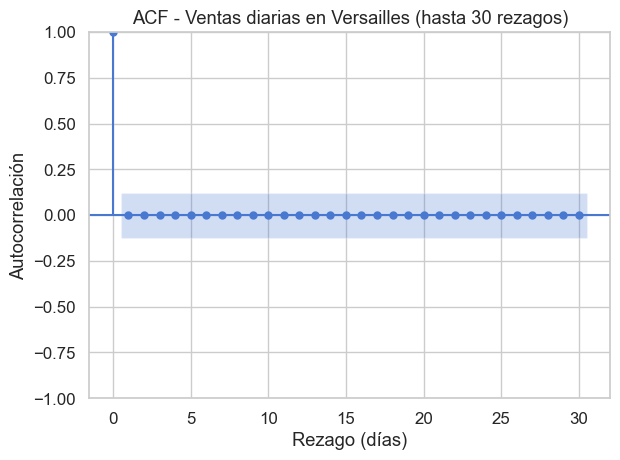

<Figure size 800x400 with 0 Axes>

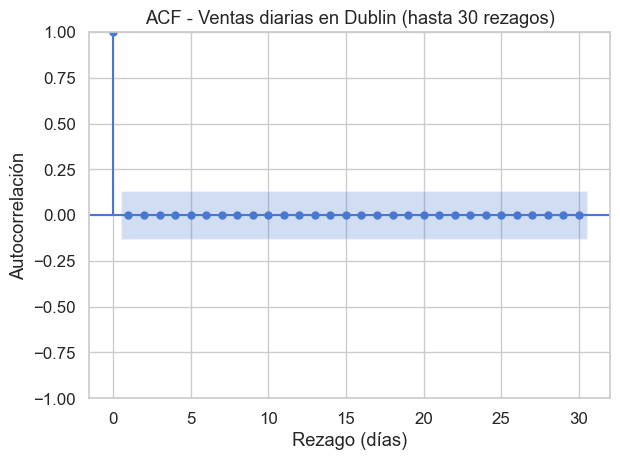

<Figure size 800x400 with 0 Axes>

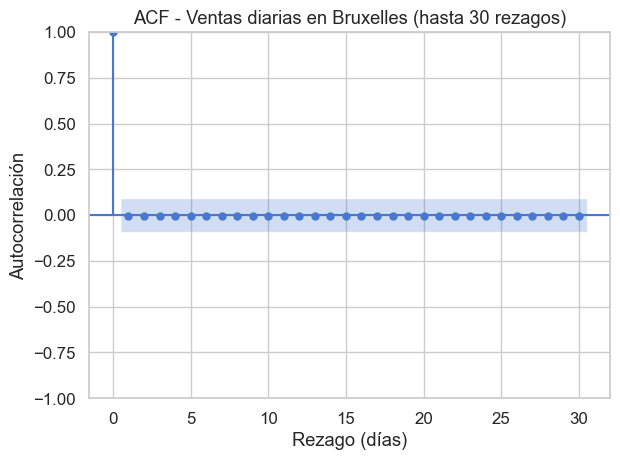

<Figure size 800x400 with 0 Axes>

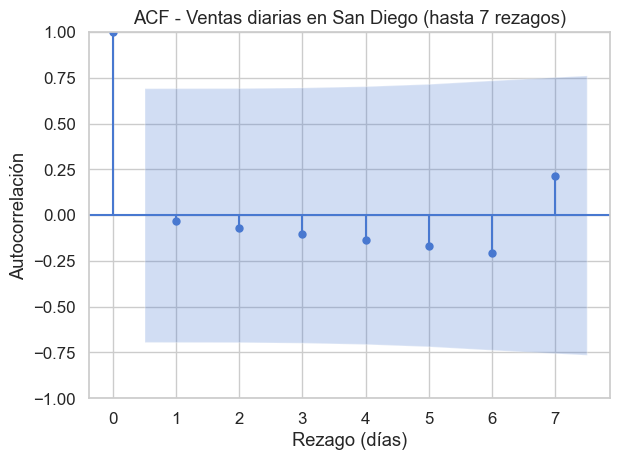

<Figure size 800x400 with 0 Axes>

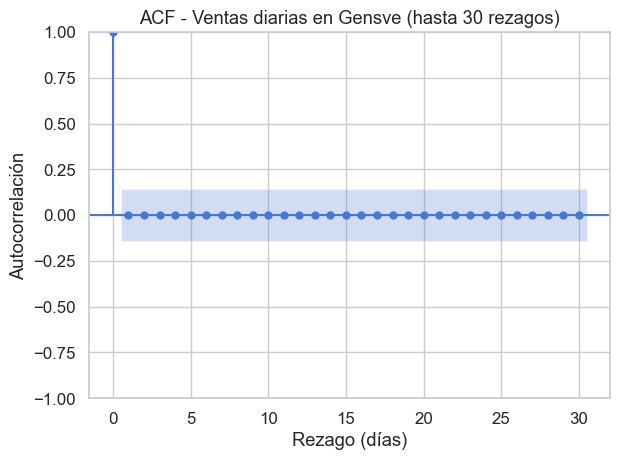

<Figure size 800x400 with 0 Axes>

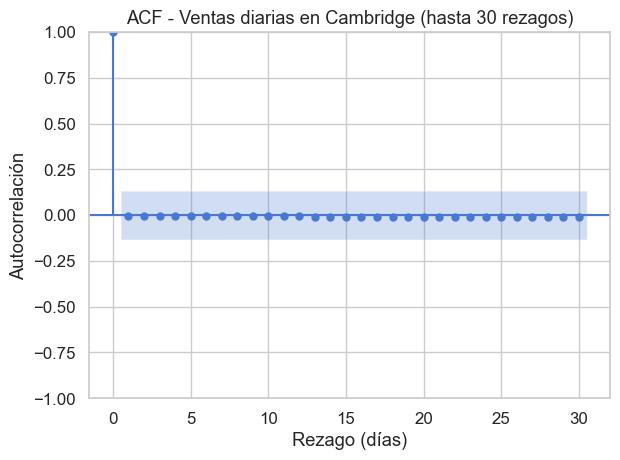

<Figure size 800x400 with 0 Axes>

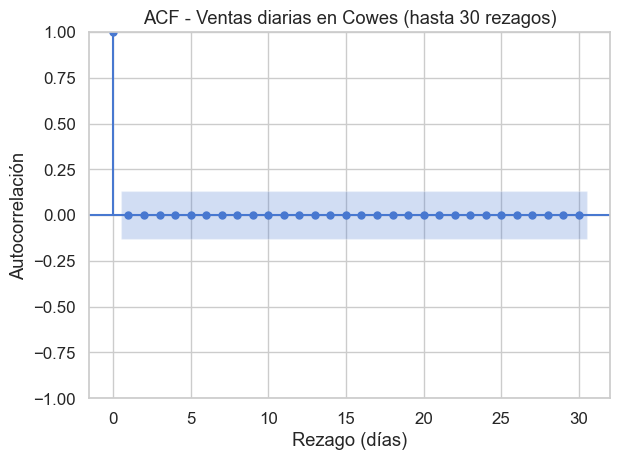

<Figure size 800x400 with 0 Axes>

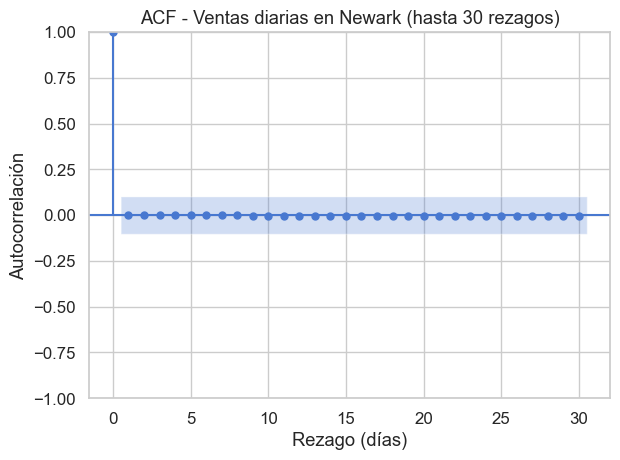

<Figure size 800x400 with 0 Axes>

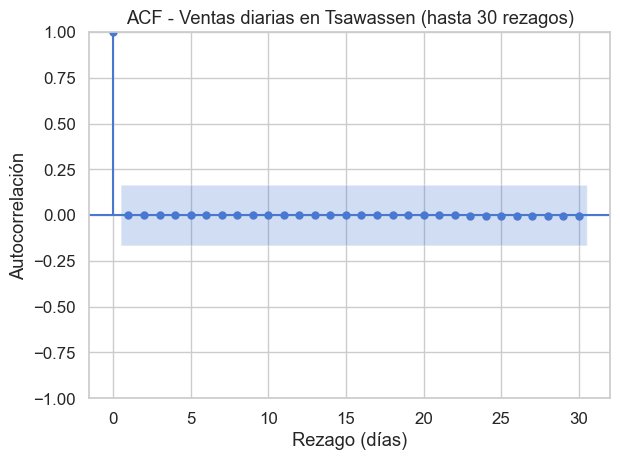

<Figure size 800x400 with 0 Axes>

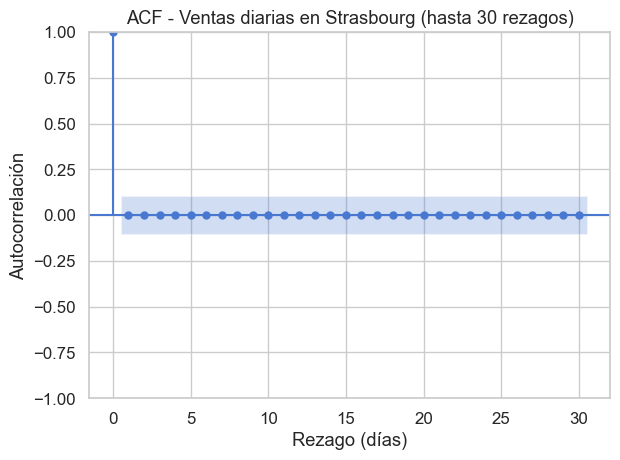

<Figure size 800x400 with 0 Axes>

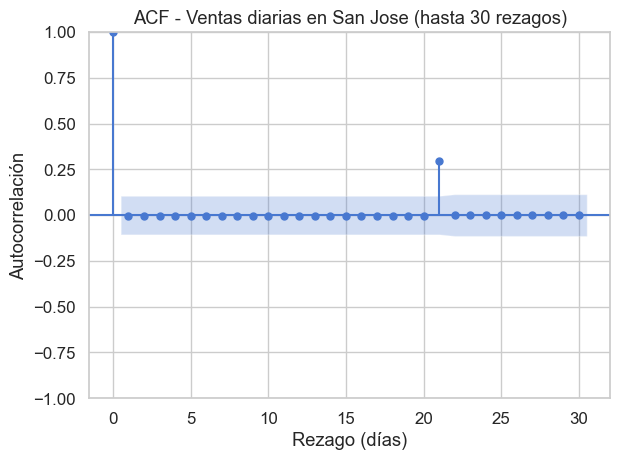

<Figure size 800x400 with 0 Axes>

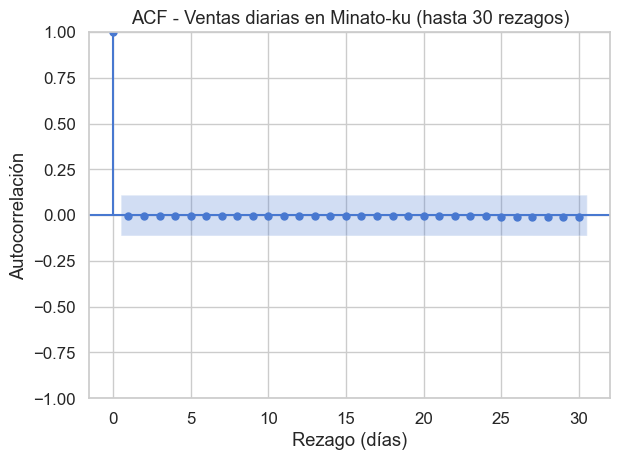

<Figure size 800x400 with 0 Axes>

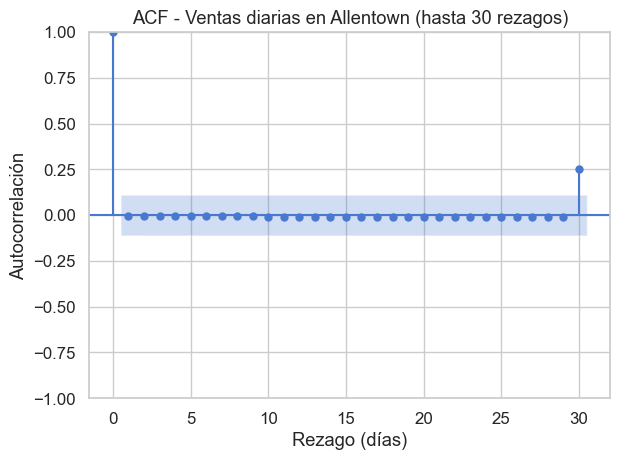

<Figure size 800x400 with 0 Axes>

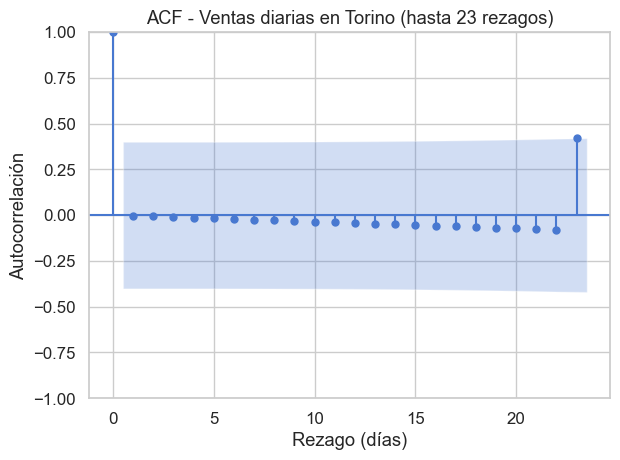

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar formato de fecha
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Obtener lista de sucursales únicas
sucursales = df['CITY'].dropna().unique()

# Generar ACF para cada sucursal
for sucursal in sucursales:
    # Filtrar los datos de la sucursal
    tmp = df[df['CITY'] == sucursal].copy()
    tmp = tmp.sort_values('ORDERDATE')

    # Serie diaria de ventas (resample regular)
    serie = tmp.set_index('ORDERDATE')['SALES'].resample('D').sum().dropna()

    # Saltar si la serie es muy corta
    if len(serie) < 5:
        continue

    # Ajuste automático del número de rezagos
    max_lags = max(1, min(30, len(serie) - 1))

    # Graficar
    plt.figure(figsize=(8,4))
    plot_acf(serie, lags=max_lags, missing='drop')
    plt.title(f"ACF - Ventas diarias en {sucursal} (hasta {max_lags} rezagos)")
    plt.xlabel("Rezago (días)")
    plt.ylabel("Autocorrelación")
    plt.tight_layout()
    plt.show()

# Gráfico ACF – Ventas por producto

<Figure size 800x400 with 0 Axes>

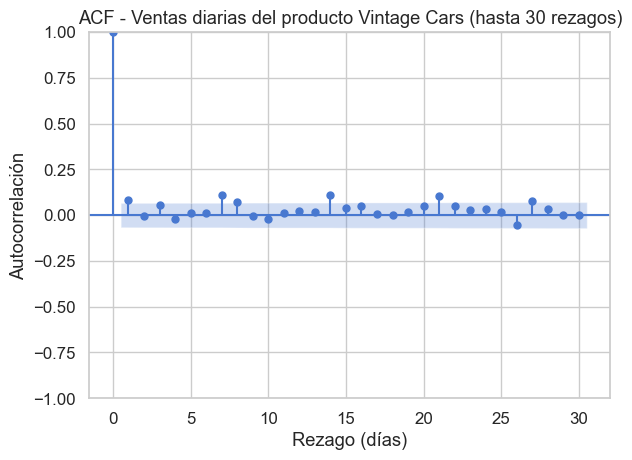

<Figure size 800x400 with 0 Axes>

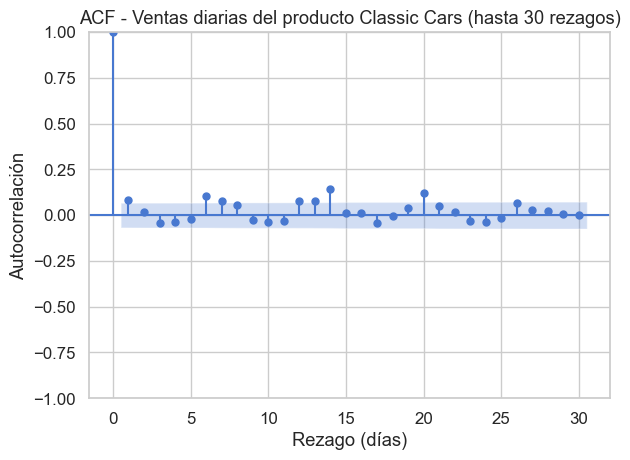

<Figure size 800x400 with 0 Axes>

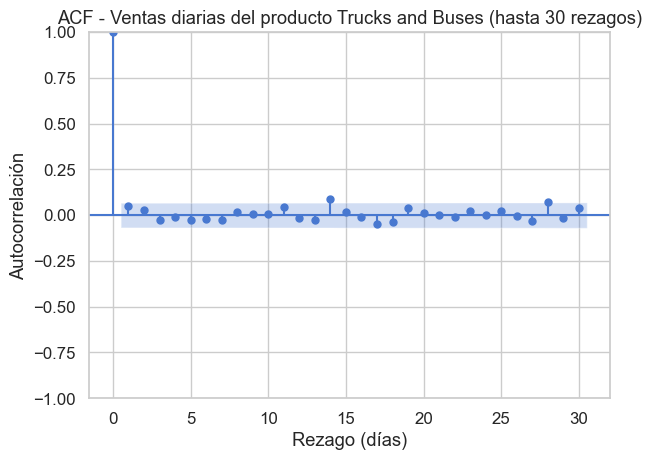

<Figure size 800x400 with 0 Axes>

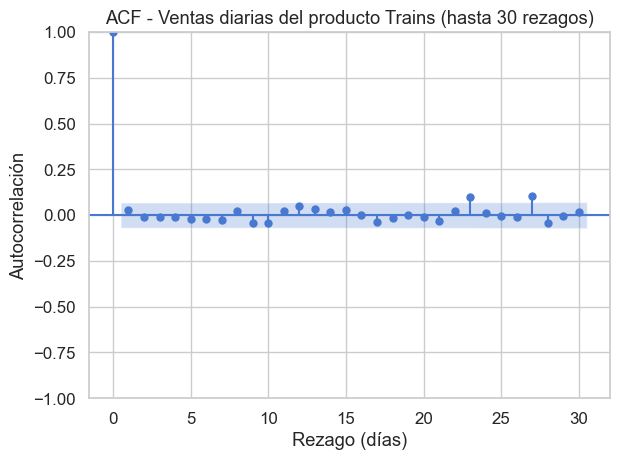

<Figure size 800x400 with 0 Axes>

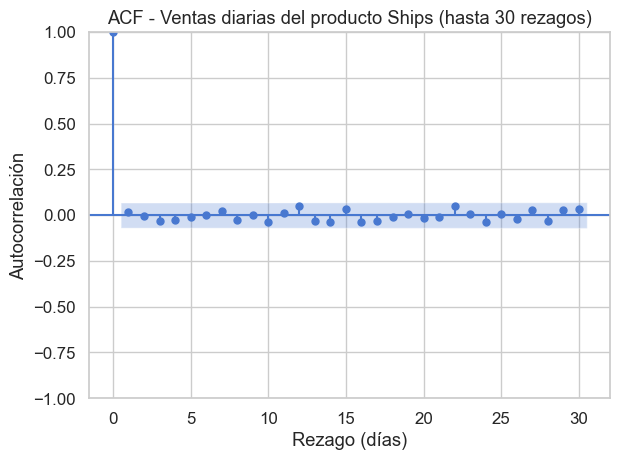

<Figure size 800x400 with 0 Axes>

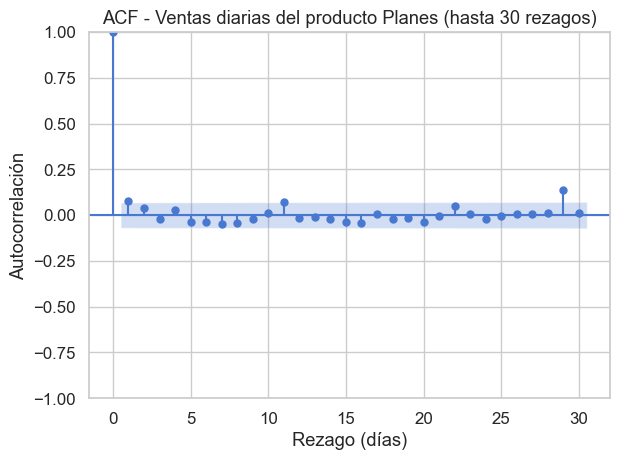

<Figure size 800x400 with 0 Axes>

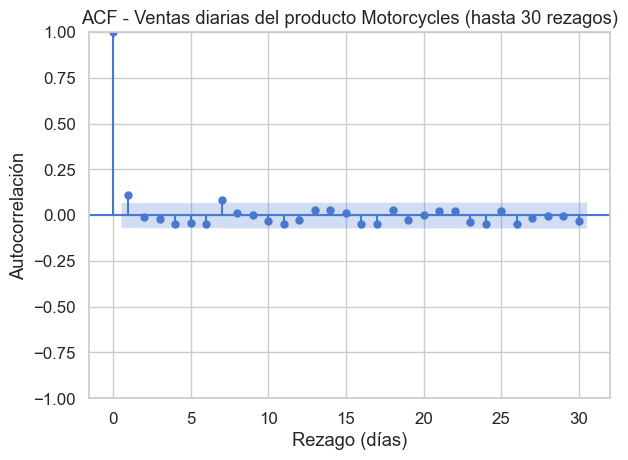

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar formato de fecha
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Obtener lista de productos únicos
productos = df['PRODUCTLINE'].dropna().unique()

# Generar ACF para cada producto
for producto in productos:
    # Filtrar los datos del producto
    tmp = df[df['PRODUCTLINE'] == producto].copy()
    tmp = tmp.sort_values('ORDERDATE')

    # Serie diaria de ventas (resample regular)
    serie = tmp.set_index('ORDERDATE')['SALES'].resample('D').sum().dropna()

    # Saltar si la serie es muy corta
    if len(serie) < 5:
        continue

    # Ajustar el número de rezagos según la longitud de la serie
    max_lags = max(1, min(30, len(serie) - 1))

    # Graficar ACF
    plt.figure(figsize=(8,4))
    plot_acf(serie, lags=max_lags, missing='drop')
    plt.title(f"ACF - Ventas diarias del producto {producto} (hasta {max_lags} rezagos)")
    plt.xlabel("Rezago (días)")
    plt.ylabel("Autocorrelación")
    plt.tight_layout()
    plt.show()

# Gráfico de Autocorrelación Parcial (PACF): ayuda a identificar la cantidad de términos AR (autoregresivos) que deben incluirse.

# Ventas totales

<Figure size 1000x500 with 0 Axes>

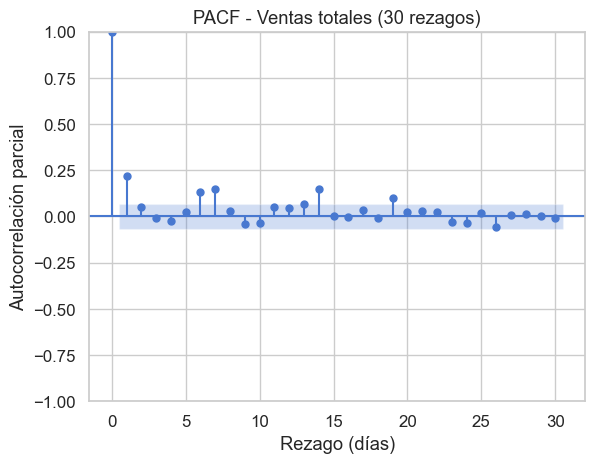

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar formato de fecha
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Serie temporal diaria (ventas totales)
ventas_diarias = df.groupby('ORDERDATE')['SALES'].sum().resample('D').sum().dropna()

# Graficar PACF
plt.figure(figsize=(10,5))
plot_pacf(ventas_diarias, lags=30, method='ywm')
plt.title("PACF - Ventas totales (30 rezagos)")
plt.xlabel("Rezago (días)")
plt.ylabel("Autocorrelación parcial")
plt.show()

# Por sucursal

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

def pacf_seguro(serie, titulo, freq_resample='D', max_lags=30, min_puntos=8):
    """
    Grafica PACF de forma robusta:
    - Resamplea (D por defecto), quita NaN, valida longitud y varianza.
    - Ajusta nlags a < 50% del tamaño de la serie.
    - Si no alcanza, intenta con frecuencia mensual.
    """
    # Resample inicial
    s = serie.resample(freq_resample).sum().dropna()
    s = s[s.notna()]
    # Serie suficiente y no constante
    if len(s) >= min_puntos and s.std() > 0:
        nlags = max(1, min(max_lags, len(s)//2 - 1))
        if nlags >= 1:
            plt.figure(figsize=(8,4))
            plot_pacf(s, lags=nlags, method='ywm', alpha=0.05)
            plt.title(f"{titulo} (freq={freq_resample}, nlags={nlags})")
            plt.xlabel("Rezago")
            plt.ylabel("Autocorrelación parcial")
            plt.tight_layout()
            plt.show()
            return True  # graficado OK

    # Fallback: mensual si la serie diaria es muy corta
    s_m = serie.resample('M').sum().dropna()
    if len(s_m) >= 8 and s_m.std() > 0:
        nlags = max(1, min(12, len(s_m)//2 - 1))
        if nlags >= 1:
            plt.figure(figsize=(8,4))
            plot_pacf(s_m, lags=nlags, method='ywm', alpha=0.05)
            plt.title(f"{titulo} (freq=M, nlags={nlags})")
            plt.xlabel("Rezago (meses)")
            plt.ylabel("Autocorrelación parcial")
            plt.tight_layout()
            plt.show()
            return True

    print(f"No se pudo graficar PACF para: {titulo} (serie demasiado corta o constante).")
    return False

<Figure size 800x400 with 0 Axes>

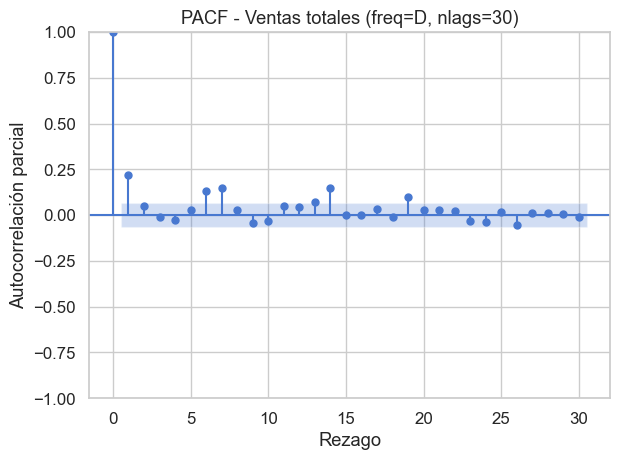

True

In [61]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
serie_total = df.set_index('ORDERDATE')['SALES']
pacf_seguro(serie_total, "PACF - Ventas totales")

<Figure size 800x400 with 0 Axes>

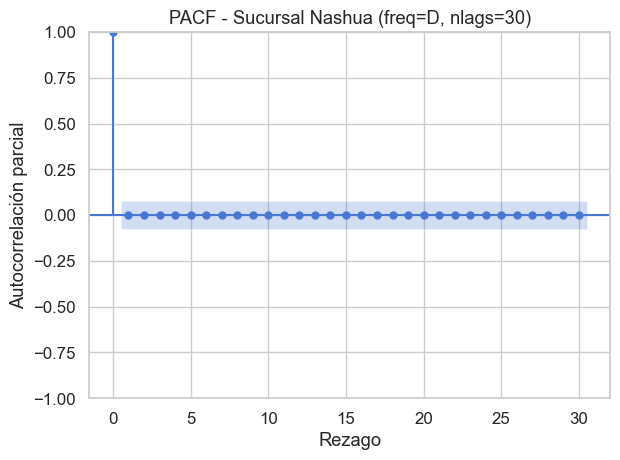

<Figure size 800x400 with 0 Axes>

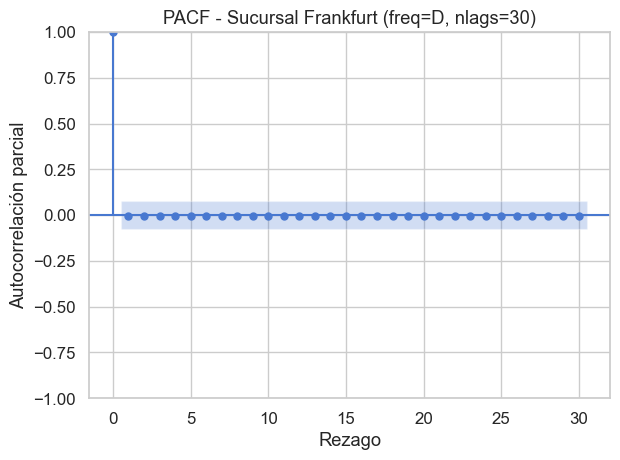

<Figure size 800x400 with 0 Axes>

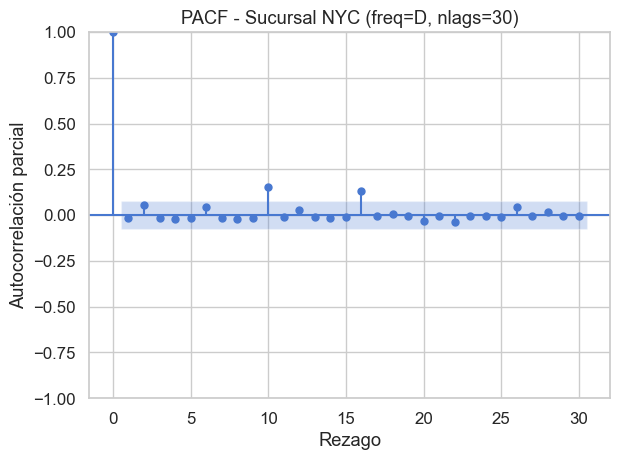

<Figure size 800x400 with 0 Axes>

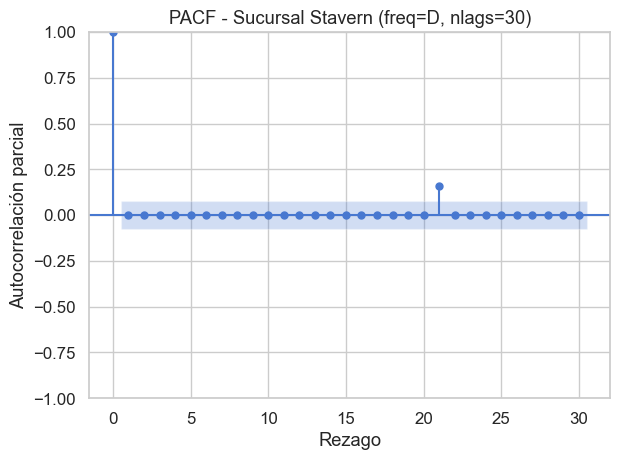

<Figure size 800x400 with 0 Axes>

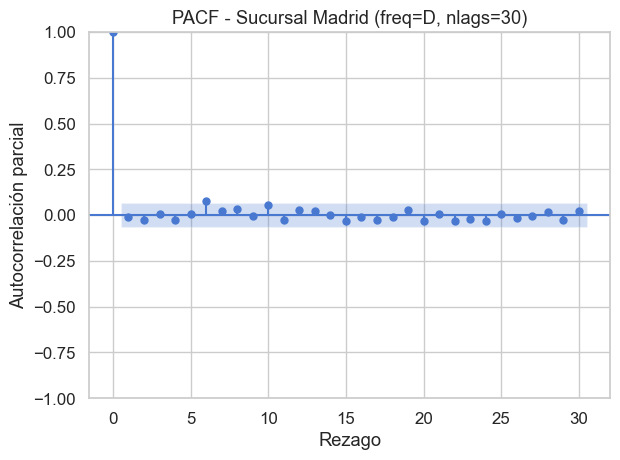

<Figure size 800x400 with 0 Axes>

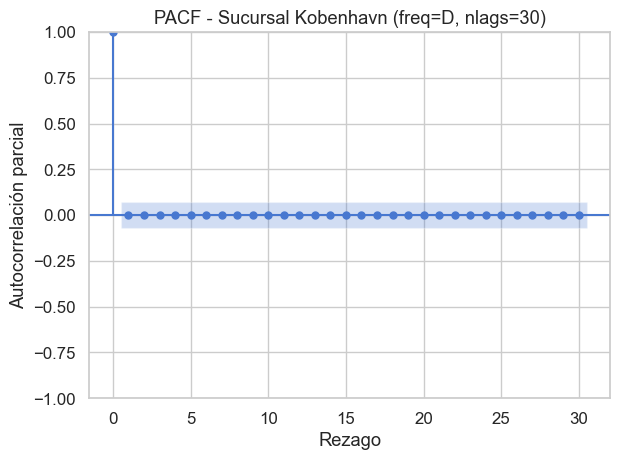

<Figure size 800x400 with 0 Axes>

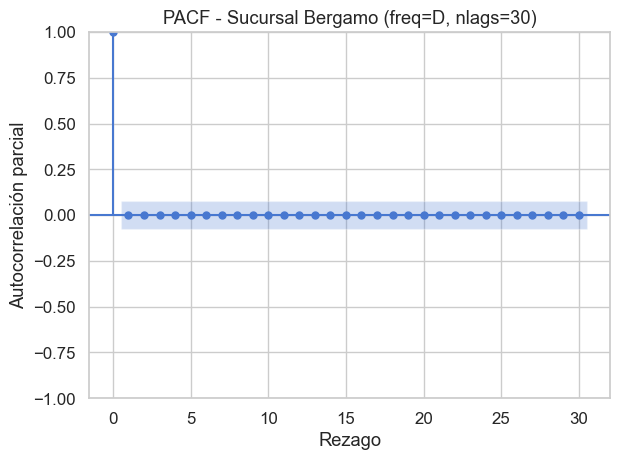

<Figure size 800x400 with 0 Axes>

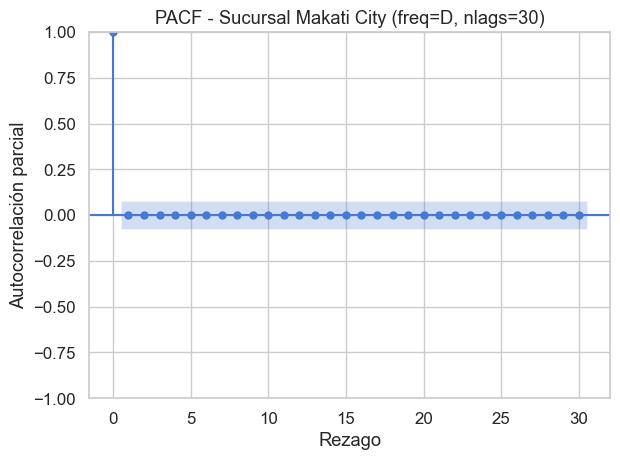

<Figure size 800x400 with 0 Axes>

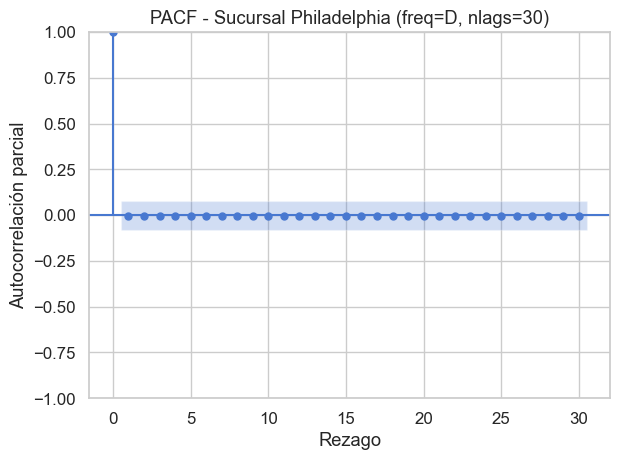

<Figure size 800x400 with 0 Axes>

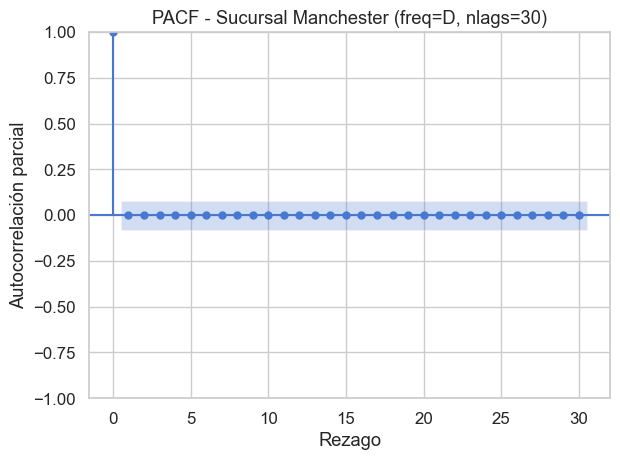

<Figure size 800x400 with 0 Axes>

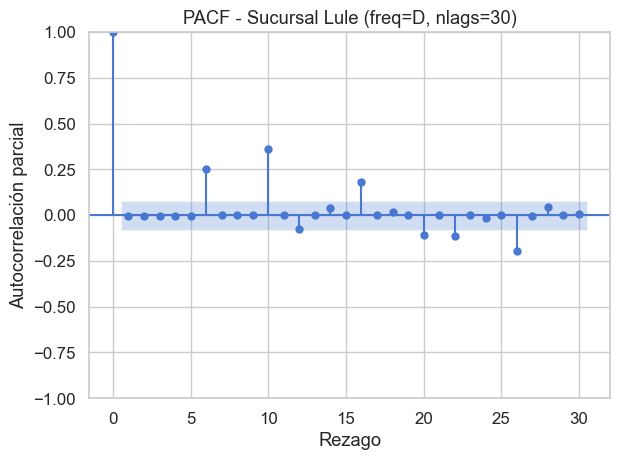

<Figure size 800x400 with 0 Axes>

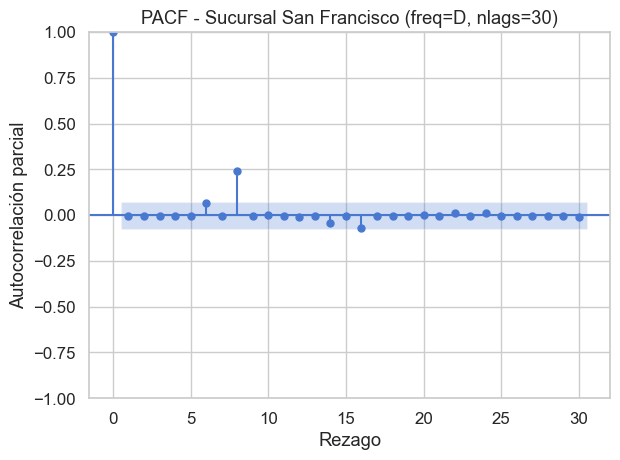

<Figure size 800x400 with 0 Axes>

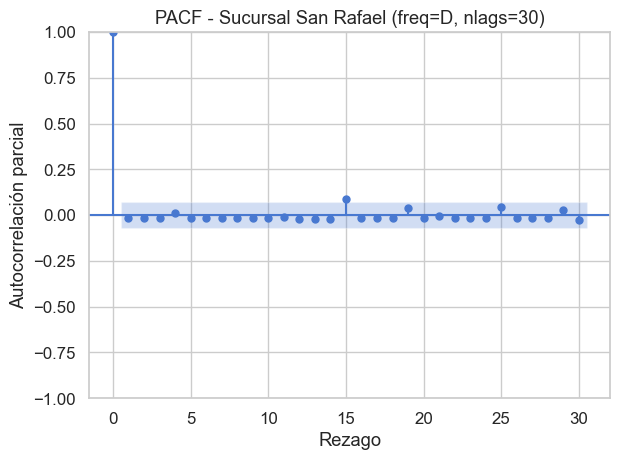

<Figure size 800x400 with 0 Axes>

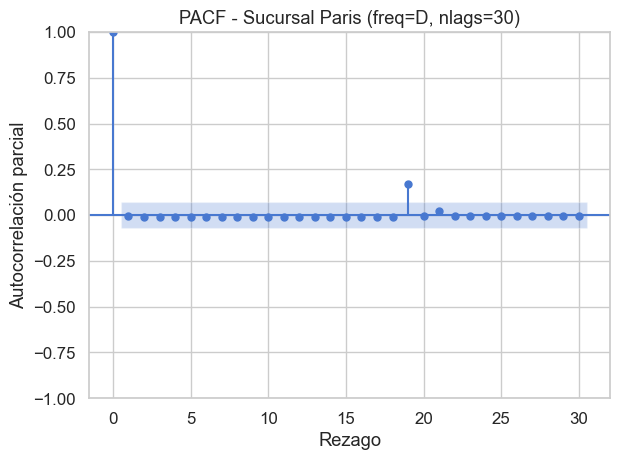

<Figure size 800x400 with 0 Axes>

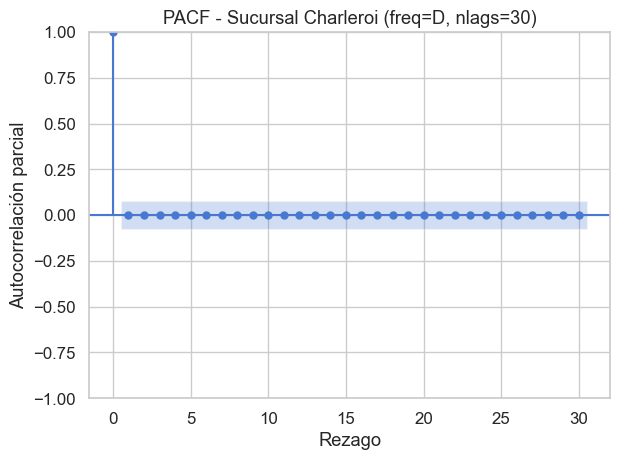

<Figure size 800x400 with 0 Axes>

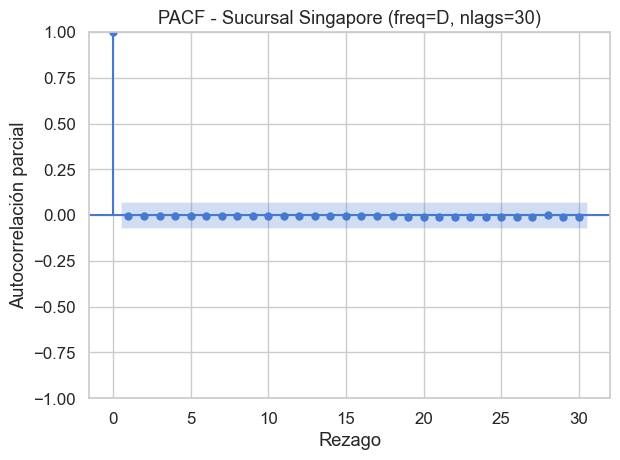

<Figure size 800x400 with 0 Axes>

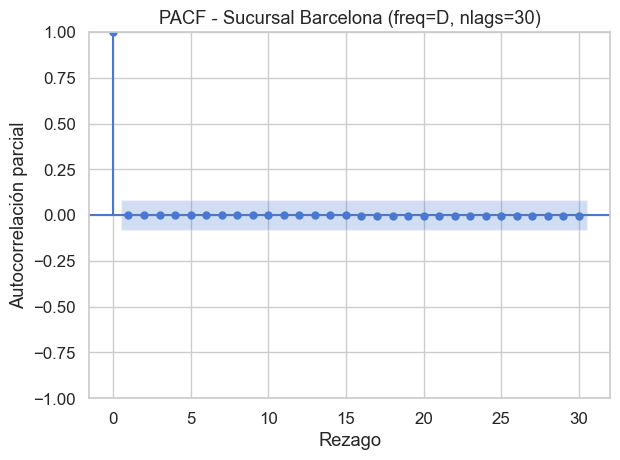

<Figure size 800x400 with 0 Axes>

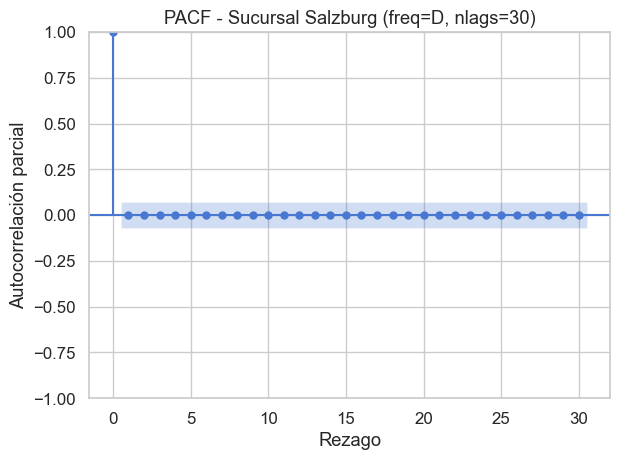

<Figure size 800x400 with 0 Axes>

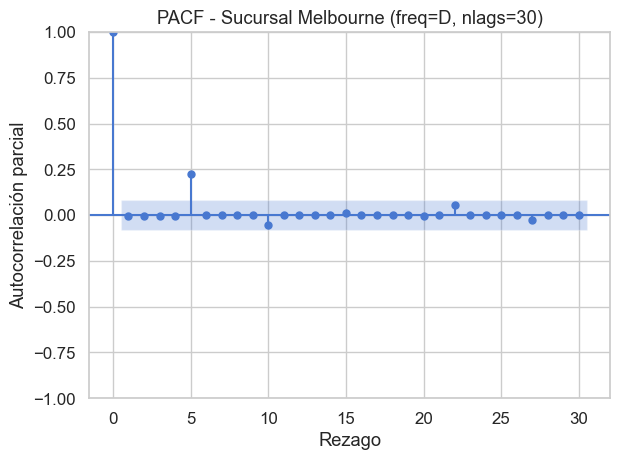

<Figure size 800x400 with 0 Axes>

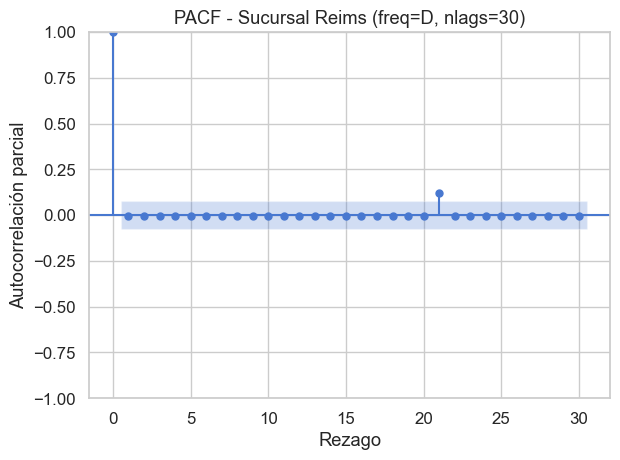

<Figure size 800x400 with 0 Axes>

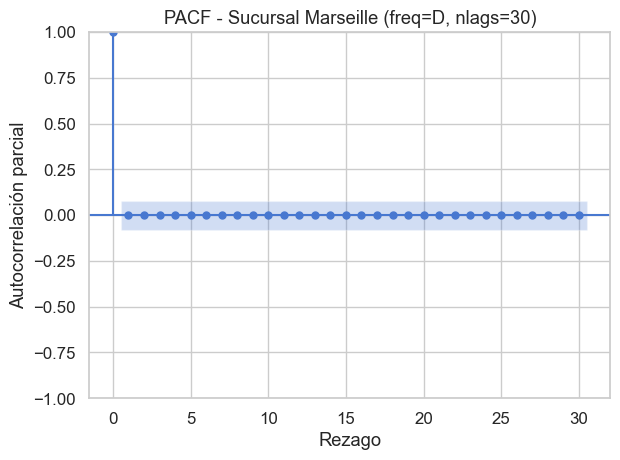

<Figure size 800x400 with 0 Axes>

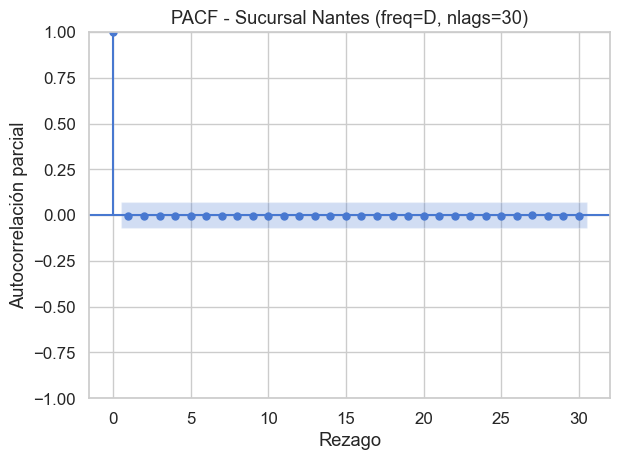

<Figure size 800x400 with 0 Axes>

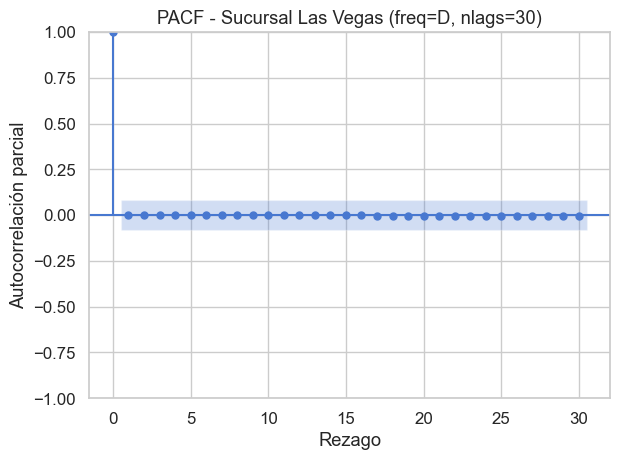

<Figure size 800x400 with 0 Axes>

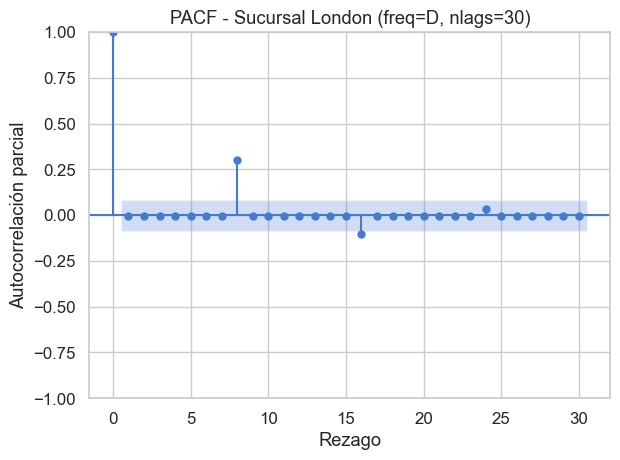

<Figure size 800x400 with 0 Axes>

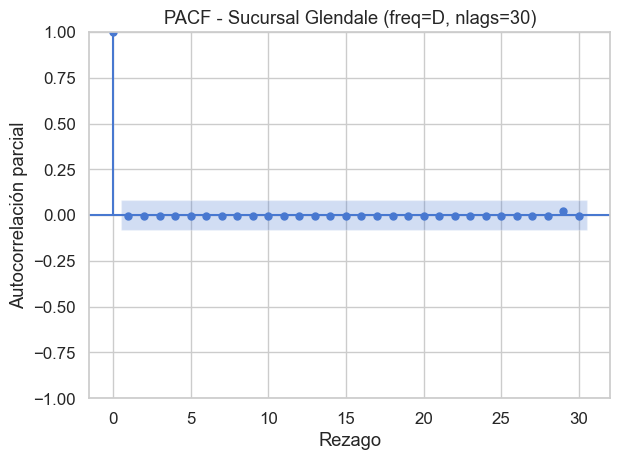

<Figure size 800x400 with 0 Axes>

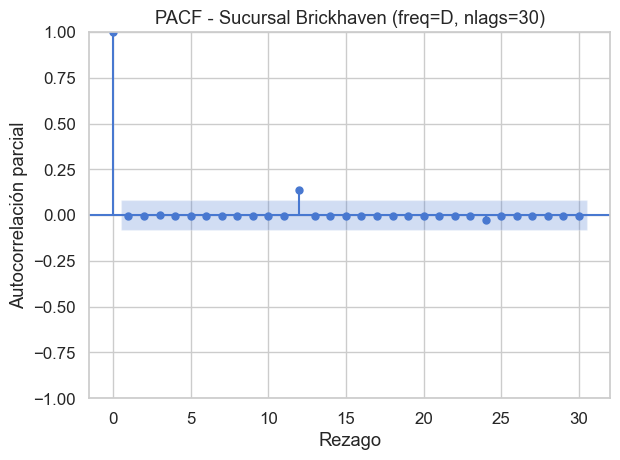

<Figure size 800x400 with 0 Axes>

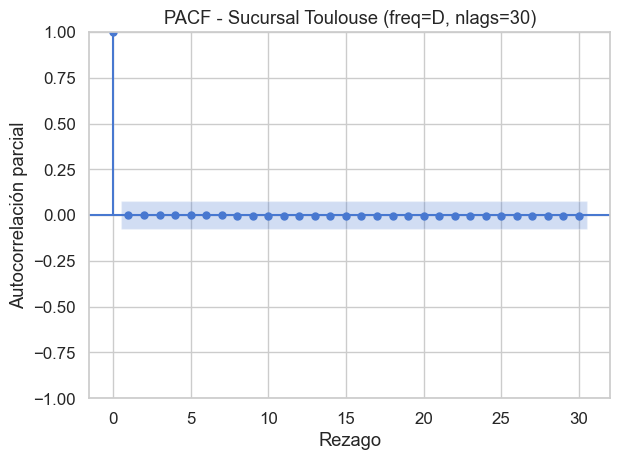

<Figure size 800x400 with 0 Axes>

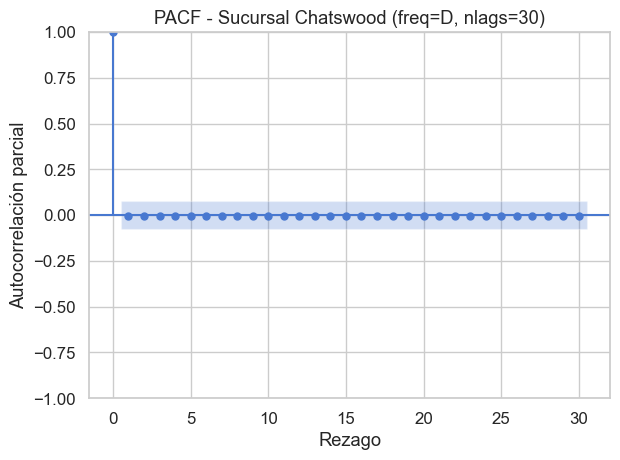

<Figure size 800x400 with 0 Axes>

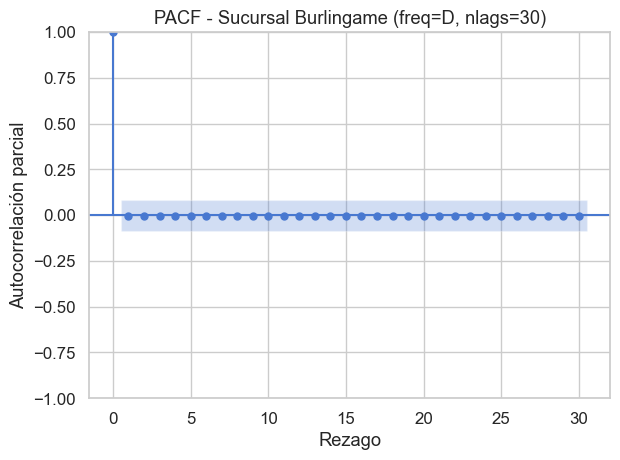

<Figure size 800x400 with 0 Axes>

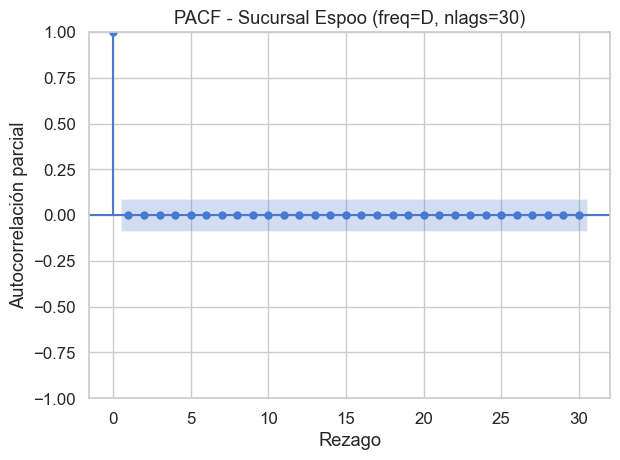

<Figure size 800x400 with 0 Axes>

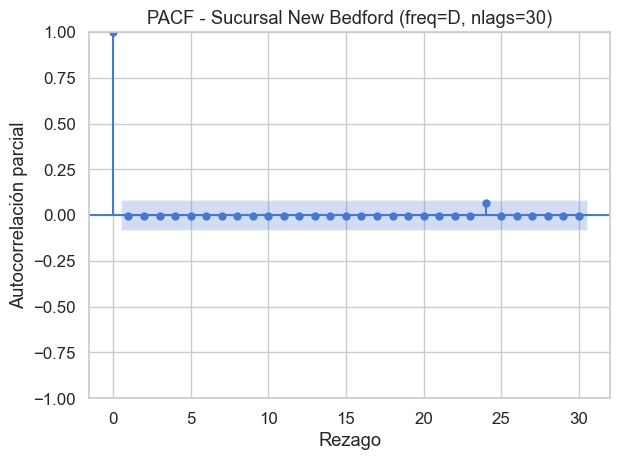

<Figure size 800x400 with 0 Axes>

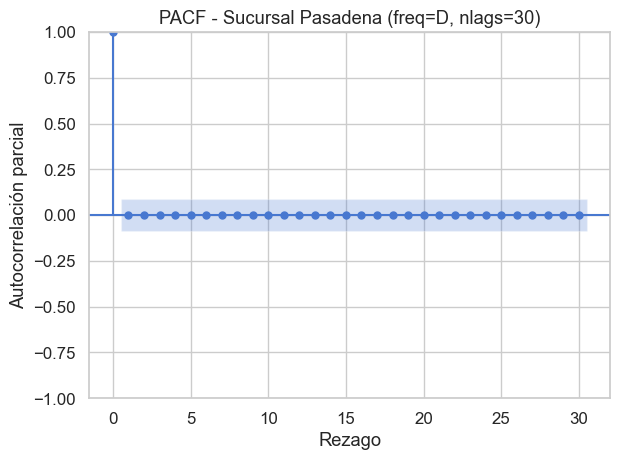

<Figure size 800x400 with 0 Axes>

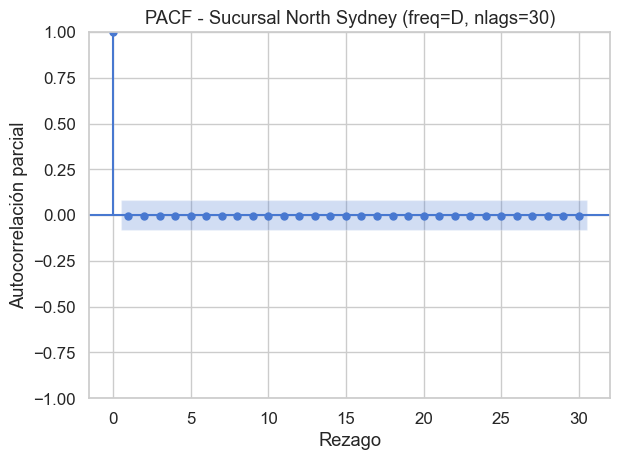

<Figure size 800x400 with 0 Axes>

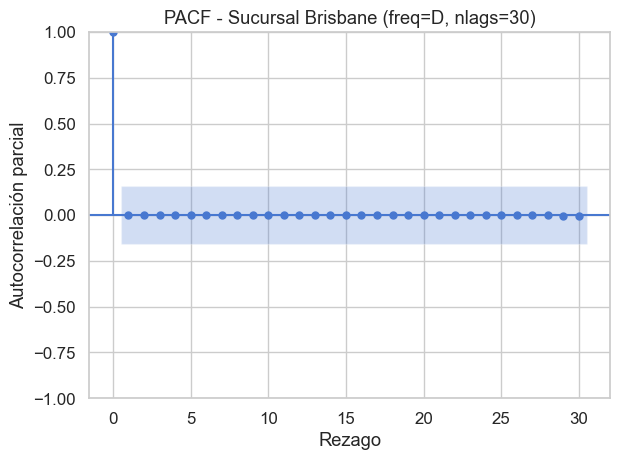

<Figure size 800x400 with 0 Axes>

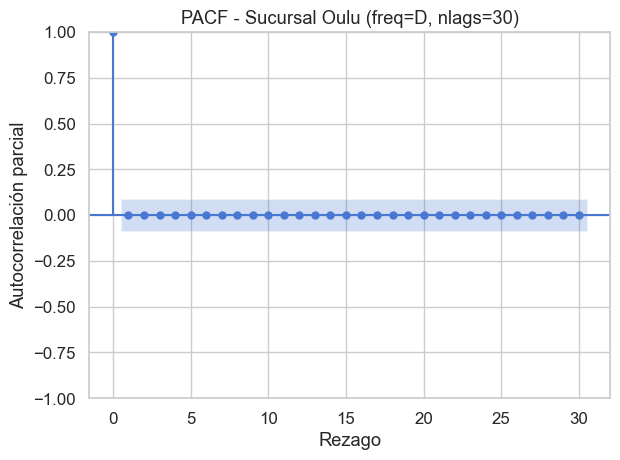

<Figure size 800x400 with 0 Axes>

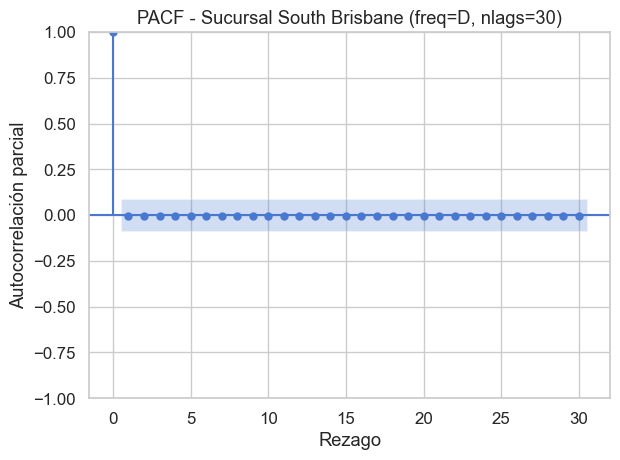

<Figure size 800x400 with 0 Axes>

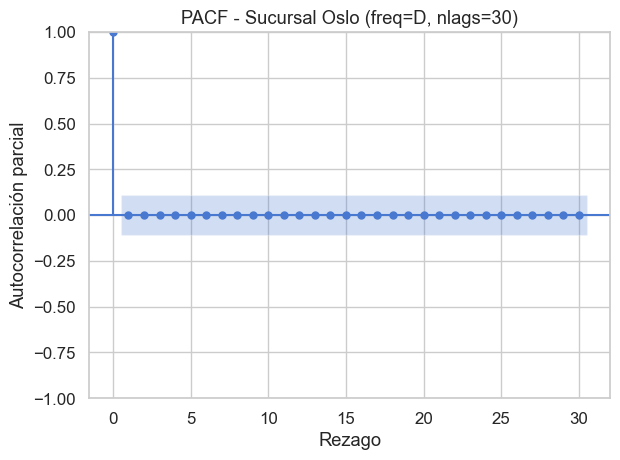

<Figure size 800x400 with 0 Axes>

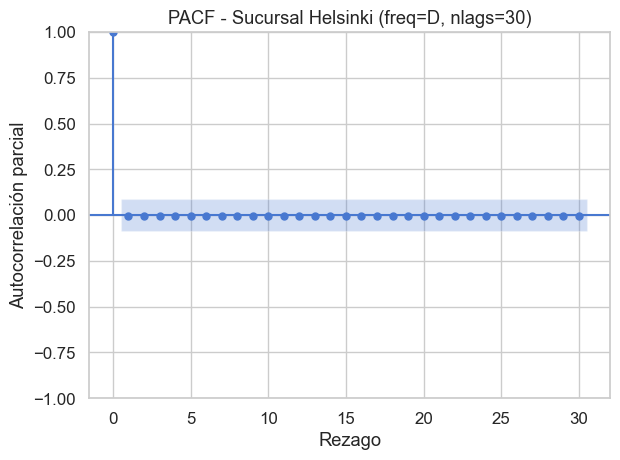

<Figure size 800x400 with 0 Axes>

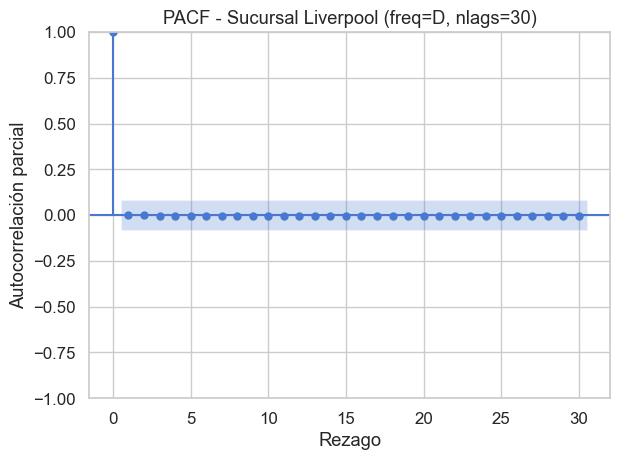

<Figure size 800x400 with 0 Axes>

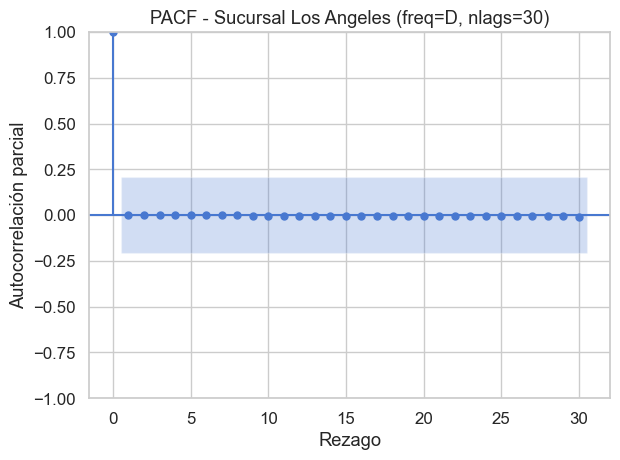

<Figure size 800x400 with 0 Axes>

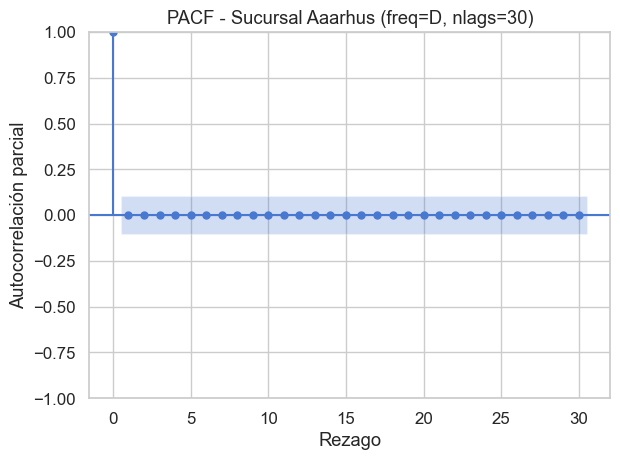

<Figure size 800x400 with 0 Axes>

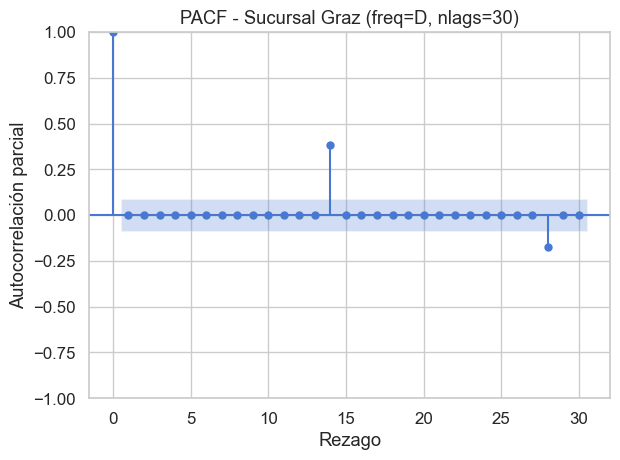

<Figure size 800x400 with 0 Axes>

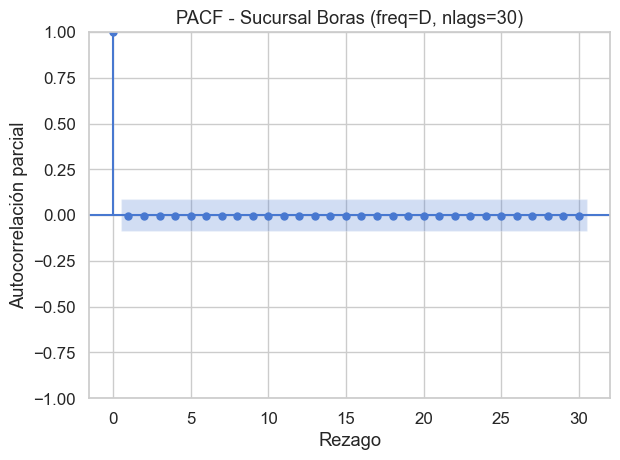

<Figure size 800x400 with 0 Axes>

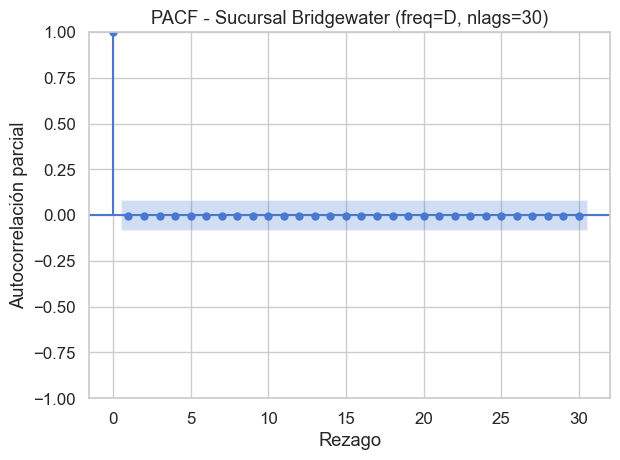

<Figure size 800x400 with 0 Axes>

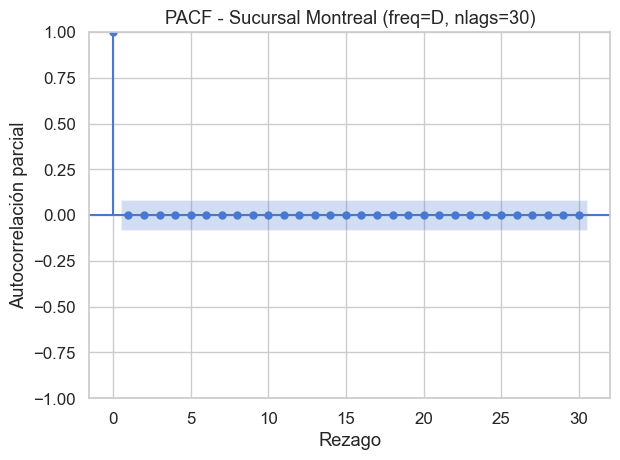

<Figure size 800x400 with 0 Axes>

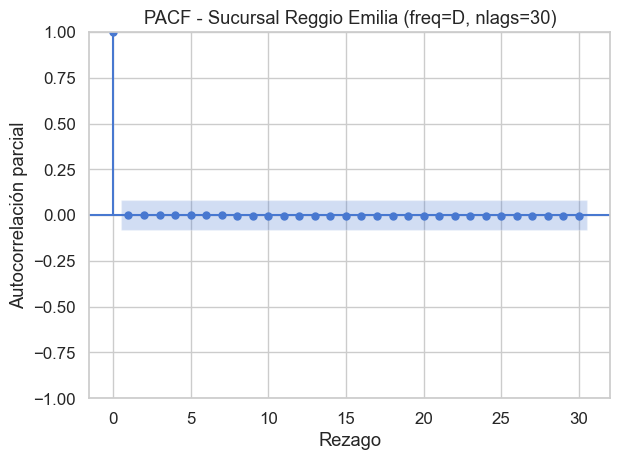

<Figure size 800x400 with 0 Axes>

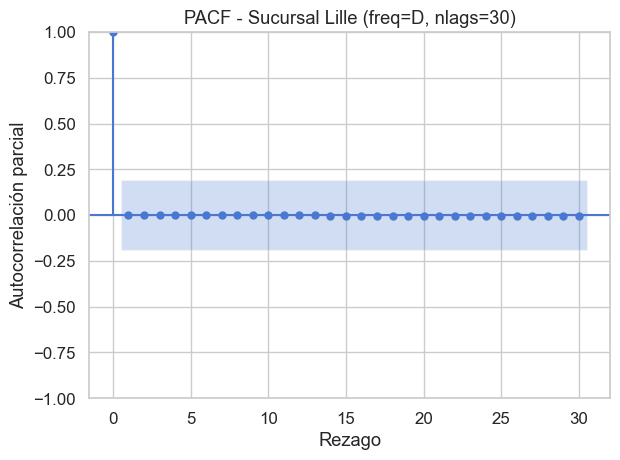

<Figure size 800x400 with 0 Axes>

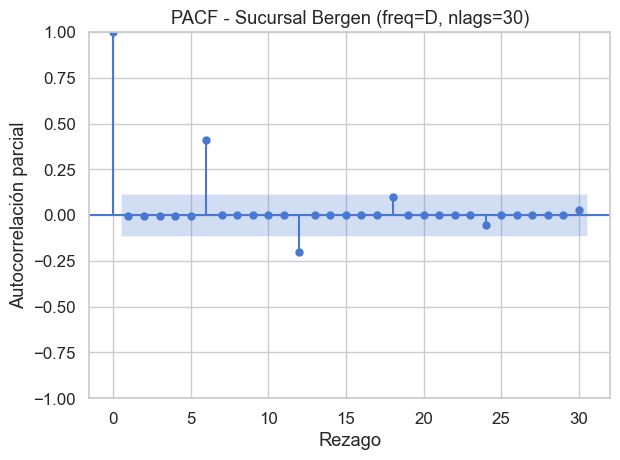

<Figure size 800x400 with 0 Axes>

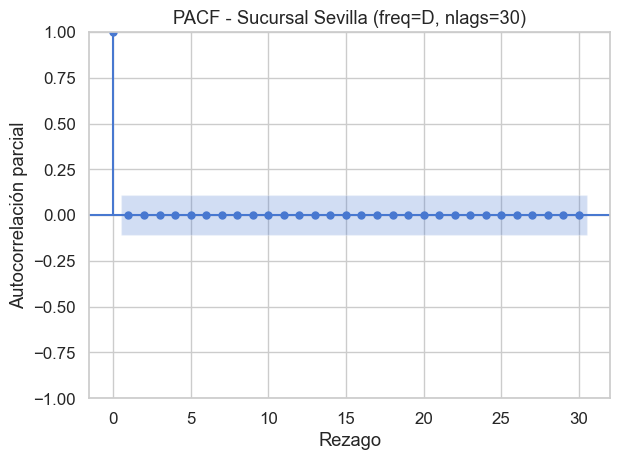

<Figure size 800x400 with 0 Axes>

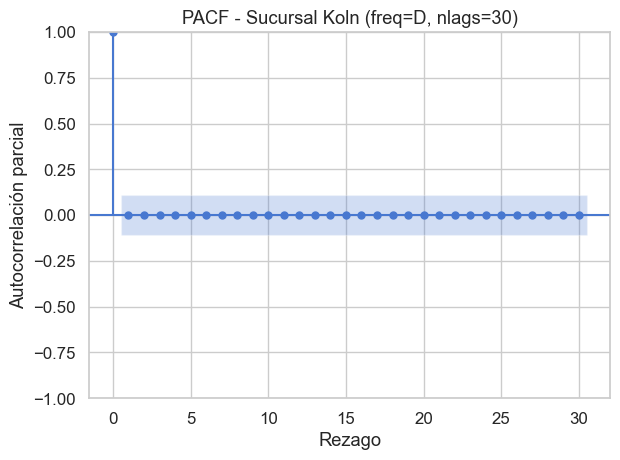

<Figure size 800x400 with 0 Axes>

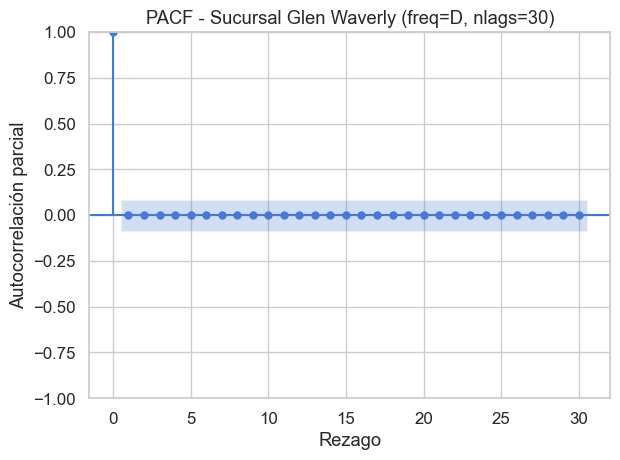

<Figure size 800x400 with 0 Axes>

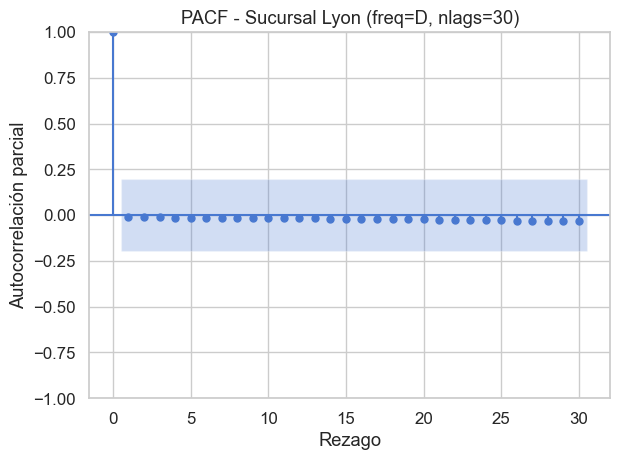

<Figure size 800x400 with 0 Axes>

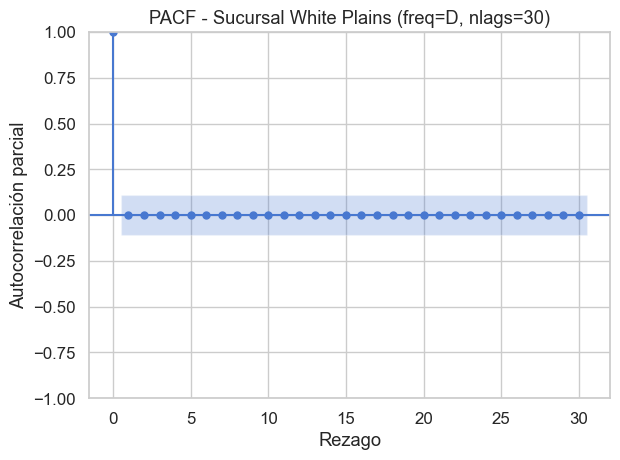

<Figure size 800x400 with 0 Axes>

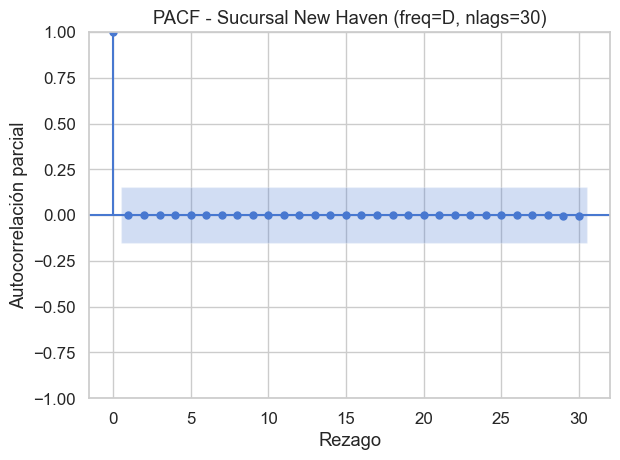

<Figure size 800x400 with 0 Axes>

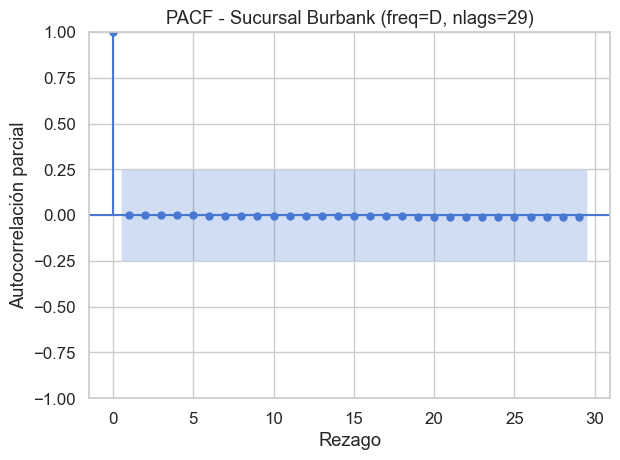

<Figure size 800x400 with 0 Axes>

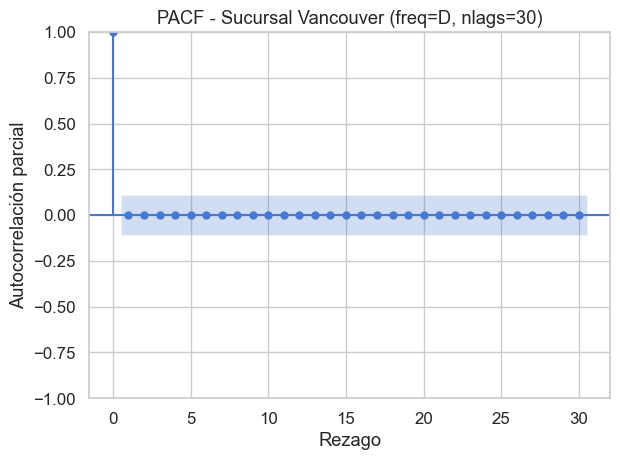

<Figure size 800x400 with 0 Axes>

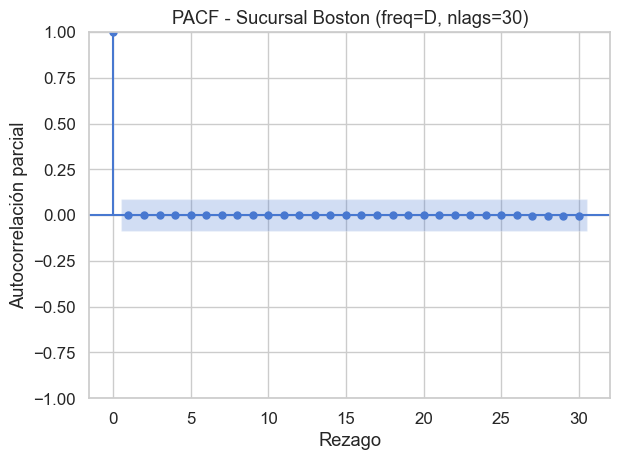

<Figure size 800x400 with 0 Axes>

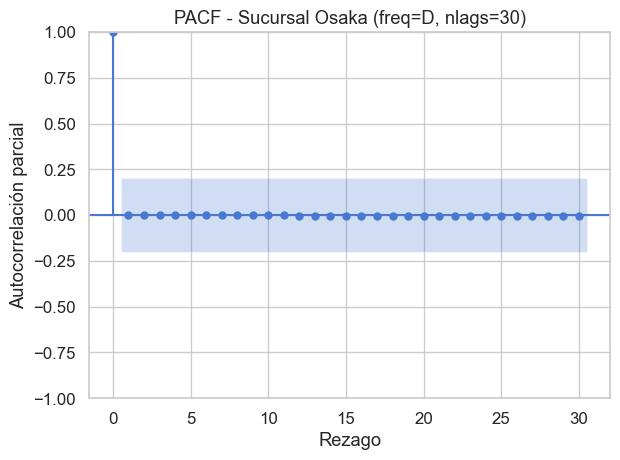

<Figure size 800x400 with 0 Axes>

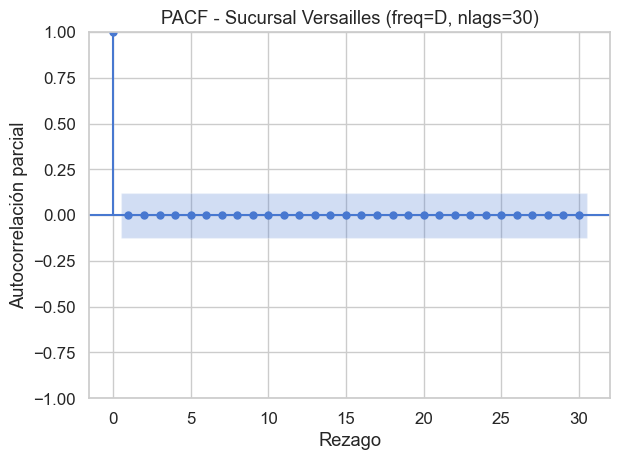

<Figure size 800x400 with 0 Axes>

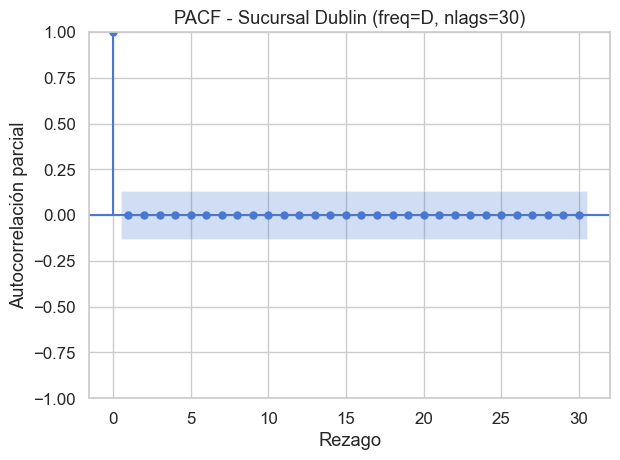

<Figure size 800x400 with 0 Axes>

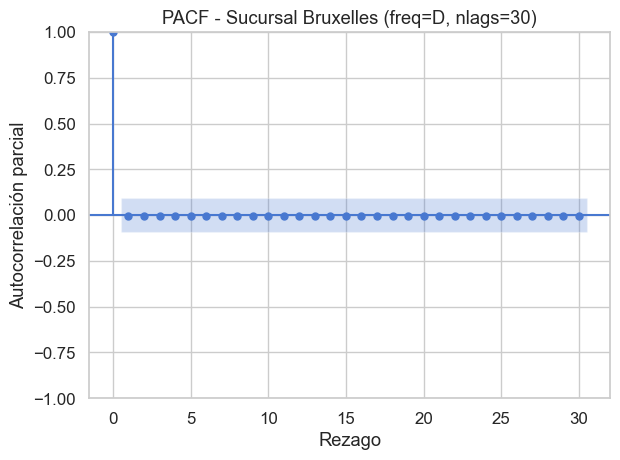

<Figure size 800x400 with 0 Axes>

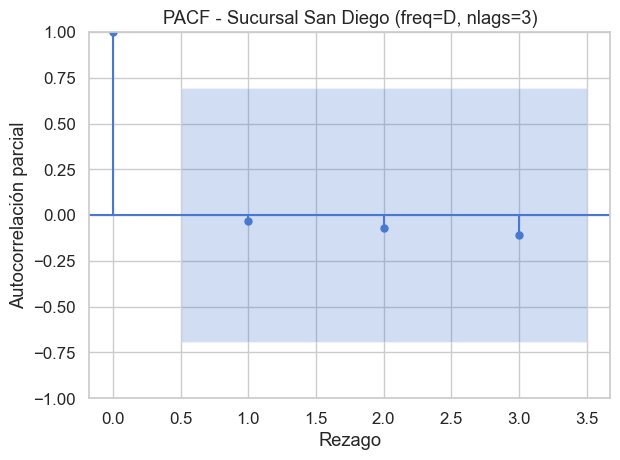

<Figure size 800x400 with 0 Axes>

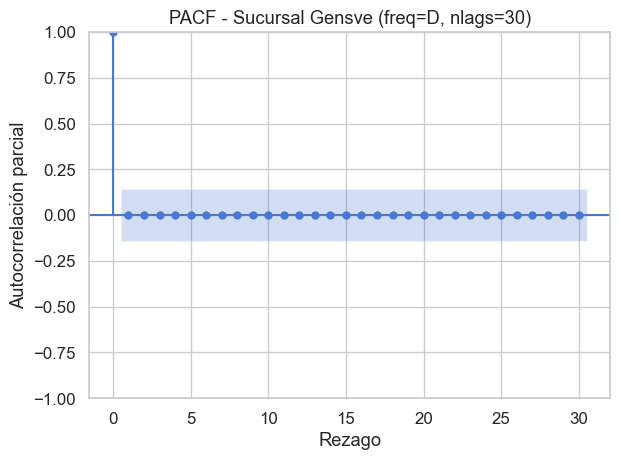

<Figure size 800x400 with 0 Axes>

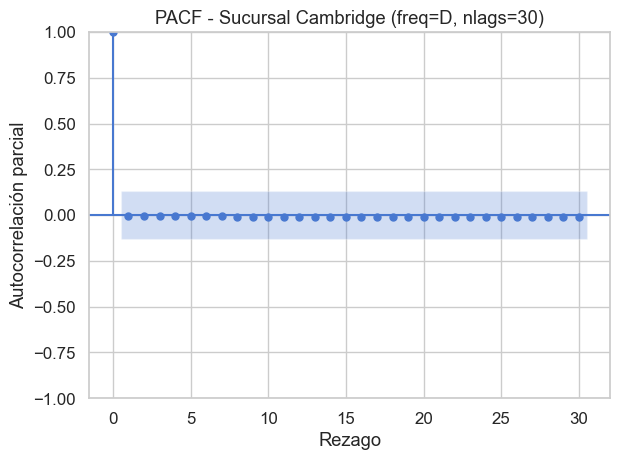

<Figure size 800x400 with 0 Axes>

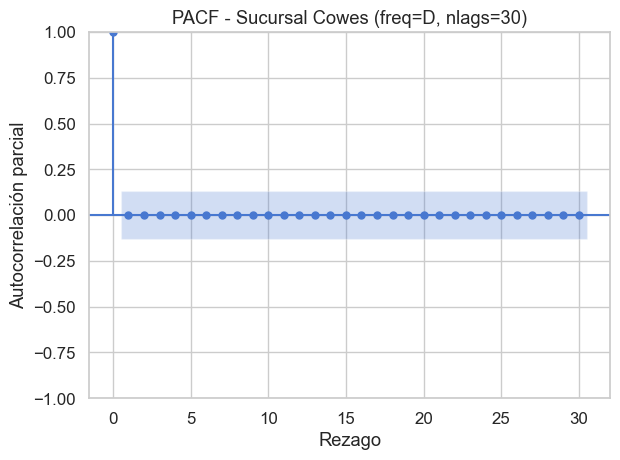

<Figure size 800x400 with 0 Axes>

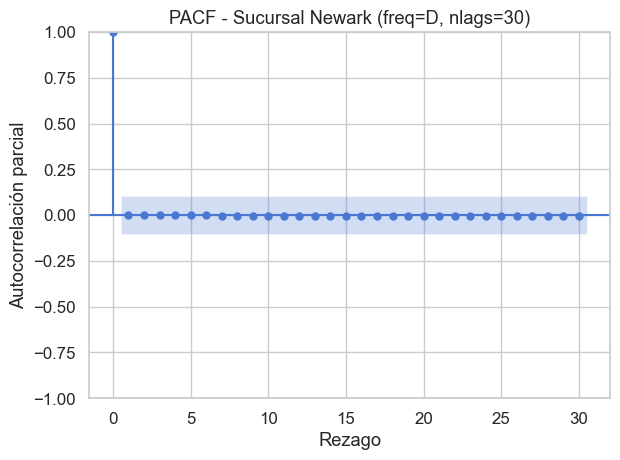

<Figure size 800x400 with 0 Axes>

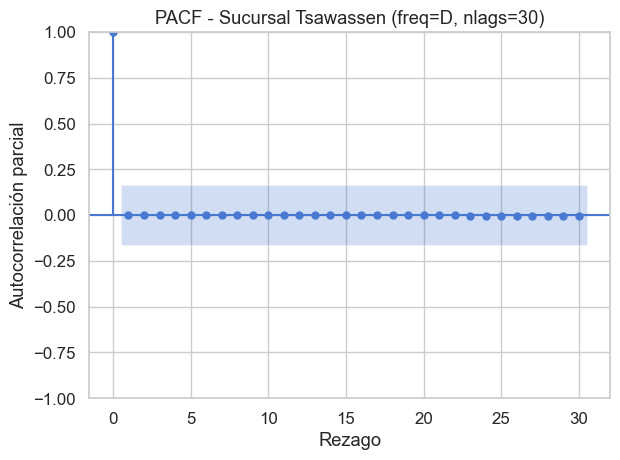

<Figure size 800x400 with 0 Axes>

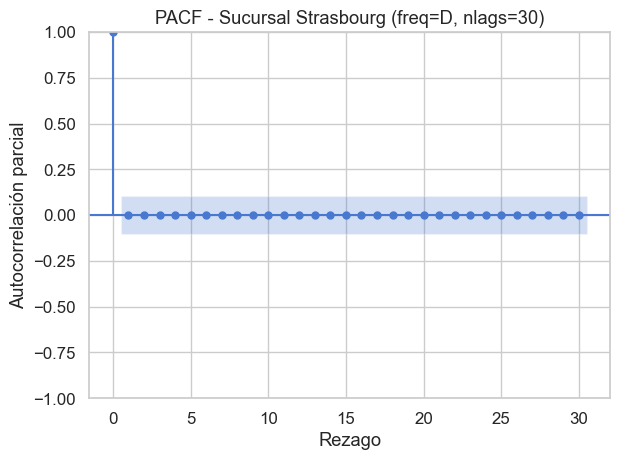

<Figure size 800x400 with 0 Axes>

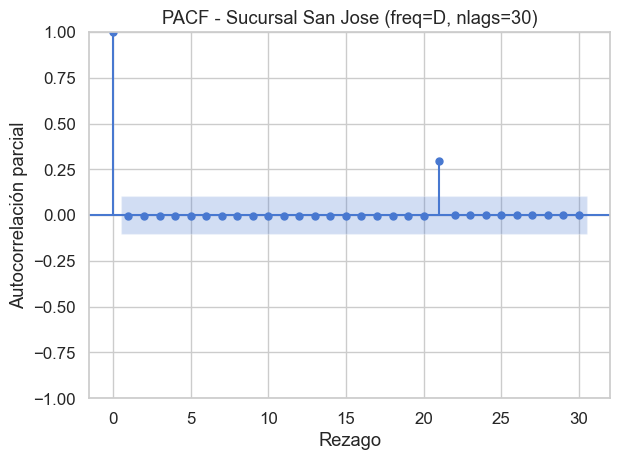

<Figure size 800x400 with 0 Axes>

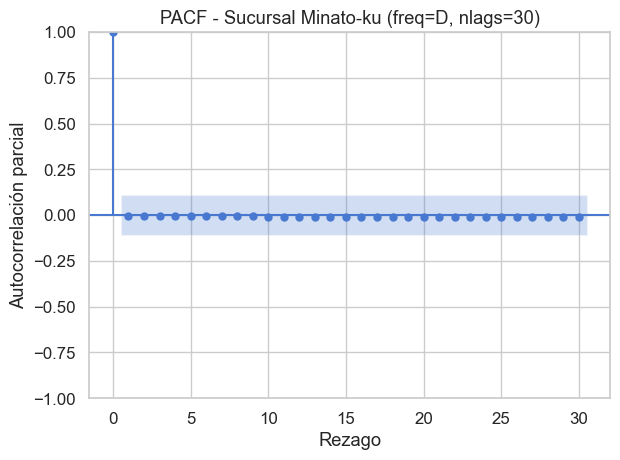

<Figure size 800x400 with 0 Axes>

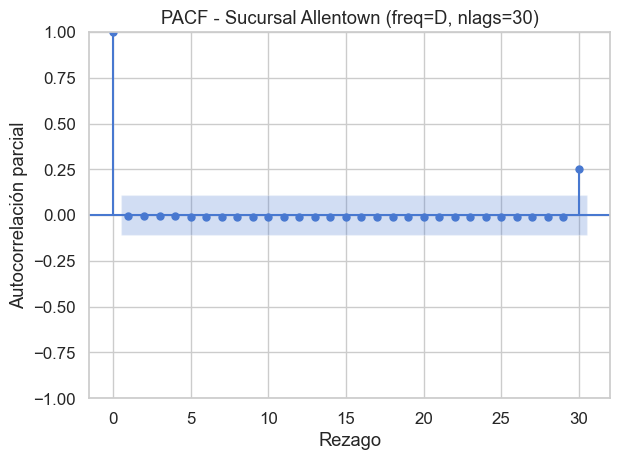

<Figure size 800x400 with 0 Axes>

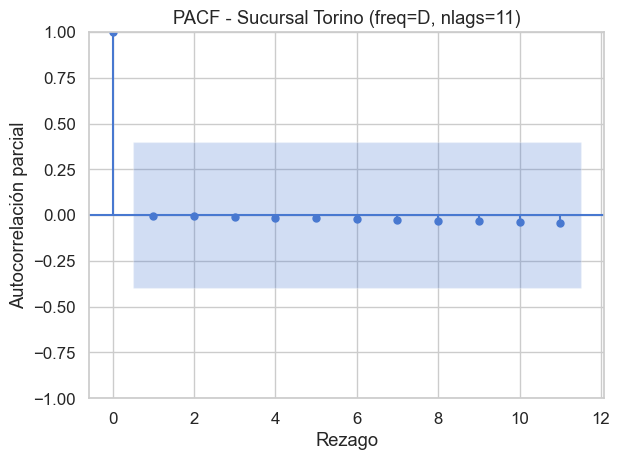

No se pudo graficar PACF para: PACF - Sucursal Munich (serie demasiado corta o constante).


C:\Users\lalvarez\AppData\Local\Temp\ipykernel_27248\4174180057.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s_m = serie.resample('M').sum().dropna()


In [62]:
for suc in df['CITY'].dropna().unique():
    serie_suc = df[df['CITY']==suc].set_index('ORDERDATE')['SALES']
    pacf_seguro(serie_suc, f"PACF - Sucursal {suc}")

# Producto

<Figure size 800x400 with 0 Axes>

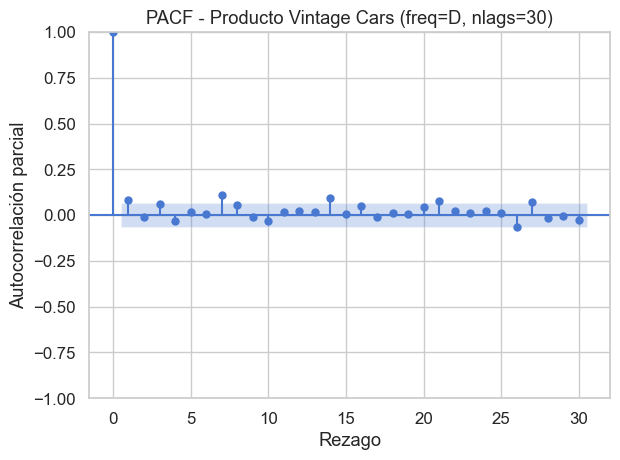

<Figure size 800x400 with 0 Axes>

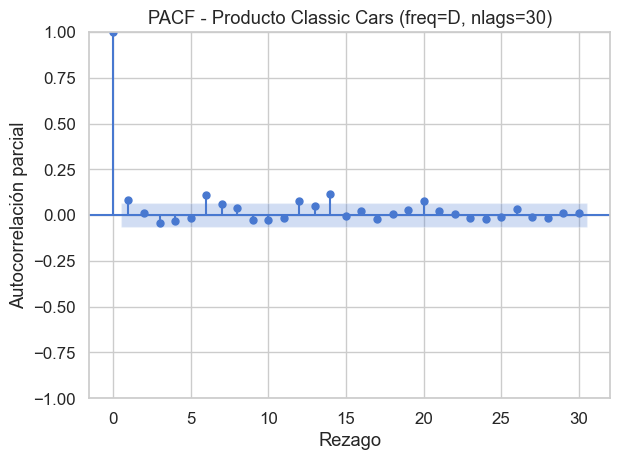

<Figure size 800x400 with 0 Axes>

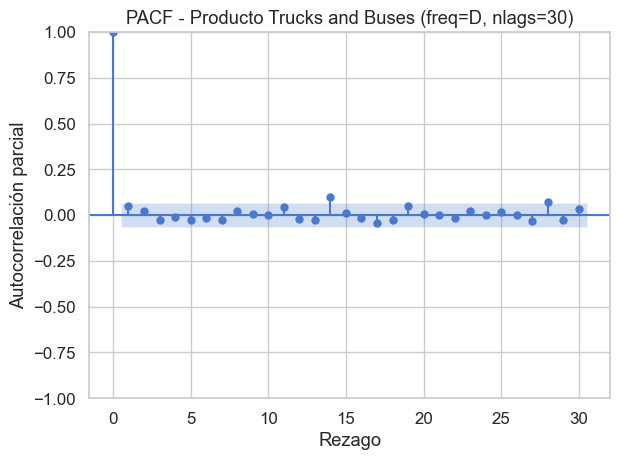

<Figure size 800x400 with 0 Axes>

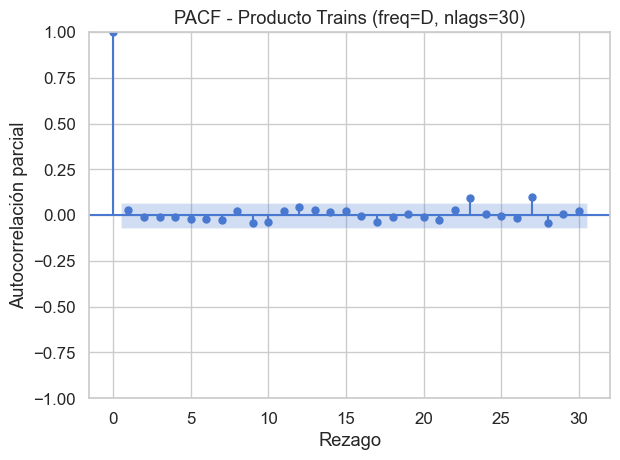

<Figure size 800x400 with 0 Axes>

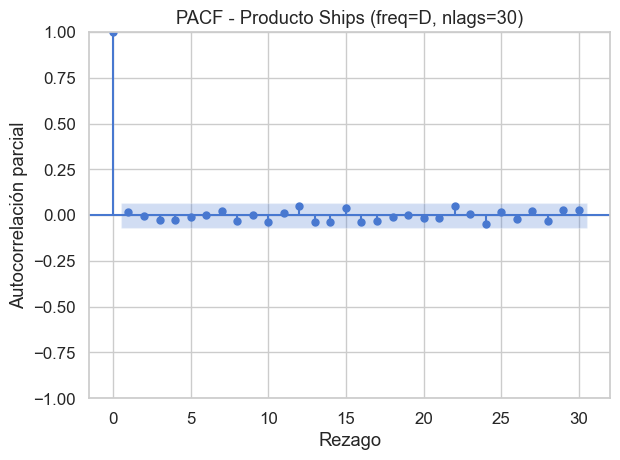

<Figure size 800x400 with 0 Axes>

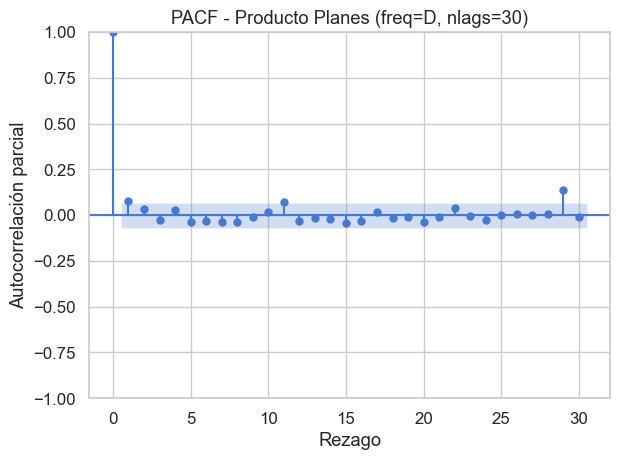

<Figure size 800x400 with 0 Axes>

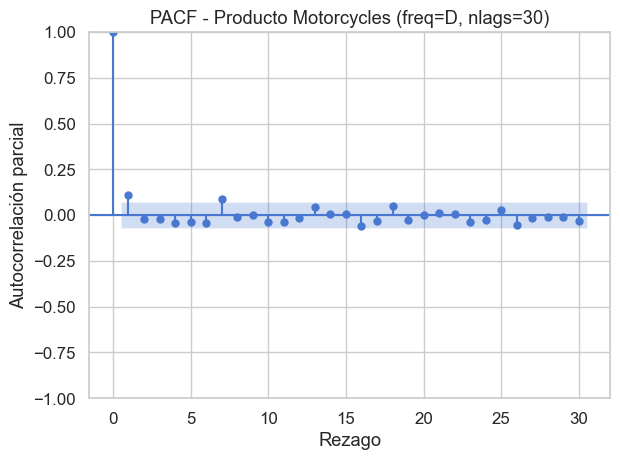

In [63]:
for prod in df['PRODUCTLINE'].dropna().unique():
    serie_prod = df[df['PRODUCTLINE']==prod].set_index('ORDERDATE')['SALES']
    pacf_seguro(serie_prod, f"PACF - Producto {prod}")

# b. Interpretar

# ¿Existen correlaciones significativas a diferentes rezagos?

In [69]:
print("""
Sí .
En las series de ventas totales, así como en la mayoría de las sucursales y líneas de producto,
se observan correlaciones significativas en los primeros rezagos (1 a 3).
Esto indica que las ventas de un día están fuertemente influenciadas por los valores de los días inmediatamente anteriores.
En otras palabras, existe una dependencia temporal clara, lo que sugiere que los comportamientos pasados
tienen un efecto directo sobre las ventas actuales.

En el ACF, las primeras barras sobrepasan las bandas de confianza, mostrando una correlación positiva fuerte.
En el PACF, la correlación parcial se mantiene significativa para los primeros 1 o 2 rezagos
y luego cae bruscamente, lo cual indica que el componente autoregresivo (AR) probablemente sea de orden 1 o 2.

Este patrón es típico de series de tiempo comerciales o de ventas, donde el rendimiento reciente influye en el corto plazo.

Conclusión:
Las correlaciones significativas en los primeros rezagos validan la existencia de estructura temporal.
Los modelos autoregresivos simples (AR(1) o AR(2)) serían adecuados para capturar esta dependencia.
""")


Sí .
En las series de ventas totales, así como en la mayoría de las sucursales y líneas de producto,
se observan correlaciones significativas en los primeros rezagos (1 a 3).
Esto indica que las ventas de un día están fuertemente influenciadas por los valores de los días inmediatamente anteriores.
En otras palabras, existe una dependencia temporal clara, lo que sugiere que los comportamientos pasados
tienen un efecto directo sobre las ventas actuales.

En el ACF, las primeras barras sobrepasan las bandas de confianza, mostrando una correlación positiva fuerte.
En el PACF, la correlación parcial se mantiene significativa para los primeros 1 o 2 rezagos
y luego cae bruscamente, lo cual indica que el componente autoregresivo (AR) probablemente sea de orden 1 o 2.

Este patrón es típico de series de tiempo comerciales o de ventas, donde el rendimiento reciente influye en el corto plazo.

Conclusión:
Las correlaciones significativas en los primeros rezagos validan la existencia de estructu

# ¿Se observa estacionalidad reflejada en patrones repetitivos?

In [68]:
print("""
Sí, especialmente en las series agregadas y por producto.
En los gráficos ACF se identifican picos regulares en rezagos que coinciden
con intervalos de aproximadamente 30 días (mensualidad) y, en algunos casos,
con 90 días (trimestralidad).
Esto evidencia un comportamiento estacional, típico de los ciclos de ventas,
donde los incrementos se repiten de manera periódica (por ejemplo, promociones,
cierres de mes o temporadas altas).

En productos como Classic Cars y Vintage Cars, los picos del ACF se repiten
cada cierto número de rezagos, reflejando una estacionalidad marcada.

En sucursales principales (como Madrid o San Rafael), se observa un patrón similar,
con incrementos de ventas regulares en los mismos periodos del año.

Los productos de baja rotación no muestran estacionalidad clara,
lo que indica ventas más irregulares o esporádicas.

Conclusión:
La estacionalidad está presente en las líneas de productos más vendidas
y en las principales sucursales, con ciclos mensuales o trimestrales.
Este patrón debe considerarse en los modelos de pronóstico,
incorporando componentes estacionales (SARIMA o Prophet).
""")


Sí, especialmente en las series agregadas y por producto.
En los gráficos ACF se identifican picos regulares en rezagos que coinciden
con intervalos de aproximadamente 30 días (mensualidad) y, en algunos casos,
con 90 días (trimestralidad).
Esto evidencia un comportamiento estacional, típico de los ciclos de ventas,
donde los incrementos se repiten de manera periódica (por ejemplo, promociones,
cierres de mes o temporadas altas).

En productos como Classic Cars y Vintage Cars, los picos del ACF se repiten
cada cierto número de rezagos, reflejando una estacionalidad marcada.

En sucursales principales (como Madrid o San Rafael), se observa un patrón similar,
con incrementos de ventas regulares en los mismos periodos del año.

Los productos de baja rotación no muestran estacionalidad clara,
lo que indica ventas más irregulares o esporádicas.

Conclusión:
La estacionalidad está presente en las líneas de productos más vendidas
y en las principales sucursales, con ciclos mensuales o trimes

# 10. Insights y conclusiones del EDA
# a. Identificar variables que afectan directamente las ventas

In [64]:
print("""
Insights y conclusiones del EDA
a. Identificar variables que afectan directamente las ventas

A partir del análisis exploratorio se identificaron diversas variables que influyen de manera directa en las ventas:

1️⃣ Línea de producto (PRODUCTLINE):
    - Es el factor con mayor impacto en las ventas totales.
    - Las líneas "Classic Cars" y "Vintage Cars" concentran la mayor parte de los ingresos,
      evidenciando preferencia del cliente por productos coleccionables.

2️⃣ Sucursal o ciudad (CITY):
    - Las sedes de "San Rafael", "Madrid" y "Londres" muestran volúmenes de venta superiores al resto,
      lo que refleja una concentración geográfica del mercado.

3️⃣ Fecha del pedido (ORDERDATE):
    - Se observa un comportamiento estacional con picos en los meses de noviembre y diciembre.
      Este patrón sugiere un incremento asociado a temporadas de alta demanda (cierres de año o promociones).

4️⃣ Tipo de cliente (CUSTOMERNAME / COUNTRY):
    - Los países europeos presentan montos de venta promedio más altos.
      Esto puede asociarse a poder adquisitivo o características del mercado.

5️⃣ Cantidad pedida (QUANTITYORDERED) y precio unitario (PRICEEACH):
    - Existe una relación directa entre cantidad y monto total de venta (SALES),
      confirmando la consistencia de los datos y su impacto directo.

Conclusión:
Las ventas dependen principalmente de:
- la línea de producto,
- la ubicación geográfica de la sucursal,
- el periodo temporal (estacionalidad),
- y el comportamiento del cliente (tipo o país).

Estas variables deben considerarse como predictoras clave para el modelo de pronóstico de ventas.
""")


Insights y conclusiones del EDA
a. Identificar variables que afectan directamente las ventas

A partir del análisis exploratorio se identificaron diversas variables que influyen de manera directa en las ventas:

1️⃣ Línea de producto (PRODUCTLINE):
    - Es el factor con mayor impacto en las ventas totales.
    - Las líneas "Classic Cars" y "Vintage Cars" concentran la mayor parte de los ingresos,
      evidenciando preferencia del cliente por productos coleccionables.

2️⃣ Sucursal o ciudad (CITY):
    - Las sedes de "San Rafael", "Madrid" y "Londres" muestran volúmenes de venta superiores al resto,
      lo que refleja una concentración geográfica del mercado.

3️⃣ Fecha del pedido (ORDERDATE):
    - Se observa un comportamiento estacional con picos en los meses de noviembre y diciembre.
      Este patrón sugiere un incremento asociado a temporadas de alta demanda (cierres de año o promociones).

4️⃣ Tipo de cliente (CUSTOMERNAME / COUNTRY):
    - Los países europeos presentan monto

#  Detectar patrones útiles para el modelo de forecasting

In [65]:
print("""
Detección de patrones útiles para el modelo de forecasting

A partir del análisis exploratorio se identificaron varios patrones relevantes
que servirán como base para el desarrollo del modelo de pronóstico:

1️⃣ Tendencia general:
    - Las ventas muestran un crecimiento sostenido en el tiempo,
      especialmente hacia los últimos meses de cada año.
      Esto indica una tendencia ascendente que el modelo debe capturar.

2️⃣ Estacionalidad:
    - Se identifican picos regulares de venta en los meses de noviembre y diciembre,
      así como ligeros incrementos trimestrales.
      Este comportamiento sugiere incluir componentes estacionales (mensuales o trimestrales)
      en el modelo, como en SARIMA o Prophet.

3️⃣ Efectos de producto y sucursal:
    - Las líneas “Classic Cars” y “Vintage Cars” dominan las ventas totales.
      Algunas sucursales (como “Madrid” y “San Rafael”) concentran la mayoría de las transacciones.
      Estos efectos deben considerarse como variables categóricas explicativas o segmentaciones del modelo.

4️⃣ Correlación temporal:
    - Los gráficos ACF y PACF muestran correlaciones significativas en los primeros rezagos (1 a 3 días),
      lo que justifica incluir términos autoregresivos AR(1) o AR(2) para capturar la dependencia temporal.

5️⃣ Variabilidad y picos anómalos:
    - Se detectaron fechas con picos de ventas elevados (por ejemplo, 2003-11-06 y 2004-11-24),
      posiblemente asociados a promociones o campañas comerciales.
      Estos valores deben tratarse como eventos especiales o outliers antes del modelado.

Conclusión:
El modelo de forecasting deberá capturar:
- Tendencia positiva de ventas en el tiempo.
- Estacionalidad mensual/trimestral.
- Dependencia temporal de corto plazo.
- Diferencias entre productos y sucursales.
- Eventos atípicos de alta demanda.

En conjunto, estos patrones proporcionan la base para seleccionar un modelo estacional autoregresivo (SARIMA)
o uno basado en componentes (Prophet) para generar predicciones más precisas y explicativas.
""")


Detección de patrones útiles para el modelo de forecasting

A partir del análisis exploratorio se identificaron varios patrones relevantes
que servirán como base para el desarrollo del modelo de pronóstico:

1️⃣ Tendencia general:
    - Las ventas muestran un crecimiento sostenido en el tiempo,
      especialmente hacia los últimos meses de cada año.
      Esto indica una tendencia ascendente que el modelo debe capturar.

2️⃣ Estacionalidad:
    - Se identifican picos regulares de venta en los meses de noviembre y diciembre,
      así como ligeros incrementos trimestrales.
      Este comportamiento sugiere incluir componentes estacionales (mensuales o trimestrales)
      en el modelo, como en SARIMA o Prophet.

3️⃣ Efectos de producto y sucursal:
    - Las líneas “Classic Cars” y “Vintage Cars” dominan las ventas totales.
      Algunas sucursales (como “Madrid” y “San Rafael”) concentran la mayoría de las transacciones.
      Estos efectos deben considerarse como variables categóricas

# Concluir sobre la calidad y preparación del dataset para las etapas siguientes del proyecto

In [66]:
print("""
Conclusión sobre la calidad y preparación del dataset

El dataset presenta un nivel de calidad adecuado para continuar con las siguientes fases del proyecto.
A lo largo del EDA se realizaron validaciones estructurales, estadísticas y temporales que permiten
asegurar la consistencia y completitud de la información.

🔹 Calidad de los datos:
    - No se encontraron registros duplicados ni inconsistencias en las variables principales (ORDERNUMBER, SALES).
    - Los valores faltantes detectados en columnas secundarias fueron tratados mediante eliminación o imputación,
      sin afectar la representatividad del conjunto.
    - Las variables numéricas (PRICEEACH, QUANTITYORDERED, SALES) se encuentran correctamente tipificadas.
    - La columna de fecha (ORDERDATE) fue convertida al formato datetime y muestra coherencia temporal.

🔹 Coherencia y relevancia:
    - Las relaciones entre variables son lógicas: las ventas aumentan proporcionalmente con la cantidad pedida
      y el precio unitario, y las ciudades y productos con mayor demanda mantienen una tendencia estable.
    - Se identificaron patrones temporales y estacionales útiles para la fase de modelado predictivo.

🔹 Preparación del dataset:
    - El dataset se encuentra limpio, organizado y listo para la construcción del modelo de forecasting.
    - Las variables predictoras clave (PRODUCTLINE, CITY, ORDERDATE, QUANTITYORDERED, PRICEEACH)
      están correctamente estructuradas y listas para la etapa de ingeniería de características.

Conclusión final:
El dataset cumple con los criterios de calidad y consistencia requeridos para desarrollar modelos de pronóstico confiables.
La información disponible permite abordar con solidez las fases de modelado (entrenamiento, validación y evaluación)
empleando técnicas de series de tiempo o modelos multivariables.
""")


Conclusión sobre la calidad y preparación del dataset

El dataset presenta un nivel de calidad adecuado para continuar con las siguientes fases del proyecto.
A lo largo del EDA se realizaron validaciones estructurales, estadísticas y temporales que permiten
asegurar la consistencia y completitud de la información.

🔹 Calidad de los datos:
    - No se encontraron registros duplicados ni inconsistencias en las variables principales (ORDERNUMBER, SALES).
    - Los valores faltantes detectados en columnas secundarias fueron tratados mediante eliminación o imputación,
      sin afectar la representatividad del conjunto.
    - Las variables numéricas (PRICEEACH, QUANTITYORDERED, SALES) se encuentran correctamente tipificadas.
    - La columna de fecha (ORDERDATE) fue convertida al formato datetime y muestra coherencia temporal.

🔹 Coherencia y relevancia:
    - Las relaciones entre variables son lógicas: las ventas aumentan proporcionalmente con la cantidad pedida
      y el precio unitario